In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as corr

In [2]:
gdrive_data_parent_dir = '/mnt/mydrive/TUAN/Neuro-Visual'
eeg_parent_dir = '/mnt/mydrive/TUAN/Neuro-Visual'

In [3]:
eeg_parent_dir = os.path.join(gdrive_data_parent_dir, 'eeg_dataset',
    'preprocessed_data', 'sub-01')
eeg_data_train = np.load(os.path.join(eeg_parent_dir,
    'preprocessed_eeg_training.npy'), allow_pickle=True).item()
eeg_data_test = np.load(os.path.join(eeg_parent_dir,
    'preprocessed_eeg_test.npy'), allow_pickle=True).item()

print('Training EEG data shape:')
print(eeg_data_train['preprocessed_eeg_data'].shape)
print('(Training image conditions × Training EEG repetitions × EEG channels × '
    'EEG time points)')

print('\nTest EEG data shape:')
print(eeg_data_test['preprocessed_eeg_data'].shape)
print('(Test image conditions × Test EEG repetitions × EEG channels × '
    'EEG time points)')

print('\nEEG channels:')
for c,chan in enumerate(eeg_data_train['ch_names']):
    print(c, chan)

print('\nEEG time points (in seconds):')
for t,time in enumerate(eeg_data_train['times']):
    print(t, np.round(time, decimals=2))

Training EEG data shape:
(16540, 4, 17, 100)
(Training image conditions × Training EEG repetitions × EEG channels × EEG time points)

Test EEG data shape:
(200, 80, 17, 100)
(Test image conditions × Test EEG repetitions × EEG channels × EEG time points)

EEG channels:
0 Pz
1 P3
2 P7
3 O1
4 Oz
5 O2
6 P4
7 P8
8 P1
9 P5
10 PO7
11 PO3
12 POz
13 PO4
14 PO8
15 P6
16 P2

EEG time points (in seconds):
0 -0.2
1 -0.19
2 -0.18
3 -0.17
4 -0.16
5 -0.15
6 -0.14
7 -0.13
8 -0.12
9 -0.11
10 -0.1
11 -0.09
12 -0.08
13 -0.07
14 -0.06
15 -0.05
16 -0.04
17 -0.03
18 -0.02
19 -0.01
20 0.0
21 0.01
22 0.02
23 0.03
24 0.04
25 0.05
26 0.06
27 0.07
28 0.08
29 0.09
30 0.1
31 0.11
32 0.12
33 0.13
34 0.14
35 0.15
36 0.16
37 0.17
38 0.18
39 0.19
40 0.2
41 0.21
42 0.22
43 0.23
44 0.24
45 0.25
46 0.26
47 0.27
48 0.28
49 0.29
50 0.3
51 0.31
52 0.32
53 0.33
54 0.34
55 0.35
56 0.36
57 0.37
58 0.38
59 0.39
60 0.4
61 0.41
62 0.42
63 0.43
64 0.44
65 0.45
66 0.46
67 0.47
68 0.48
69 0.49
70 0.5
71 0.51
72 0.52
73 0.53
74 0.54
7

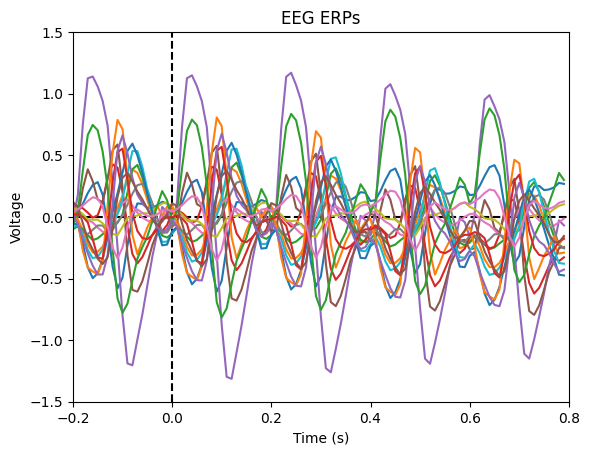

In [4]:
erp_data_train = np.mean(eeg_data_train['preprocessed_eeg_data'], 1)
erp_data_test = np.mean(eeg_data_test['preprocessed_eeg_data'], 1)
erp_data_all = np.mean(np.append(erp_data_train, erp_data_test, 0), 0)

plt.figure()
plt.plot([-.2, .8], [0, 0], 'k--', [0, 0], [-1.5, 1.5], 'k--')
plt.plot(eeg_data_train['times'], np.transpose(erp_data_all));
plt.xlabel('Time (s)');
plt.xlim(left=-.2, right=.8)
plt.ylabel('Voltage');
plt.ylim(bottom=-1.5, top=1.5)
plt.title('EEG ERPs');

In [5]:
img_parent_dir  = os.path.join(gdrive_data_parent_dir, 'image_set')
img_metadata = np.load(os.path.join(img_parent_dir, 'image_metadata.npy'),
	allow_pickle=True).item()

n_train_img = len(img_metadata['train_img_concepts'])
n_train_concepts = len(np.unique(img_metadata['train_img_concepts']))
n_train_img_per_concept = int(n_train_img / n_train_concepts)
print('Training images: ' + str(n_train_img))
print('Image concepts: ' + str(n_train_concepts))
print('Images per concept: '+ str(n_train_img_per_concept))

n_test_img = len(img_metadata['test_img_concepts'])
n_test_concepts = len(np.unique(img_metadata['test_img_concepts']))
n_test_img_per_concept = int(n_test_img / n_test_concepts)
print('\nTest images: ' + str(n_test_img))
print('Image concepts: ' + str(n_test_concepts))
print('Images per concept: '+ str(n_test_img_per_concept))

Training images: 16540
Image concepts: 1654
Images per concept: 10

Test images: 200
Image concepts: 200
Images per concept: 1


Training EEG single image data shape:
(4, 17, 100)
(Training EEG repetitions × EEG channels × EEG time points)



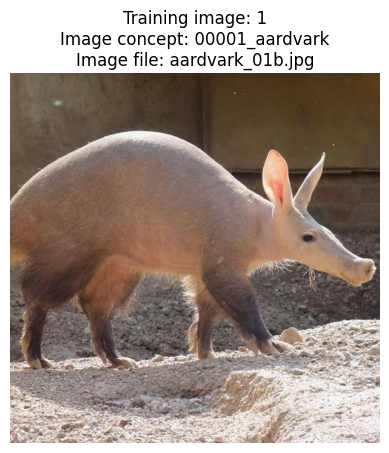

In [6]:
train_img_idx =  0 #@param {type:"integer"}

eeg_data_single_image = eeg_data_train['preprocessed_eeg_data'][train_img_idx]
print('Training EEG single image data shape:')
print(eeg_data_single_image.shape)
print('(Training EEG repetitions × EEG channels × EEG time points)\n')

train_img_dir = os.path.join(img_parent_dir, 'training_images',
	img_metadata['train_img_concepts'][train_img_idx],
	img_metadata['train_img_files'][train_img_idx])
train_img = Image.open(train_img_dir).convert('RGB')

plt.figure()
plt.axis('off')
plt.imshow(train_img)
plt.title('Training image: ' + str(train_img_idx+1) + '\nImage concept: ' +\
	img_metadata['train_img_concepts'][train_img_idx] + '\nImage file: ' +\
	img_metadata['train_img_files'][train_img_idx]);

Test EEG single image data shape:
(80, 17, 100)
(Test EEG repetitions × EEG channels × EEG time points)



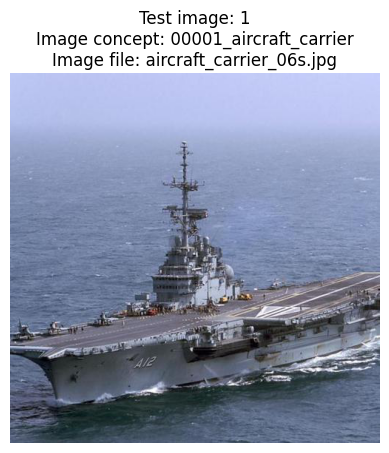

In [7]:
test_img_idx =  0 #@param {type:"integer"}

eeg_data_single_image = eeg_data_test['preprocessed_eeg_data'][train_img_idx]
print('Test EEG single image data shape:')
print(eeg_data_single_image.shape)
print('(Test EEG repetitions × EEG channels × EEG time points)\n')

test_img_dir = os.path.join(img_parent_dir, 'test_images',
	img_metadata['test_img_concepts'][test_img_idx],
	img_metadata['test_img_files'][test_img_idx])
test_img = Image.open(test_img_dir).convert('RGB')

plt.figure()
plt.axis('off')
plt.imshow(test_img)
plt.title('Test image: ' + str(test_img_idx+1) + '\nImage concept: ' +\
	img_metadata['test_img_concepts'][test_img_idx] + '\nImage file: ' +\
	img_metadata['test_img_files'][test_img_idx]);

In [8]:
img_parent_dir  = os.path.join(gdrive_data_parent_dir, 'image_set')
img_metadata = np.load(os.path.join(img_parent_dir, 'image_metadata.npy'),allow_pickle=True).item()

n_train_img = len(img_metadata['train_img_concepts'])
n_train_concepts = len(np.unique(img_metadata['train_img_concepts']))
n_train_img_per_concept = int(n_train_img / n_train_concepts)
print('Training images: ' + str(n_train_img))
print('Image concepts: ' + str(n_train_concepts))
print('Images per concept: '+ str(n_train_img_per_concept))

n_test_img = len(img_metadata['test_img_concepts'])
n_test_concepts = len(np.unique(img_metadata['test_img_concepts']))
n_test_img_per_concept = int(n_test_img / n_test_concepts)
print('\nTest images: ' + str(n_test_img))
print('Image concepts: ' + str(n_test_concepts))
print('Images per concept: '+ str(n_test_img_per_concept))

Training images: 16540
Image concepts: 1654
Images per concept: 10

Test images: 200
Image concepts: 200
Images per concept: 1


In [9]:

training_images = []
for i in range(n_train_img):
    img_path = os.path.join(
        img_parent_dir,
        'training_images',
        img_metadata['train_img_concepts'][i],
        img_metadata['train_img_files'][i]
    )
    try:
        img = Image.open(img_path).convert('RGB')
        training_images.append(img)
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")


eeg_signals = eeg_data_train['preprocessed_eeg_data']  

print("Number of training images:", len(training_images))
print("Number of EEG trials:", eeg_signals.shape[0])


for image, eeg_signal in zip(training_images[:2], eeg_signals[:2]):
    image_array = np.array(image)
    print(f"Image info: {type(image)} with shape {image_array.shape}, EEG signal shape: {eeg_signal.shape}")


Number of training images: 16540
Number of EEG trials: 16540
Image info: <class 'PIL.Image.Image'> with shape (500, 500, 3), EEG signal shape: (4, 17, 100)
Image info: <class 'PIL.Image.Image'> with shape (500, 500, 3), EEG signal shape: (4, 17, 100)


In [10]:
import os
import numpy as np
if not hasattr(np, 'object'):
    np.object = object
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),               # Converts image to [0, 1]
    transforms.Lambda(lambda x: x * 2 - 1) # Normalize to [-1, 1]
])

class EEGImageDataset(Dataset):
    def __init__(self, images, eeg_signals, transform=None):
        self.images = images
        self.eeg_signals = eeg_signals
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        eeg_signal = self.eeg_signals[idx]
        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.ToTensor()(image)
            image = image * 2 - 1  # Normalize to [-1,1]
        
        eeg_signal = torch.tensor(eeg_signal, dtype=torch.float32)
        return eeg_signal, image

/tmp/ipykernel_2609431/4254811706.py:3: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, 'object'):


In [11]:
dataset = EEGImageDataset(training_images, eeg_signals, transform=image_transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [12]:
class Generator(nn.Module):
    def __init__(self, eeg_input_shape=(4, 17, 100), latent_dim=256, output_channels=3):
        super(Generator, self).__init__()
        # Flattened EEG dimension: 4 * 17 * 100 = 6800
        self.eeg_flatten_dim = np.prod(eeg_input_shape)
        
        
        self.fc = nn.Sequential(
            nn.Linear(self.eeg_flatten_dim, latent_dim),
            nn.BatchNorm1d(latent_dim),
            nn.ReLU(True),
            nn.Linear(latent_dim, 8 * 8 * 128),
            nn.BatchNorm1d(8 * 8 * 128),
            nn.ReLU(True),
        )
        
        
        self.deconv = nn.Sequential(
            # Input feature map: (128, 8, 8)
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # -> (64, 16, 16)
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),   # -> (32, 32, 32)
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),   # -> (16, 64, 64)
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, output_channels, kernel_size=3, stride=1, padding=1),  # -> (output_channels, 64, 64)
            nn.Tanh()  # Output values in [-1, 1]
        )
        
    def forward(self, x):
        batch_size = x.size(0)
        # Flatten the EEG input.
        x = x.view(batch_size, -1)  # shape: (batch_size, 6800)
        x = self.fc(x)              # shape: (batch_size, 8*8*128)
        x = x.view(batch_size, 128, 8, 8)
        img = self.deconv(x)        # shape: (batch_size, output_channels, 64, 64)
        return img



In [13]:
class Discriminator(nn.Module):
    def __init__(self, input_channels=3):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(input_channels, 16, kernel_size=4, stride=2, padding=1),  # -> (16, 32, 32)
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(16, 32, kernel_size=4, stride=2, padding=1),              # -> (32, 16, 16)
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),              # -> (64, 8, 8)
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),             # -> (128, 4, 4)
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
        )
        self.fc = nn.Sequential(
            nn.Linear(128 * 4 * 4, 1),
            nn.Sigmoid() 
        )
        
    def forward(self, x):
        batch_size = x.size(0)
        x = self.conv(x)
        x = x.view(batch_size, -1)
        validity = self.fc(x)
        return validity


Epoch [1/100] Batch [0/517] D Loss: 1448.7303 G Loss: 6192.9409 (Adv: 0.8642, Rec: 0.6192)
Epoch [1/100] Batch [100/517] D Loss: 7.2271 G Loss: 4253.0317 (Adv: 6.0892, Rec: 0.4247)
Epoch [1/100] Batch [200/517] D Loss: 1.3705 G Loss: 4275.6509 (Adv: 8.2991, Rec: 0.4267)
Epoch [1/100] Batch [300/517] D Loss: 0.7638 G Loss: 4355.4453 (Adv: 10.2015, Rec: 0.4345)
Epoch [1/100] Batch [400/517] D Loss: 0.1720 G Loss: 4652.2676 (Adv: 10.8433, Rec: 0.4641)
Epoch [1/100] Batch [500/517] D Loss: 0.4402 G Loss: 4001.2671 (Adv: 10.1081, Rec: 0.3991)


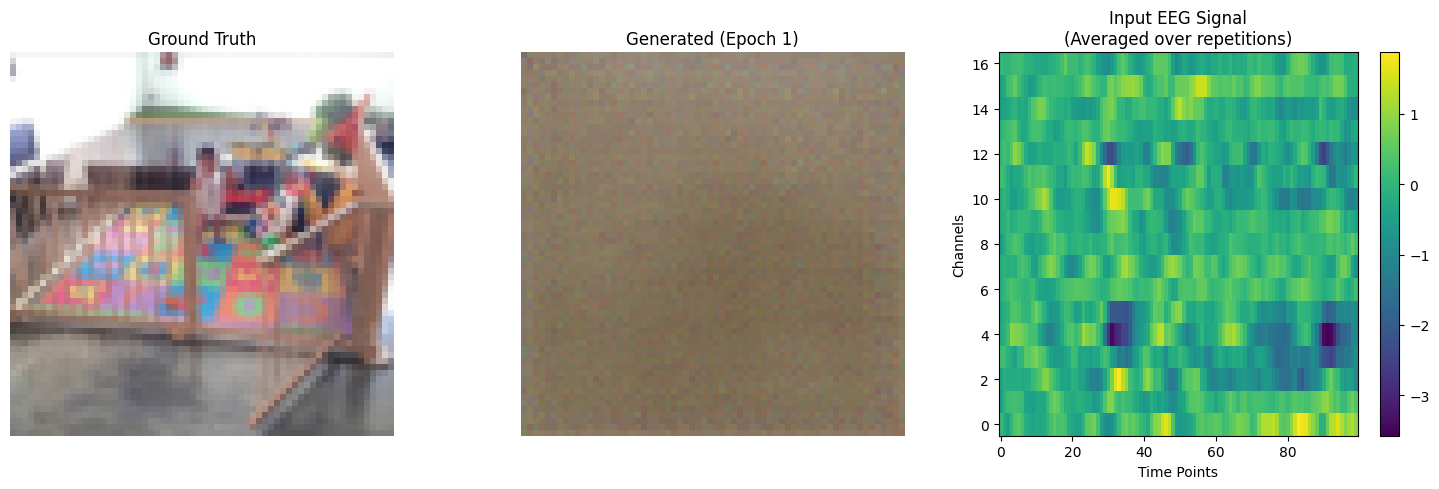

Epoch [2/100] Batch [0/517] D Loss: 0.2892 G Loss: 4245.3486 (Adv: 10.8287, Rec: 0.4235)
Epoch [2/100] Batch [100/517] D Loss: 0.3149 G Loss: 3863.1899 (Adv: 11.0613, Rec: 0.3852)
Epoch [2/100] Batch [200/517] D Loss: 0.1378 G Loss: 4042.2932 (Adv: 11.3963, Rec: 0.4031)
Epoch [2/100] Batch [300/517] D Loss: 0.0401 G Loss: 4228.1323 (Adv: 11.6260, Rec: 0.4217)
Epoch [2/100] Batch [400/517] D Loss: 0.0534 G Loss: 3966.7498 (Adv: 11.2647, Rec: 0.3955)
Epoch [2/100] Batch [500/517] D Loss: 0.1565 G Loss: 4004.2678 (Adv: 12.3070, Rec: 0.3992)


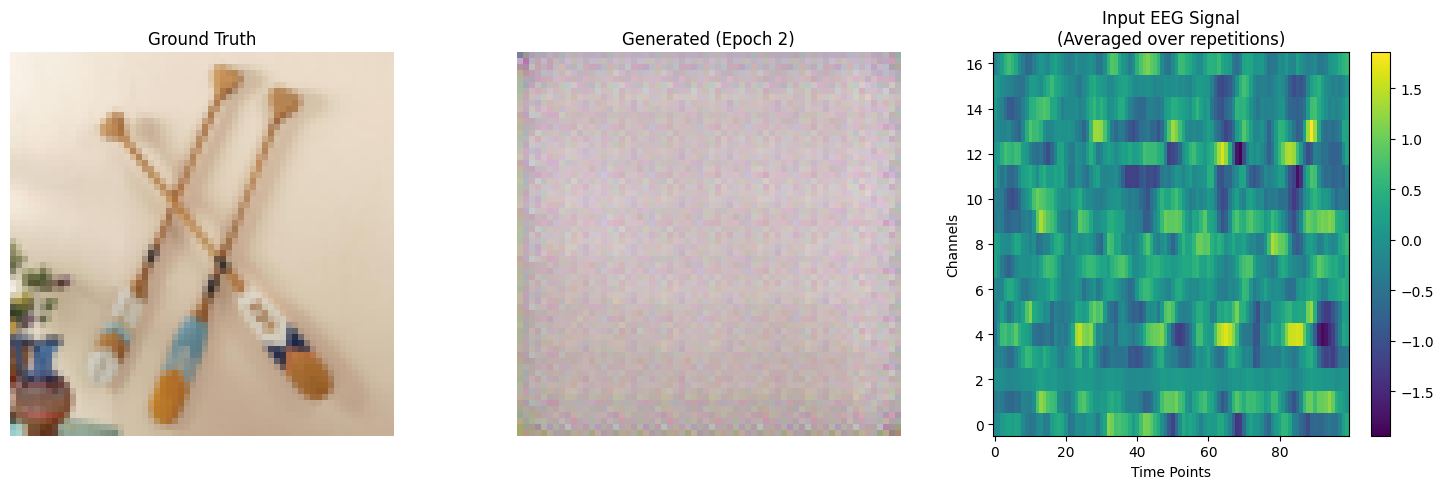

Epoch [3/100] Batch [0/517] D Loss: 0.1062 G Loss: 3574.9292 (Adv: 11.7635, Rec: 0.3563)
Epoch [3/100] Batch [100/517] D Loss: 0.3026 G Loss: 3750.7742 (Adv: 9.1360, Rec: 0.3742)
Epoch [3/100] Batch [200/517] D Loss: 2.7263 G Loss: 3685.1746 (Adv: 8.3109, Rec: 0.3677)
Epoch [3/100] Batch [300/517] D Loss: 0.6219 G Loss: 3835.9814 (Adv: 9.5117, Rec: 0.3826)
Epoch [3/100] Batch [400/517] D Loss: 0.1816 G Loss: 4062.3901 (Adv: 9.9253, Rec: 0.4052)
Epoch [3/100] Batch [500/517] D Loss: 0.3801 G Loss: 3977.7666 (Adv: 10.6202, Rec: 0.3967)


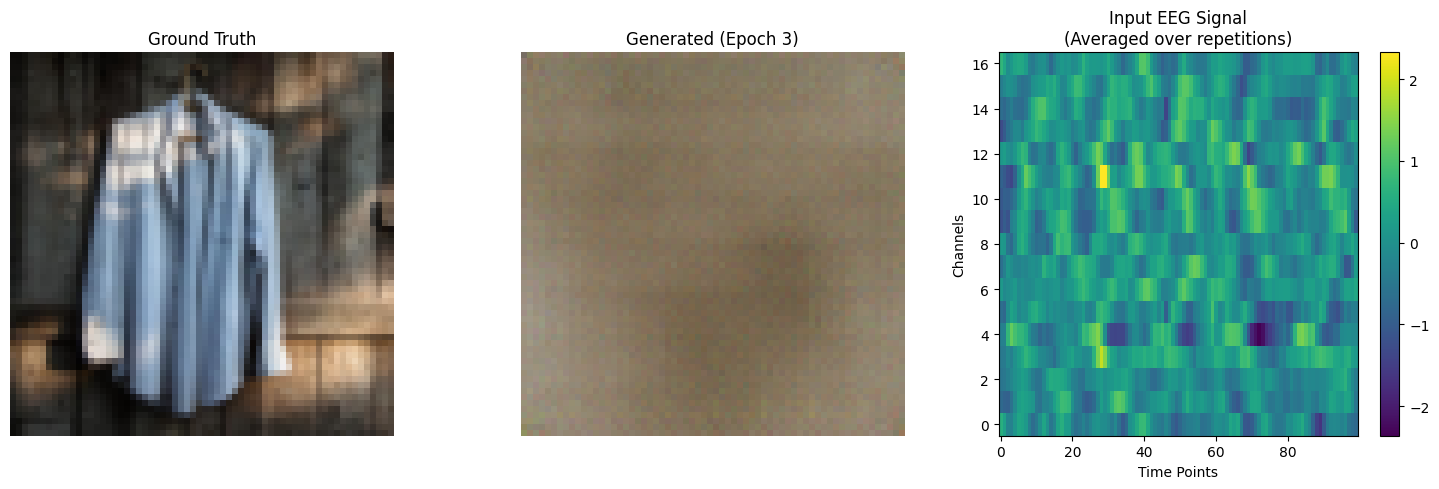

Epoch [4/100] Batch [0/517] D Loss: 0.5329 G Loss: 3821.1951 (Adv: 9.2958, Rec: 0.3812)
Epoch [4/100] Batch [100/517] D Loss: 0.5305 G Loss: 3519.5466 (Adv: 9.2733, Rec: 0.3510)
Epoch [4/100] Batch [200/517] D Loss: 0.3913 G Loss: 3749.2771 (Adv: 8.9427, Rec: 0.3740)
Epoch [4/100] Batch [300/517] D Loss: 0.1485 G Loss: 3888.5286 (Adv: 10.3530, Rec: 0.3878)
Epoch [4/100] Batch [400/517] D Loss: 0.0739 G Loss: 3722.9526 (Adv: 10.4797, Rec: 0.3712)
Epoch [4/100] Batch [500/517] D Loss: 0.0956 G Loss: 3788.4995 (Adv: 11.4195, Rec: 0.3777)


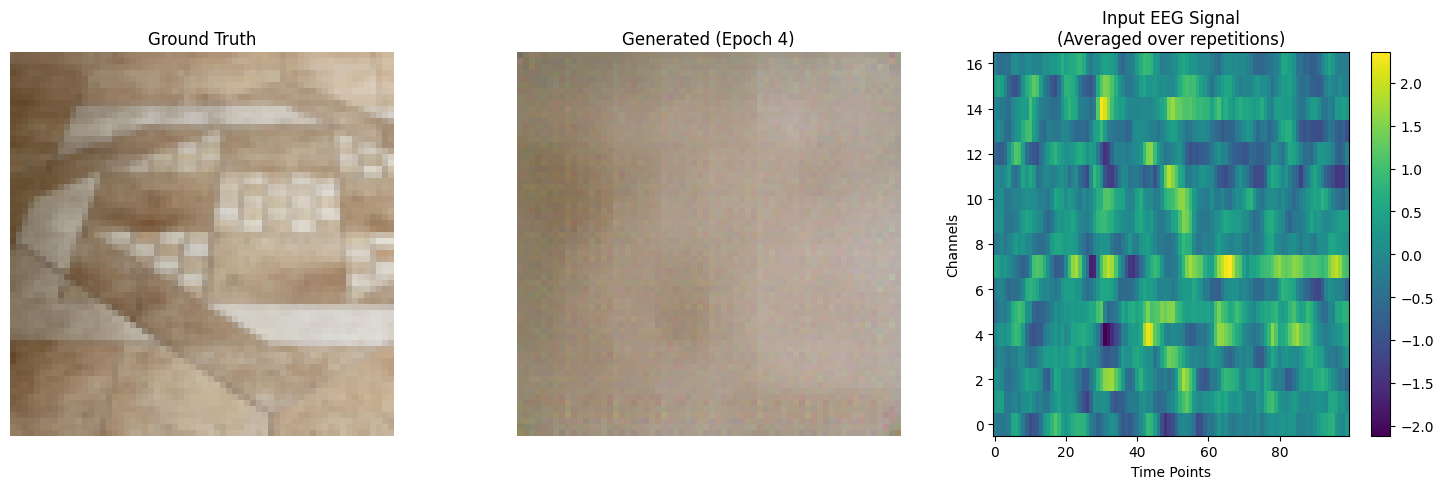

Epoch [5/100] Batch [0/517] D Loss: 0.1147 G Loss: 3430.1924 (Adv: 11.0727, Rec: 0.3419)
Epoch [5/100] Batch [100/517] D Loss: 0.0702 G Loss: 3609.0718 (Adv: 11.3247, Rec: 0.3598)
Epoch [5/100] Batch [200/517] D Loss: 0.6448 G Loss: 3497.1858 (Adv: 10.3241, Rec: 0.3487)
Epoch [5/100] Batch [300/517] D Loss: 0.1711 G Loss: 3679.8198 (Adv: 11.0871, Rec: 0.3669)
Epoch [5/100] Batch [400/517] D Loss: 0.0492 G Loss: 4075.2271 (Adv: 11.4509, Rec: 0.4064)
Epoch [5/100] Batch [500/517] D Loss: 0.0342 G Loss: 3542.3005 (Adv: 13.1803, Rec: 0.3529)


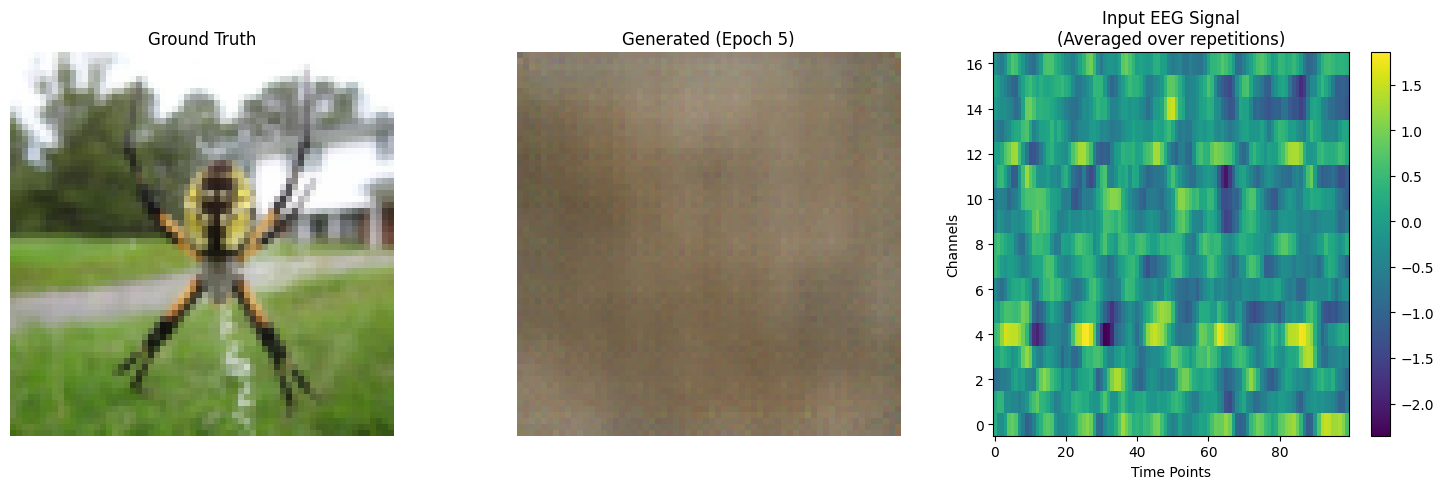

Epoch [6/100] Batch [0/517] D Loss: 0.2122 G Loss: 3131.9338 (Adv: 9.3688, Rec: 0.3123)
Epoch [6/100] Batch [100/517] D Loss: 1.4461 G Loss: 3237.2458 (Adv: 7.3806, Rec: 0.3230)
Epoch [6/100] Batch [200/517] D Loss: 0.3400 G Loss: 3376.6814 (Adv: 9.7324, Rec: 0.3367)
Epoch [6/100] Batch [300/517] D Loss: 0.0591 G Loss: 3231.3992 (Adv: 10.9537, Rec: 0.3220)
Epoch [6/100] Batch [400/517] D Loss: 0.0834 G Loss: 3298.9758 (Adv: 10.8002, Rec: 0.3288)
Epoch [6/100] Batch [500/517] D Loss: 0.0671 G Loss: 3195.5850 (Adv: 11.4726, Rec: 0.3184)


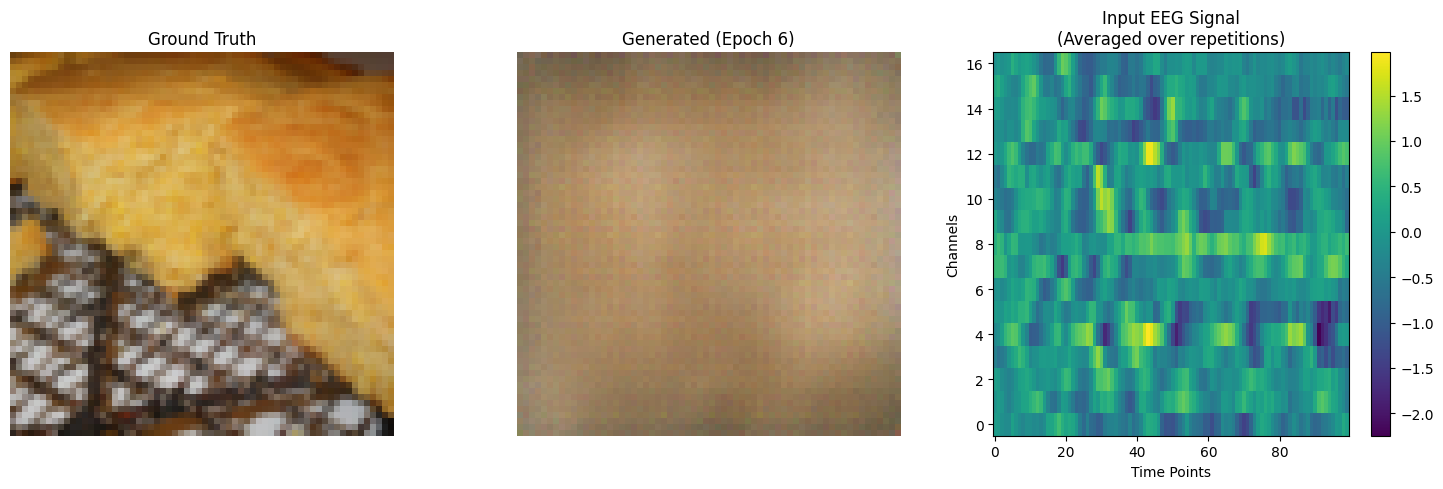

Epoch [7/100] Batch [0/517] D Loss: 0.0505 G Loss: 3315.2354 (Adv: 10.8852, Rec: 0.3304)
Epoch [7/100] Batch [100/517] D Loss: 0.1456 G Loss: 3357.8970 (Adv: 10.9261, Rec: 0.3347)
Epoch [7/100] Batch [200/517] D Loss: 1.0623 G Loss: 3034.6284 (Adv: 12.0431, Rec: 0.3023)
Epoch [7/100] Batch [300/517] D Loss: 0.0306 G Loss: 3422.9285 (Adv: 11.8788, Rec: 0.3411)
Epoch [7/100] Batch [400/517] D Loss: 0.1388 G Loss: 3391.6680 (Adv: 9.8440, Rec: 0.3382)
Epoch [7/100] Batch [500/517] D Loss: 0.0460 G Loss: 3273.2332 (Adv: 12.7716, Rec: 0.3260)


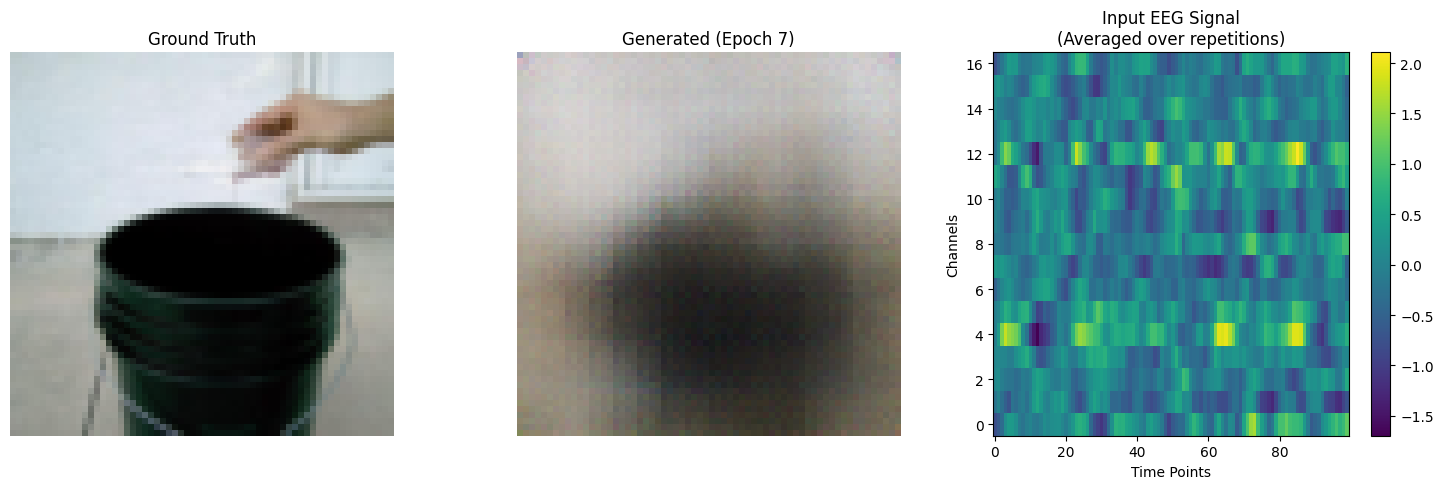

Epoch [8/100] Batch [0/517] D Loss: 0.0559 G Loss: 3104.1892 (Adv: 12.6291, Rec: 0.3092)
Epoch [8/100] Batch [100/517] D Loss: 1.5972 G Loss: 3107.9717 (Adv: 8.2422, Rec: 0.3100)
Epoch [8/100] Batch [200/517] D Loss: 0.2457 G Loss: 3115.5559 (Adv: 9.4637, Rec: 0.3106)
Epoch [8/100] Batch [300/517] D Loss: 0.3594 G Loss: 3268.7744 (Adv: 9.7241, Rec: 0.3259)
Epoch [8/100] Batch [400/517] D Loss: 0.3823 G Loss: 3051.0437 (Adv: 9.8269, Rec: 0.3041)
Epoch [8/100] Batch [500/517] D Loss: 0.0682 G Loss: 3305.7329 (Adv: 11.1066, Rec: 0.3295)


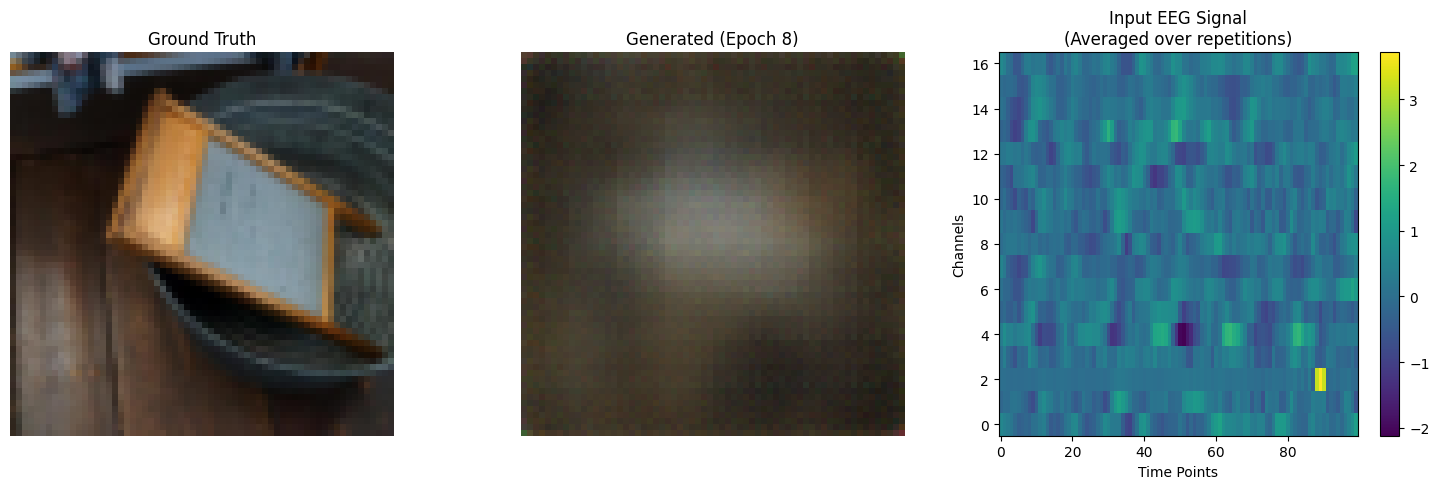

Epoch [9/100] Batch [0/517] D Loss: 0.1766 G Loss: 2845.8875 (Adv: 9.8834, Rec: 0.2836)
Epoch [9/100] Batch [100/517] D Loss: 1.0898 G Loss: 2698.9768 (Adv: 9.7845, Rec: 0.2689)
Epoch [9/100] Batch [200/517] D Loss: 0.7391 G Loss: 3086.7349 (Adv: 9.0955, Rec: 0.3078)
Epoch [9/100] Batch [300/517] D Loss: 0.2968 G Loss: 3275.8762 (Adv: 9.6822, Rec: 0.3266)
Epoch [9/100] Batch [400/517] D Loss: 0.0268 G Loss: 2873.7798 (Adv: 12.1570, Rec: 0.2862)
Epoch [9/100] Batch [500/517] D Loss: 76.6736 G Loss: 3046.4792 (Adv: 9.5145, Rec: 0.3037)


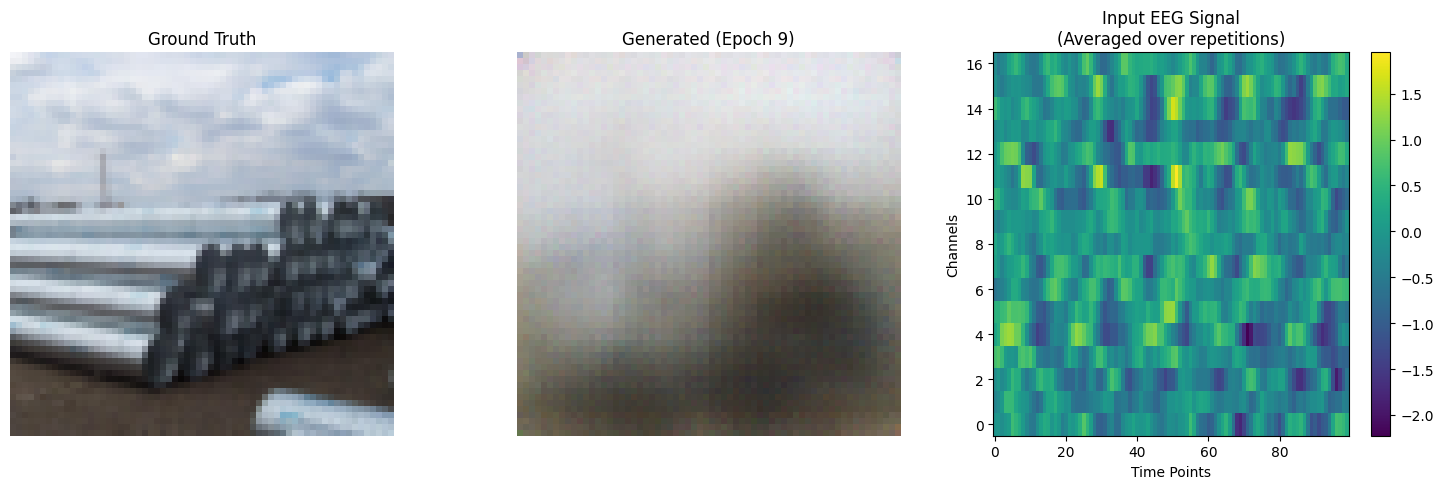

Epoch [10/100] Batch [0/517] D Loss: 0.4483 G Loss: 2611.5754 (Adv: 10.4603, Rec: 0.2601)
Epoch [10/100] Batch [100/517] D Loss: 0.0401 G Loss: 2823.5603 (Adv: 13.7662, Rec: 0.2810)
Epoch [10/100] Batch [200/517] D Loss: 1.5525 G Loss: 3063.7881 (Adv: 9.4346, Rec: 0.3054)
Epoch [10/100] Batch [300/517] D Loss: 0.8235 G Loss: 2900.6165 (Adv: 11.5539, Rec: 0.2889)
Epoch [10/100] Batch [400/517] D Loss: 0.0262 G Loss: 2917.4727 (Adv: 12.8489, Rec: 0.2905)
Epoch [10/100] Batch [500/517] D Loss: 0.0387 G Loss: 3198.8433 (Adv: 10.8488, Rec: 0.3188)


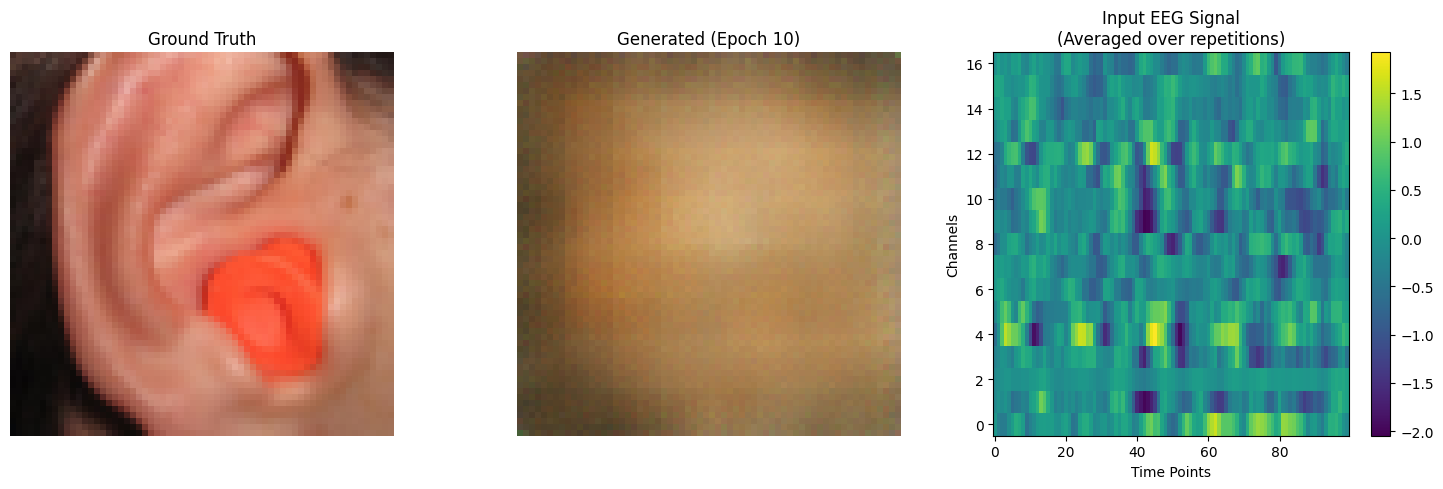

Epoch [11/100] Batch [0/517] D Loss: 0.0110 G Loss: 2950.3792 (Adv: 13.3051, Rec: 0.2937)
Epoch [11/100] Batch [100/517] D Loss: 0.1296 G Loss: 3069.1741 (Adv: 9.8811, Rec: 0.3059)
Epoch [11/100] Batch [200/517] D Loss: 0.0443 G Loss: 2697.5588 (Adv: 10.5973, Rec: 0.2687)
Epoch [11/100] Batch [300/517] D Loss: 0.0297 G Loss: 2823.7329 (Adv: 11.4822, Rec: 0.2812)
Epoch [11/100] Batch [400/517] D Loss: 0.0332 G Loss: 3094.6711 (Adv: 11.9490, Rec: 0.3083)
Epoch [11/100] Batch [500/517] D Loss: 0.2145 G Loss: 2760.2698 (Adv: 12.3483, Rec: 0.2748)


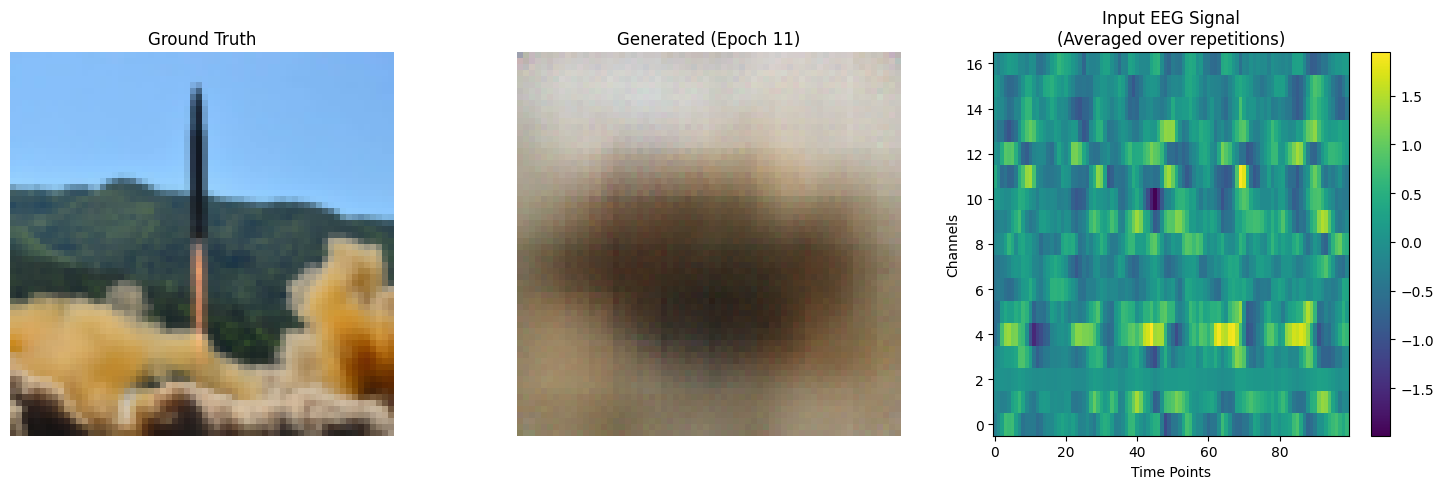

Epoch [12/100] Batch [0/517] D Loss: 0.1023 G Loss: 2875.0527 (Adv: 10.6832, Rec: 0.2864)
Epoch [12/100] Batch [100/517] D Loss: 17.7982 G Loss: 2668.9309 (Adv: 6.0331, Rec: 0.2663)
Epoch [12/100] Batch [200/517] D Loss: 0.2403 G Loss: 2914.0054 (Adv: 10.0102, Rec: 0.2904)
Epoch [12/100] Batch [300/517] D Loss: 0.3397 G Loss: 2729.4919 (Adv: 9.8178, Rec: 0.2720)
Epoch [12/100] Batch [400/517] D Loss: 0.2850 G Loss: 2760.6228 (Adv: 9.4577, Rec: 0.2751)
Epoch [12/100] Batch [500/517] D Loss: 0.2525 G Loss: 2973.8743 (Adv: 12.0475, Rec: 0.2962)


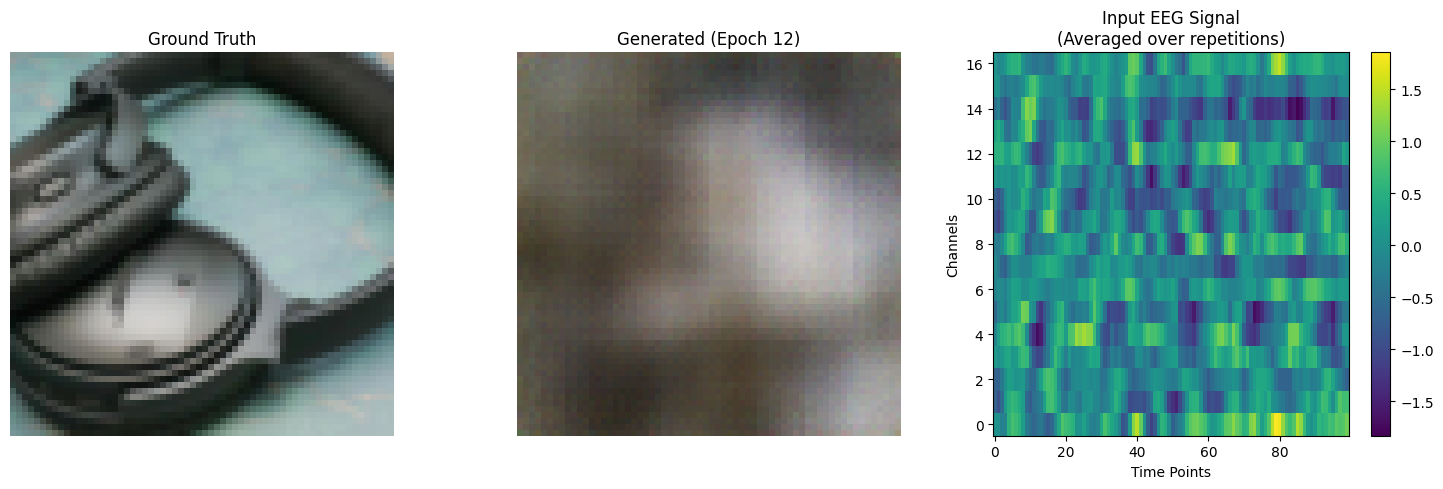

Epoch [13/100] Batch [0/517] D Loss: 0.3097 G Loss: 2612.0681 (Adv: 10.3802, Rec: 0.2602)
Epoch [13/100] Batch [100/517] D Loss: 0.0780 G Loss: 2876.8833 (Adv: 10.8088, Rec: 0.2866)
Epoch [13/100] Batch [200/517] D Loss: 0.0518 G Loss: 2757.9780 (Adv: 11.7728, Rec: 0.2746)
Epoch [13/100] Batch [300/517] D Loss: 0.4110 G Loss: 2831.4751 (Adv: 9.0892, Rec: 0.2822)
Epoch [13/100] Batch [400/517] D Loss: 0.0338 G Loss: 3012.1904 (Adv: 12.9244, Rec: 0.2999)
Epoch [13/100] Batch [500/517] D Loss: 0.3093 G Loss: 2518.4863 (Adv: 11.9537, Rec: 0.2507)


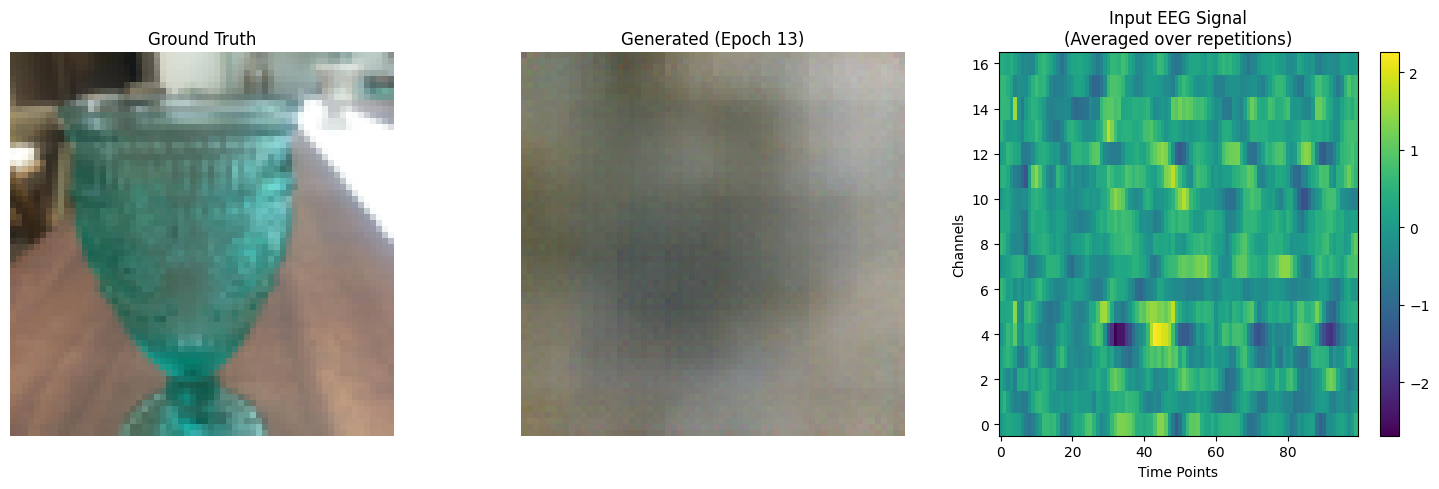

Epoch [14/100] Batch [0/517] D Loss: 0.0394 G Loss: 2783.0210 (Adv: 12.2102, Rec: 0.2771)
Epoch [14/100] Batch [100/517] D Loss: 0.1706 G Loss: 2648.5195 (Adv: 12.5814, Rec: 0.2636)
Epoch [14/100] Batch [200/517] D Loss: 0.0473 G Loss: 2623.3267 (Adv: 13.7525, Rec: 0.2610)
Epoch [14/100] Batch [300/517] D Loss: 0.0221 G Loss: 2749.7114 (Adv: 13.6481, Rec: 0.2736)
Epoch [14/100] Batch [400/517] D Loss: 0.0242 G Loss: 2855.7070 (Adv: 12.8037, Rec: 0.2843)
Epoch [14/100] Batch [500/517] D Loss: 0.0351 G Loss: 2943.4734 (Adv: 14.8748, Rec: 0.2929)


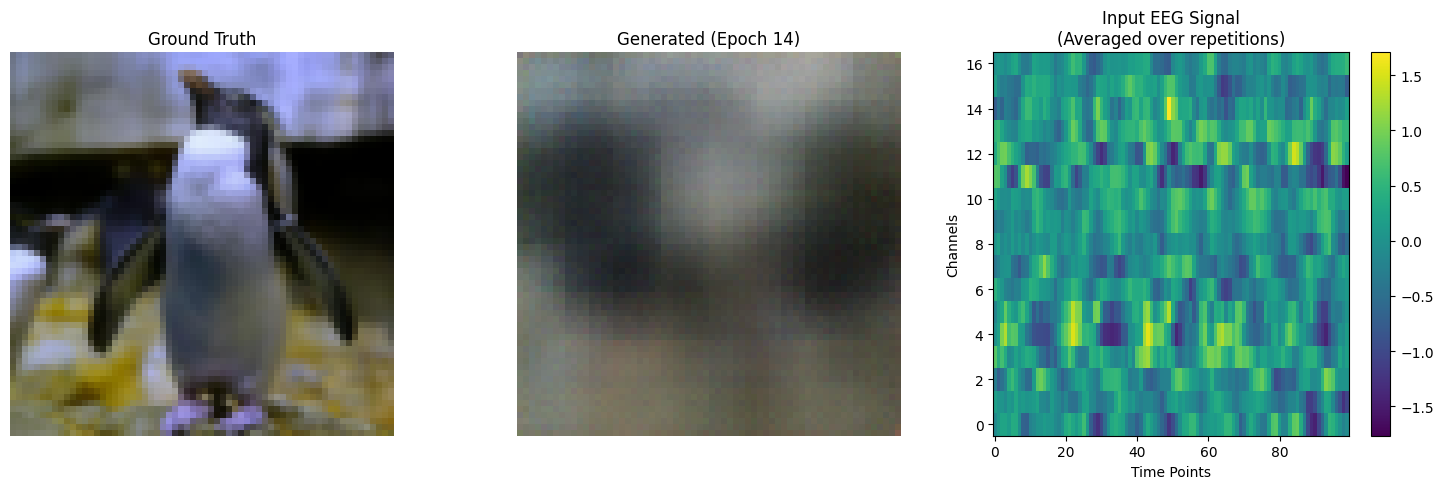

Epoch [15/100] Batch [0/517] D Loss: 0.0186 G Loss: 2697.0781 (Adv: 13.6322, Rec: 0.2683)
Epoch [15/100] Batch [100/517] D Loss: 0.0433 G Loss: 2780.5576 (Adv: 14.7918, Rec: 0.2766)
Epoch [15/100] Batch [200/517] D Loss: 0.0767 G Loss: 2592.2571 (Adv: 12.0690, Rec: 0.2580)
Epoch [15/100] Batch [300/517] D Loss: 0.0259 G Loss: 2584.7231 (Adv: 15.3636, Rec: 0.2569)
Epoch [15/100] Batch [400/517] D Loss: 0.0147 G Loss: 2910.5247 (Adv: 13.2155, Rec: 0.2897)
Epoch [15/100] Batch [500/517] D Loss: 0.0505 G Loss: 2667.9856 (Adv: 12.6930, Rec: 0.2655)


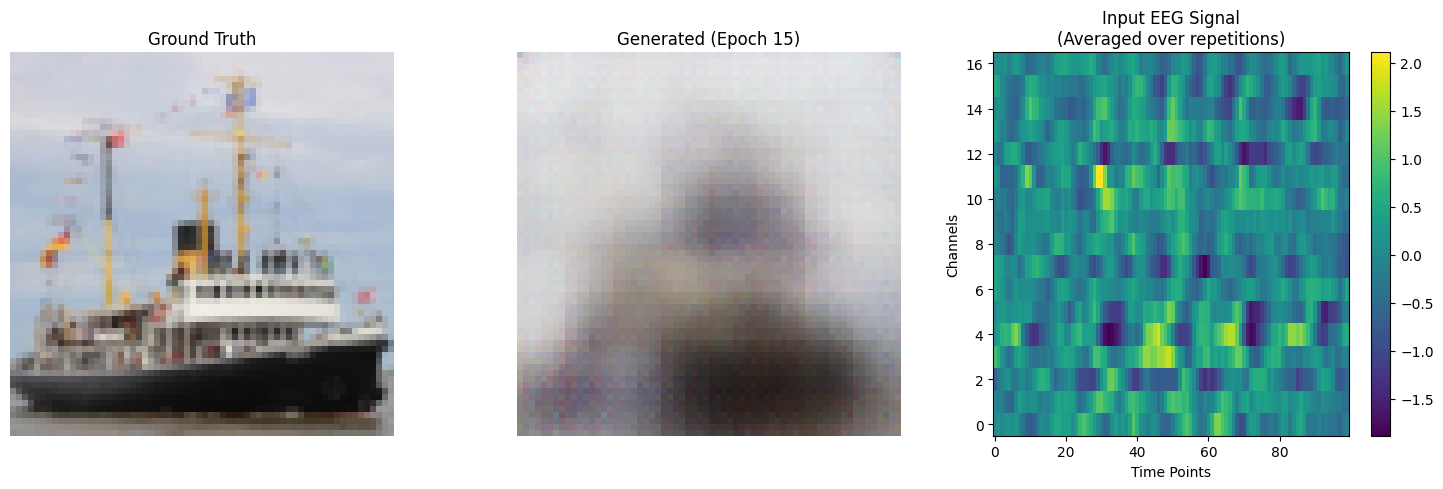

Epoch [16/100] Batch [0/517] D Loss: 0.0056 G Loss: 2723.7910 (Adv: 14.4506, Rec: 0.2709)
Epoch [16/100] Batch [100/517] D Loss: 0.0881 G Loss: 2727.0752 (Adv: 15.0383, Rec: 0.2712)
Epoch [16/100] Batch [200/517] D Loss: 0.2195 G Loss: 2842.7825 (Adv: 9.9251, Rec: 0.2833)
Epoch [16/100] Batch [300/517] D Loss: 0.0226 G Loss: 2590.8486 (Adv: 13.9493, Rec: 0.2577)
Epoch [16/100] Batch [400/517] D Loss: 0.0103 G Loss: 2622.9304 (Adv: 16.1051, Rec: 0.2607)
Epoch [16/100] Batch [500/517] D Loss: 0.0058 G Loss: 2726.9226 (Adv: 15.8279, Rec: 0.2711)


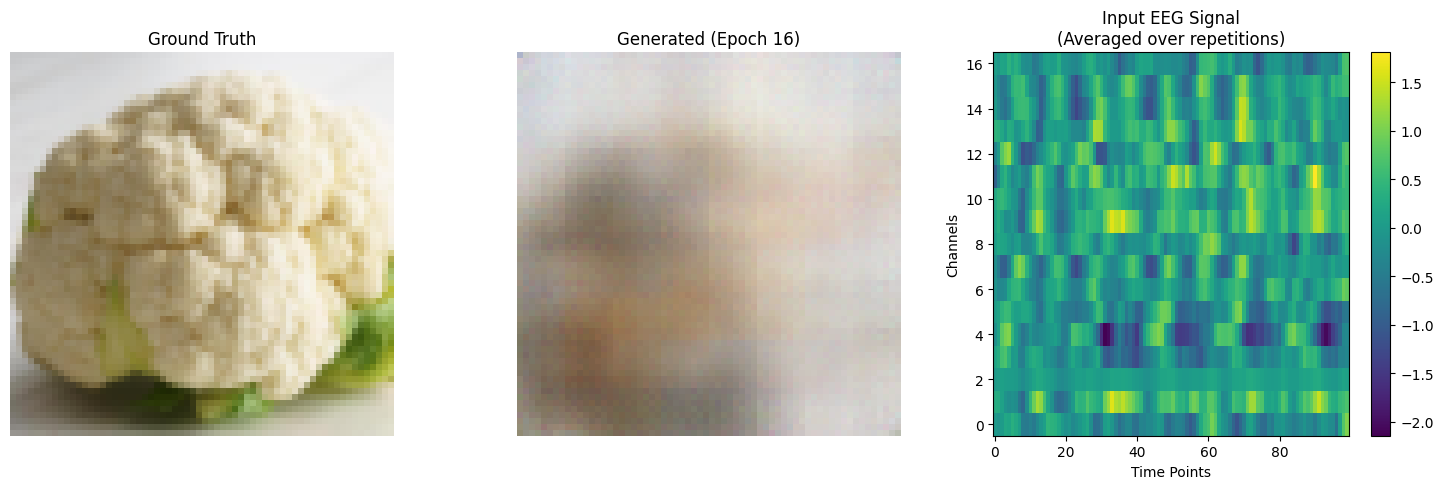

Epoch [17/100] Batch [0/517] D Loss: 0.0735 G Loss: 2716.4771 (Adv: 14.6312, Rec: 0.2702)
Epoch [17/100] Batch [100/517] D Loss: 0.0040 G Loss: 2793.4077 (Adv: 14.8309, Rec: 0.2779)
Epoch [17/100] Batch [200/517] D Loss: 0.0960 G Loss: 2463.1406 (Adv: 14.4104, Rec: 0.2449)
Epoch [17/100] Batch [300/517] D Loss: 0.0098 G Loss: 2858.7734 (Adv: 13.1308, Rec: 0.2846)
Epoch [17/100] Batch [400/517] D Loss: 0.0120 G Loss: 2649.9895 (Adv: 14.3006, Rec: 0.2636)
Epoch [17/100] Batch [500/517] D Loss: 8.9254 G Loss: 2505.4463 (Adv: 14.0539, Rec: 0.2491)


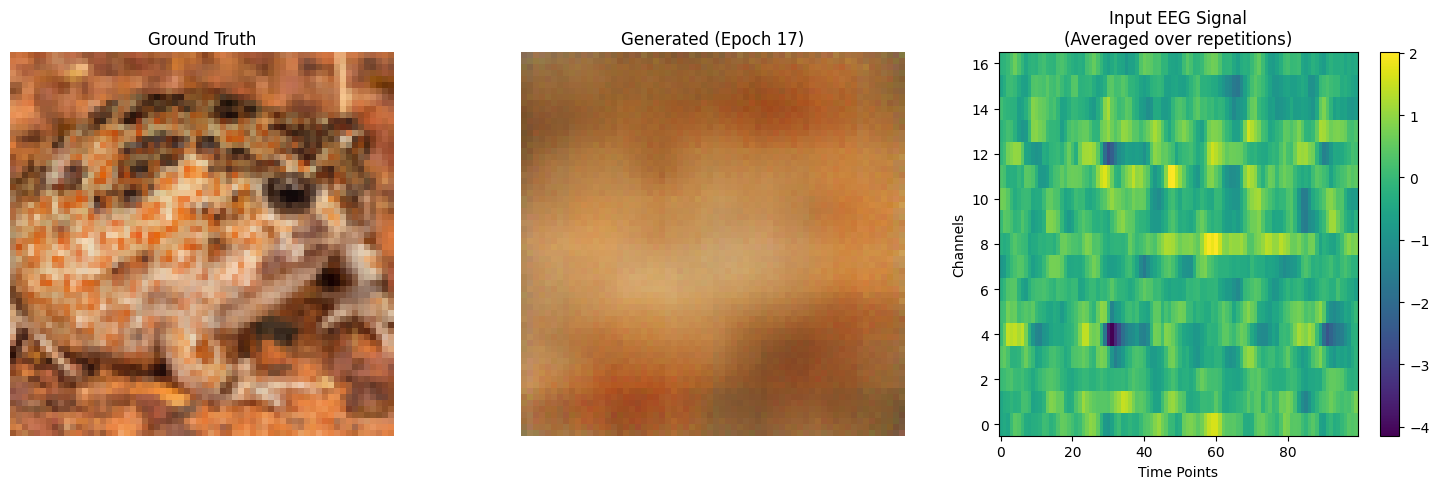

Epoch [18/100] Batch [0/517] D Loss: 0.1463 G Loss: 2481.3806 (Adv: 15.0487, Rec: 0.2466)
Epoch [18/100] Batch [100/517] D Loss: 1.1250 G Loss: 2694.9917 (Adv: 9.2219, Rec: 0.2686)
Epoch [18/100] Batch [200/517] D Loss: 0.0578 G Loss: 2672.9885 (Adv: 14.2342, Rec: 0.2659)
Epoch [18/100] Batch [300/517] D Loss: 0.0415 G Loss: 2682.6377 (Adv: 16.6909, Rec: 0.2666)
Epoch [18/100] Batch [400/517] D Loss: 0.0216 G Loss: 2624.3611 (Adv: 14.9331, Rec: 0.2609)
Epoch [18/100] Batch [500/517] D Loss: 0.0661 G Loss: 2498.6914 (Adv: 15.1268, Rec: 0.2484)


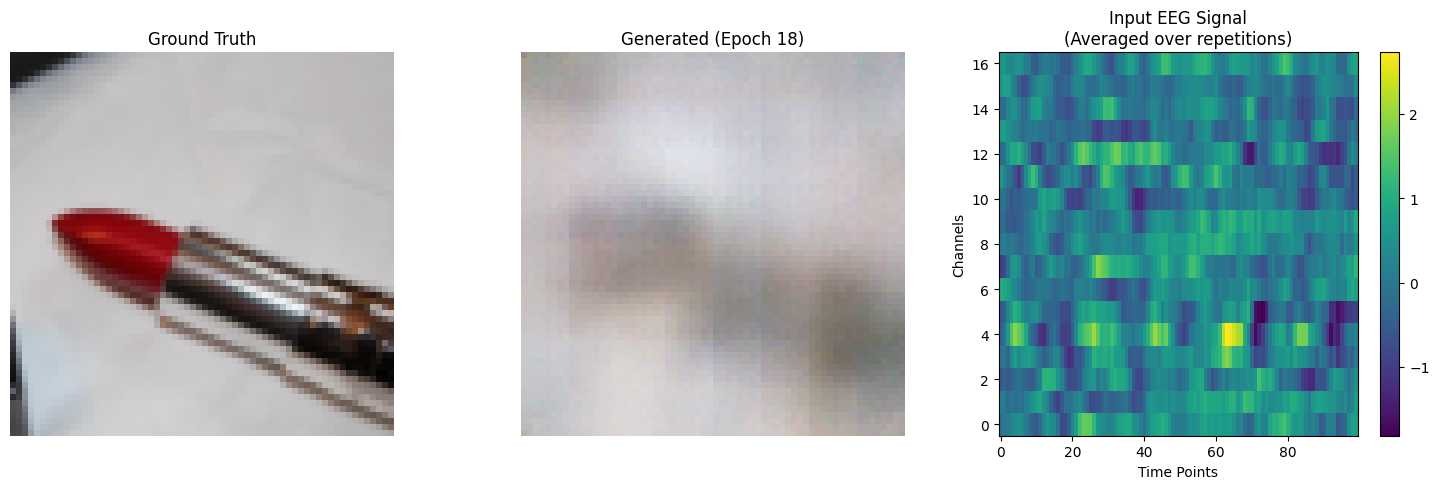

Epoch [19/100] Batch [0/517] D Loss: 0.1139 G Loss: 2544.5422 (Adv: 12.4204, Rec: 0.2532)
Epoch [19/100] Batch [100/517] D Loss: 0.0394 G Loss: 2579.0764 (Adv: 15.8596, Rec: 0.2563)
Epoch [19/100] Batch [200/517] D Loss: 0.1252 G Loss: 2439.3184 (Adv: 15.3290, Rec: 0.2424)
Epoch [19/100] Batch [300/517] D Loss: 0.1759 G Loss: 2582.0349 (Adv: 16.9222, Rec: 0.2565)
Epoch [19/100] Batch [400/517] D Loss: 0.2978 G Loss: 2551.9331 (Adv: 13.9453, Rec: 0.2538)
Epoch [19/100] Batch [500/517] D Loss: 0.0036 G Loss: 2770.6423 (Adv: 16.2446, Rec: 0.2754)


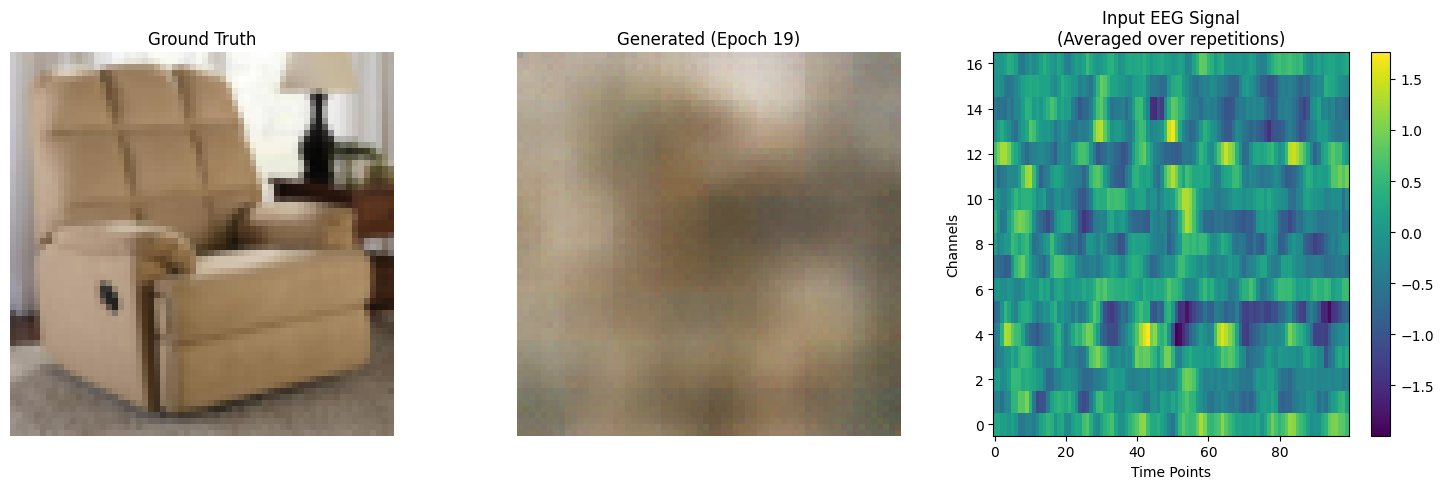

Epoch [20/100] Batch [0/517] D Loss: 0.6137 G Loss: 2582.8455 (Adv: 15.2514, Rec: 0.2568)
Epoch [20/100] Batch [100/517] D Loss: 0.0076 G Loss: 2688.0452 (Adv: 13.5828, Rec: 0.2674)
Epoch [20/100] Batch [200/517] D Loss: 0.0877 G Loss: 2561.8838 (Adv: 10.5248, Rec: 0.2551)
Epoch [20/100] Batch [300/517] D Loss: 0.0087 G Loss: 2478.0659 (Adv: 15.4125, Rec: 0.2463)
Epoch [20/100] Batch [400/517] D Loss: 0.0024 G Loss: 2715.9485 (Adv: 13.9880, Rec: 0.2702)
Epoch [20/100] Batch [500/517] D Loss: 0.0179 G Loss: 2597.8252 (Adv: 15.8642, Rec: 0.2582)


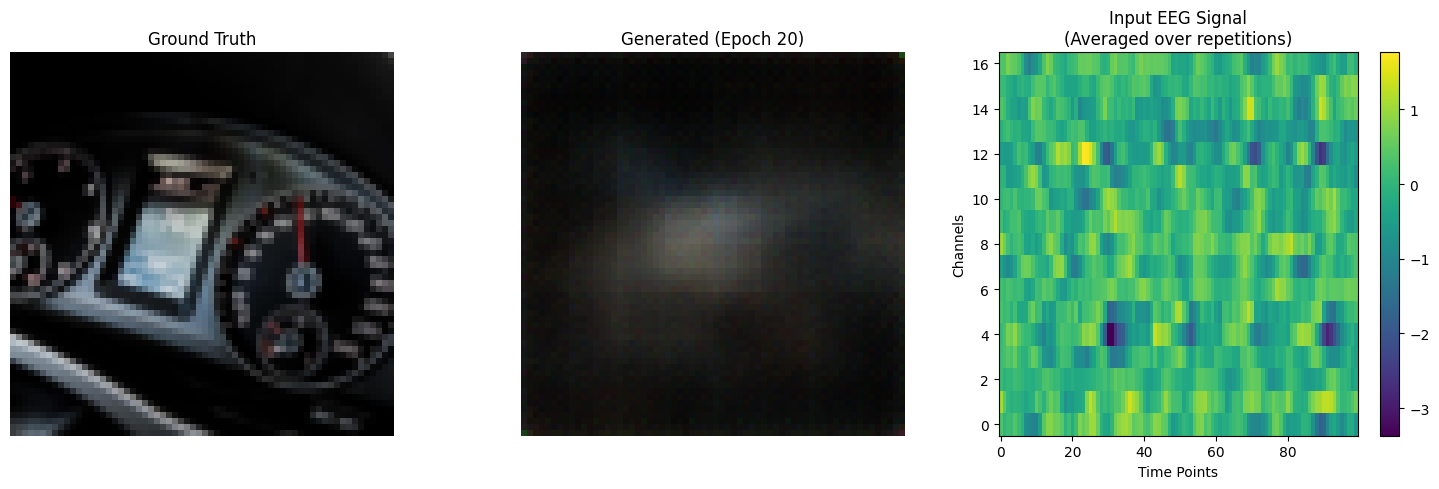

Epoch [21/100] Batch [0/517] D Loss: 0.0168 G Loss: 2487.5950 (Adv: 16.0196, Rec: 0.2472)
Epoch [21/100] Batch [100/517] D Loss: 0.0172 G Loss: 2343.0232 (Adv: 13.5130, Rec: 0.2330)
Epoch [21/100] Batch [200/517] D Loss: 0.0080 G Loss: 2524.4050 (Adv: 13.5081, Rec: 0.2511)
Epoch [21/100] Batch [300/517] D Loss: 0.0048 G Loss: 2546.7063 (Adv: 17.1151, Rec: 0.2530)
Epoch [21/100] Batch [400/517] D Loss: 0.0073 G Loss: 2406.6318 (Adv: 17.3939, Rec: 0.2389)
Epoch [21/100] Batch [500/517] D Loss: 0.0328 G Loss: 2411.7693 (Adv: 13.1482, Rec: 0.2399)


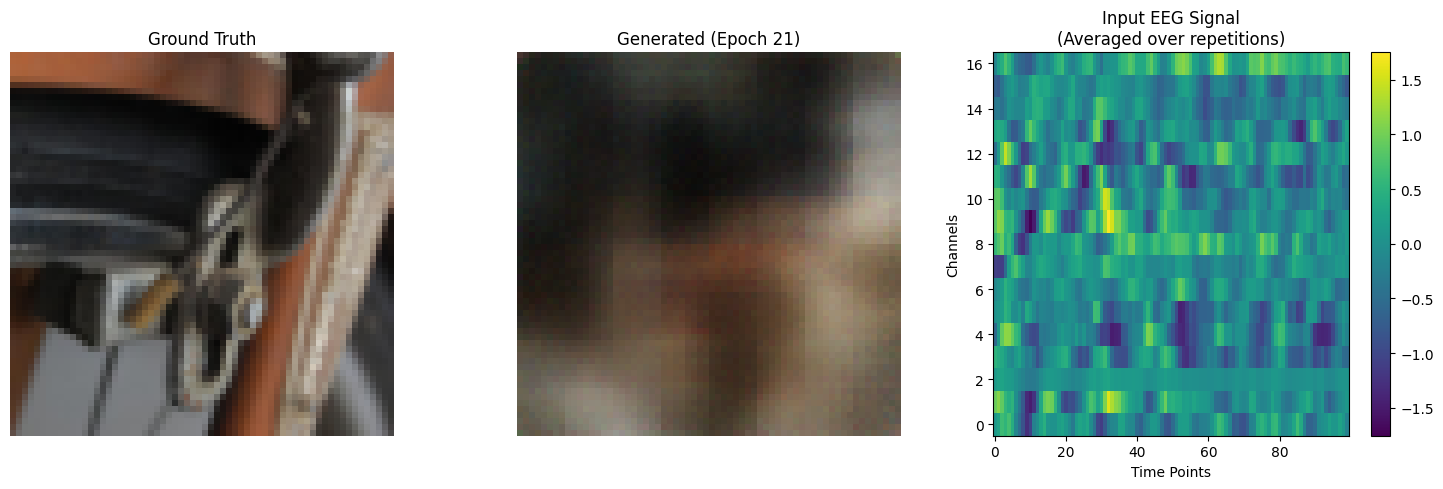

Epoch [22/100] Batch [0/517] D Loss: 0.0060 G Loss: 2642.2659 (Adv: 15.1009, Rec: 0.2627)
Epoch [22/100] Batch [100/517] D Loss: 0.0009 G Loss: 2596.2864 (Adv: 16.8066, Rec: 0.2579)
Epoch [22/100] Batch [200/517] D Loss: 0.0221 G Loss: 2369.8110 (Adv: 13.4280, Rec: 0.2356)
Epoch [22/100] Batch [300/517] D Loss: 0.0190 G Loss: 2470.2485 (Adv: 17.2982, Rec: 0.2453)
Epoch [22/100] Batch [400/517] D Loss: 0.0043 G Loss: 2609.0259 (Adv: 15.0472, Rec: 0.2594)
Epoch [22/100] Batch [500/517] D Loss: 0.0056 G Loss: 2769.9329 (Adv: 17.9734, Rec: 0.2752)


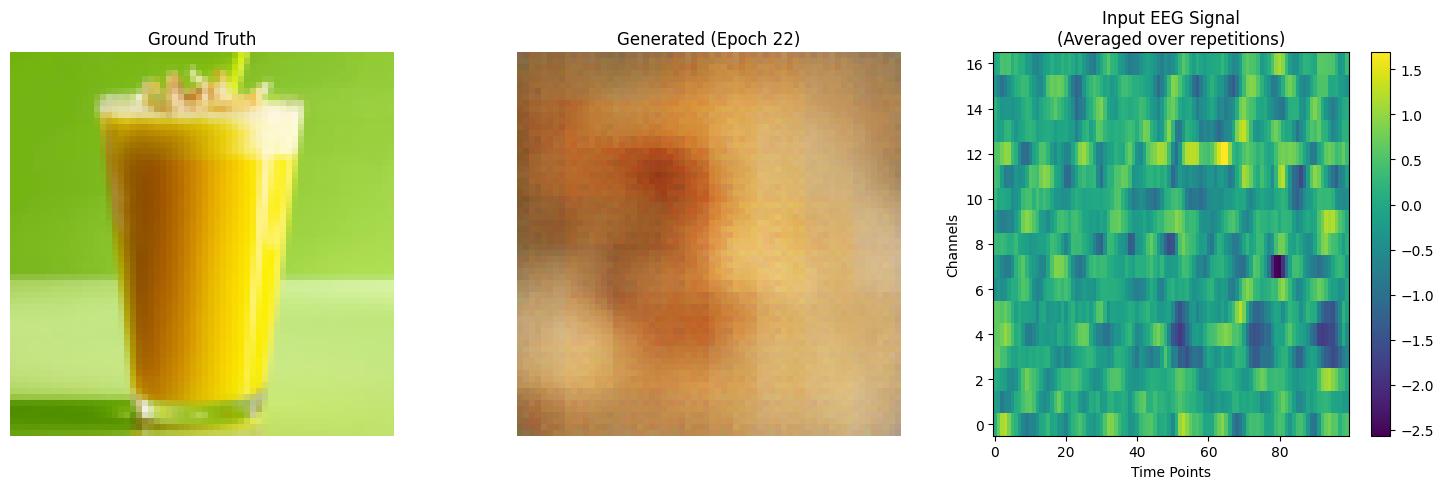

Epoch [23/100] Batch [0/517] D Loss: 0.0066 G Loss: 2547.9980 (Adv: 15.4569, Rec: 0.2533)
Epoch [23/100] Batch [100/517] D Loss: 0.0018 G Loss: 2484.6421 (Adv: 15.9604, Rec: 0.2469)
Epoch [23/100] Batch [200/517] D Loss: 0.0082 G Loss: 2473.3701 (Adv: 13.5432, Rec: 0.2460)
Epoch [23/100] Batch [300/517] D Loss: 0.0033 G Loss: 2566.4209 (Adv: 16.1565, Rec: 0.2550)
Epoch [23/100] Batch [400/517] D Loss: 0.0004 G Loss: 2969.9370 (Adv: 16.0667, Rec: 0.2954)
Epoch [23/100] Batch [500/517] D Loss: 0.0047 G Loss: 2422.7996 (Adv: 14.9275, Rec: 0.2408)


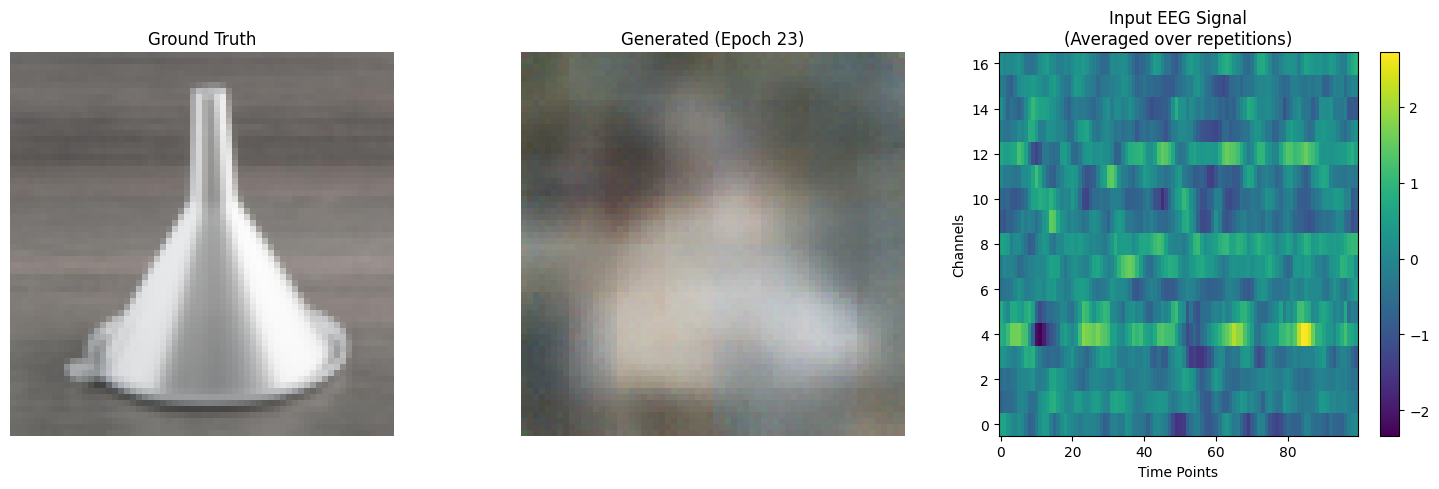

Epoch [24/100] Batch [0/517] D Loss: 0.0045 G Loss: 2277.1501 (Adv: 15.0181, Rec: 0.2262)
Epoch [24/100] Batch [100/517] D Loss: 0.0013 G Loss: 2486.2034 (Adv: 15.2851, Rec: 0.2471)
Epoch [24/100] Batch [200/517] D Loss: 0.0180 G Loss: 2337.8188 (Adv: 18.8751, Rec: 0.2319)
Epoch [24/100] Batch [300/517] D Loss: 0.0066 G Loss: 2637.4558 (Adv: 14.2121, Rec: 0.2623)
Epoch [24/100] Batch [400/517] D Loss: 0.0019 G Loss: 2508.6931 (Adv: 15.5166, Rec: 0.2493)
Epoch [24/100] Batch [500/517] D Loss: 0.0039 G Loss: 2485.5679 (Adv: 17.8372, Rec: 0.2468)


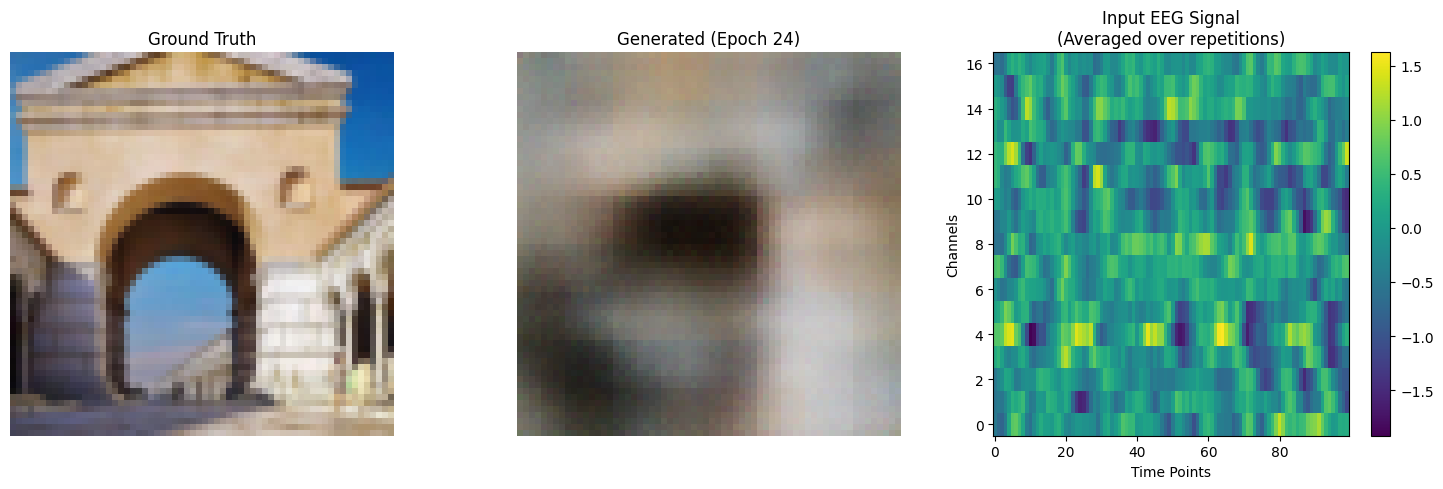

Epoch [25/100] Batch [0/517] D Loss: 0.0018 G Loss: 2373.8662 (Adv: 17.4539, Rec: 0.2356)
Epoch [25/100] Batch [100/517] D Loss: 0.0013 G Loss: 2382.2668 (Adv: 15.6466, Rec: 0.2367)
Epoch [25/100] Batch [200/517] D Loss: 0.0345 G Loss: 2389.9800 (Adv: 17.9655, Rec: 0.2372)
Epoch [25/100] Batch [300/517] D Loss: 0.0010 G Loss: 2385.9634 (Adv: 15.8896, Rec: 0.2370)
Epoch [25/100] Batch [400/517] D Loss: 0.0013 G Loss: 2400.1431 (Adv: 17.0369, Rec: 0.2383)
Epoch [25/100] Batch [500/517] D Loss: 0.0034 G Loss: 2413.4958 (Adv: 16.5253, Rec: 0.2397)


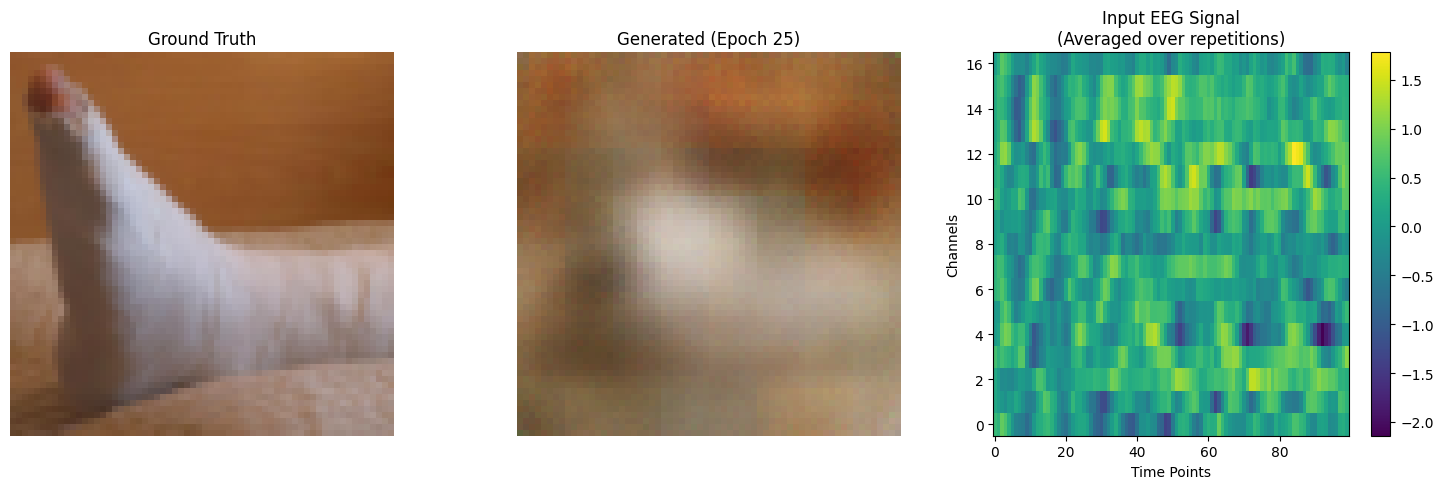

Epoch [26/100] Batch [0/517] D Loss: 0.0019 G Loss: 2531.4807 (Adv: 17.9385, Rec: 0.2514)
Epoch [26/100] Batch [100/517] D Loss: 0.0016 G Loss: 2408.4099 (Adv: 17.7525, Rec: 0.2391)
Epoch [26/100] Batch [200/517] D Loss: 0.0011 G Loss: 2486.3948 (Adv: 17.1315, Rec: 0.2469)
Epoch [26/100] Batch [300/517] D Loss: 0.0037 G Loss: 2324.9509 (Adv: 14.6973, Rec: 0.2310)
Epoch [26/100] Batch [400/517] D Loss: 0.0026 G Loss: 2394.7749 (Adv: 18.8189, Rec: 0.2376)
Epoch [26/100] Batch [500/517] D Loss: 0.0010 G Loss: 2346.3103 (Adv: 16.6675, Rec: 0.2330)


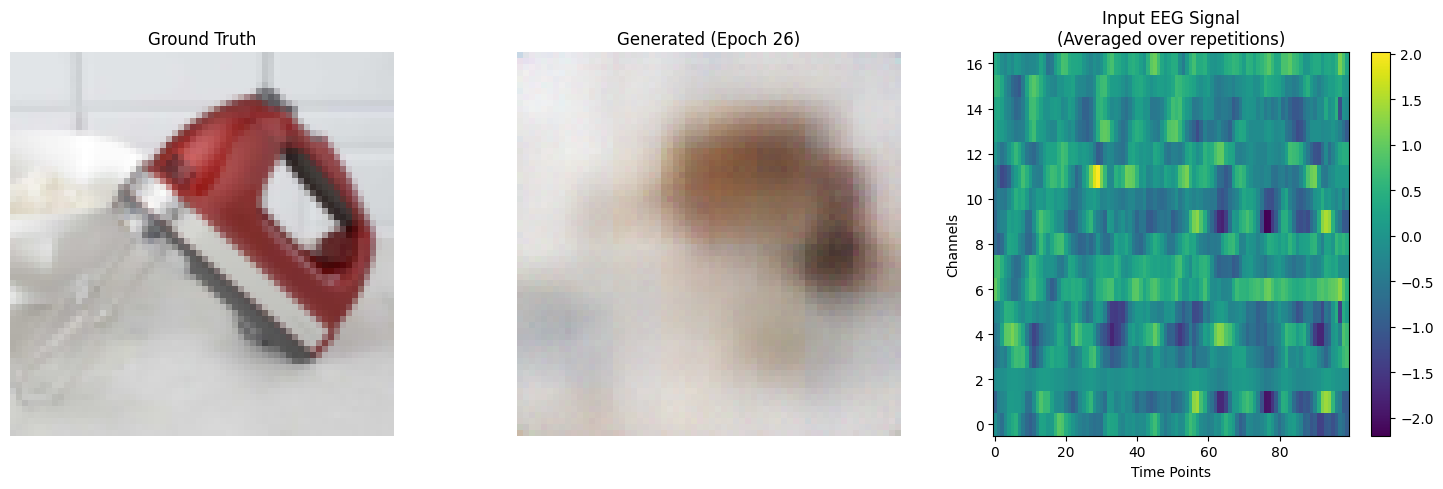

Epoch [27/100] Batch [0/517] D Loss: 0.0006 G Loss: 2344.4465 (Adv: 19.9265, Rec: 0.2325)
Epoch [27/100] Batch [100/517] D Loss: 0.0006 G Loss: 2302.0330 (Adv: 19.7568, Rec: 0.2282)
Epoch [27/100] Batch [200/517] D Loss: 0.0022 G Loss: 2485.4553 (Adv: 18.0474, Rec: 0.2467)
Epoch [27/100] Batch [300/517] D Loss: 0.0026 G Loss: 2286.9729 (Adv: 15.3763, Rec: 0.2272)
Epoch [27/100] Batch [400/517] D Loss: 0.0032 G Loss: 2294.9458 (Adv: 16.0260, Rec: 0.2279)
Epoch [27/100] Batch [500/517] D Loss: 0.0031 G Loss: 2186.9744 (Adv: 15.8176, Rec: 0.2171)


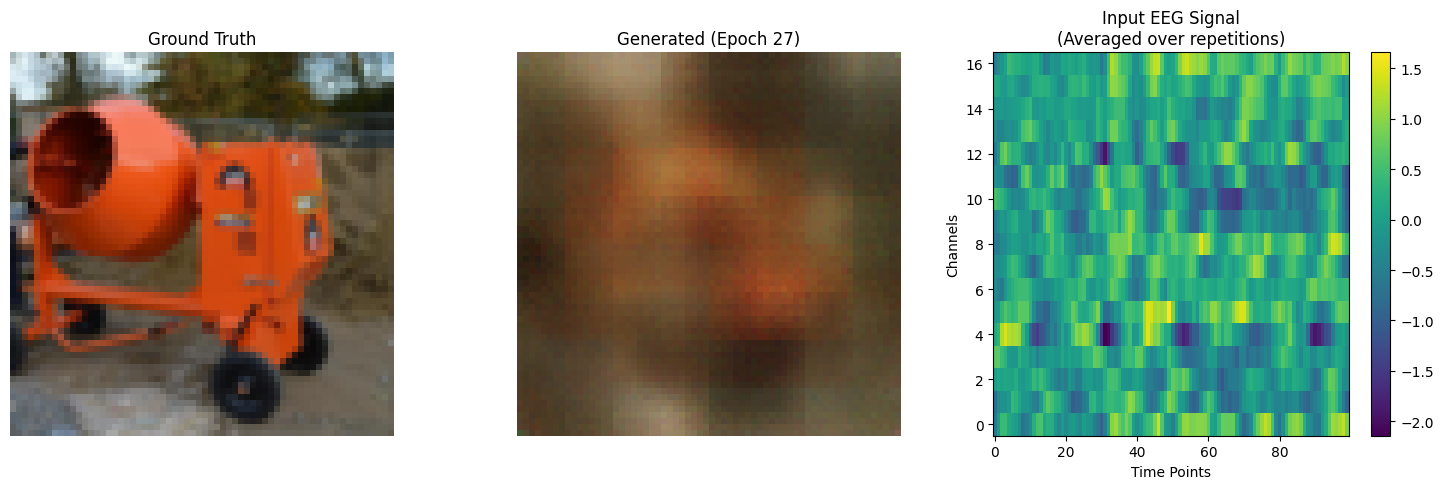

Epoch [28/100] Batch [0/517] D Loss: 0.0002 G Loss: 2423.7097 (Adv: 18.3066, Rec: 0.2405)
Epoch [28/100] Batch [100/517] D Loss: 0.0027 G Loss: 2506.8994 (Adv: 17.9609, Rec: 0.2489)
Epoch [28/100] Batch [200/517] D Loss: 0.0007 G Loss: 2215.4941 (Adv: 19.7617, Rec: 0.2196)
Epoch [28/100] Batch [300/517] D Loss: 0.0040 G Loss: 2428.7825 (Adv: 20.1330, Rec: 0.2409)
Epoch [28/100] Batch [400/517] D Loss: 0.0030 G Loss: 2408.3669 (Adv: 17.8971, Rec: 0.2390)
Epoch [28/100] Batch [500/517] D Loss: 0.0008 G Loss: 2316.8965 (Adv: 18.4993, Rec: 0.2298)


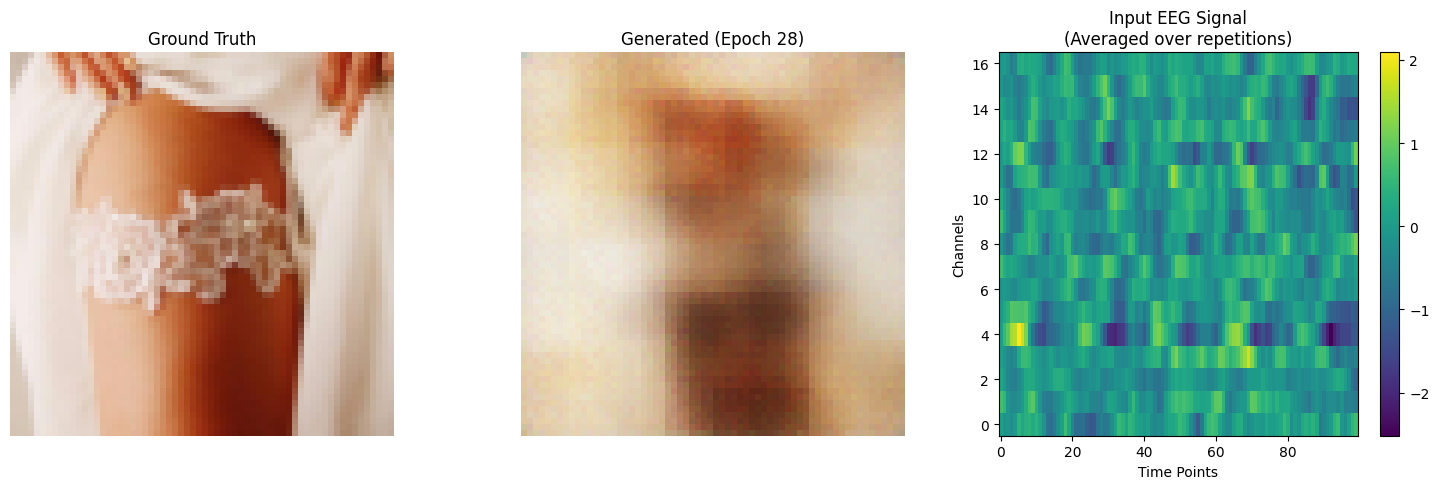

Epoch [29/100] Batch [0/517] D Loss: 0.0008 G Loss: 2294.3032 (Adv: 19.2471, Rec: 0.2275)
Epoch [29/100] Batch [100/517] D Loss: 0.0038 G Loss: 2298.1858 (Adv: 17.7541, Rec: 0.2280)
Epoch [29/100] Batch [200/517] D Loss: 0.0002 G Loss: 2339.7112 (Adv: 19.7843, Rec: 0.2320)
Epoch [29/100] Batch [300/517] D Loss: 0.0073 G Loss: 2242.0542 (Adv: 18.2549, Rec: 0.2224)
Epoch [29/100] Batch [400/517] D Loss: 0.0003 G Loss: 2515.5366 (Adv: 19.1031, Rec: 0.2496)
Epoch [29/100] Batch [500/517] D Loss: 0.0012 G Loss: 2393.2092 (Adv: 18.3681, Rec: 0.2375)


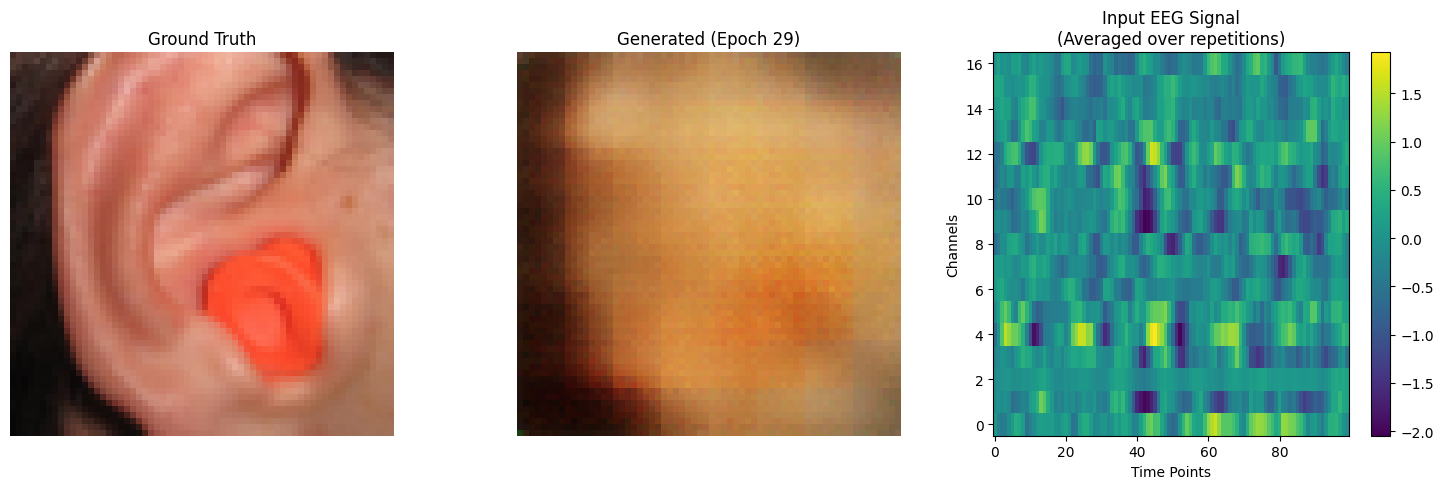

Epoch [30/100] Batch [0/517] D Loss: 0.0017 G Loss: 2366.5830 (Adv: 17.8633, Rec: 0.2349)
Epoch [30/100] Batch [100/517] D Loss: 0.0001 G Loss: 2594.2051 (Adv: 17.4328, Rec: 0.2577)
Epoch [30/100] Batch [200/517] D Loss: 0.0003 G Loss: 2340.4612 (Adv: 18.9890, Rec: 0.2321)
Epoch [30/100] Batch [300/517] D Loss: 0.0041 G Loss: 2297.7642 (Adv: 18.1216, Rec: 0.2280)
Epoch [30/100] Batch [400/517] D Loss: 0.0002 G Loss: 2237.1902 (Adv: 19.5707, Rec: 0.2218)
Epoch [30/100] Batch [500/517] D Loss: 0.0003 G Loss: 2296.8562 (Adv: 18.6446, Rec: 0.2278)


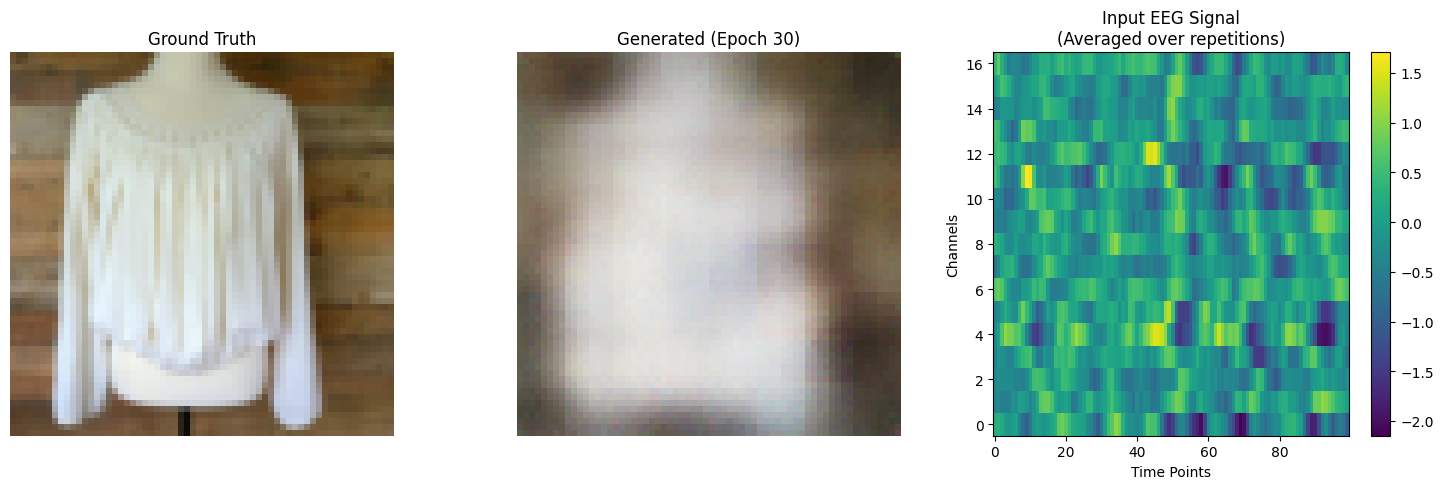

Epoch [31/100] Batch [0/517] D Loss: 0.0005 G Loss: 2247.7231 (Adv: 18.3573, Rec: 0.2229)
Epoch [31/100] Batch [100/517] D Loss: 0.0002 G Loss: 2275.5356 (Adv: 17.4131, Rec: 0.2258)
Epoch [31/100] Batch [200/517] D Loss: 0.0173 G Loss: 2236.6765 (Adv: 15.3306, Rec: 0.2221)
Epoch [31/100] Batch [300/517] D Loss: 0.0001 G Loss: 2353.8584 (Adv: 17.7200, Rec: 0.2336)
Epoch [31/100] Batch [400/517] D Loss: 0.0001 G Loss: 2582.8018 (Adv: 17.5900, Rec: 0.2565)
Epoch [31/100] Batch [500/517] D Loss: 0.0003 G Loss: 2259.0779 (Adv: 16.8311, Rec: 0.2242)


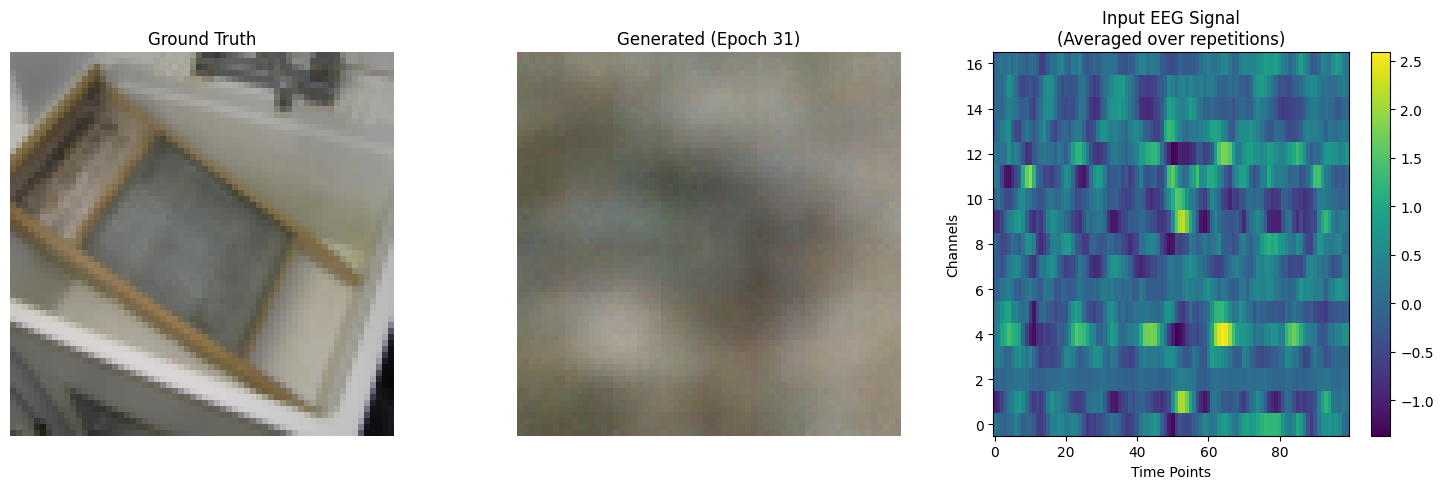

Epoch [32/100] Batch [0/517] D Loss: 0.0008 G Loss: 2199.2625 (Adv: 16.0350, Rec: 0.2183)
Epoch [32/100] Batch [100/517] D Loss: 348.5005 G Loss: 2291.4990 (Adv: 7.7661, Rec: 0.2284)
Epoch [32/100] Batch [200/517] D Loss: 9.5051 G Loss: 2166.9331 (Adv: 7.1173, Rec: 0.2160)
Epoch [32/100] Batch [300/517] D Loss: 0.9862 G Loss: 2352.1138 (Adv: 12.8659, Rec: 0.2339)
Epoch [32/100] Batch [400/517] D Loss: 0.1455 G Loss: 2136.6519 (Adv: 10.8324, Rec: 0.2126)
Epoch [32/100] Batch [500/517] D Loss: 0.0413 G Loss: 2362.3340 (Adv: 13.1248, Rec: 0.2349)


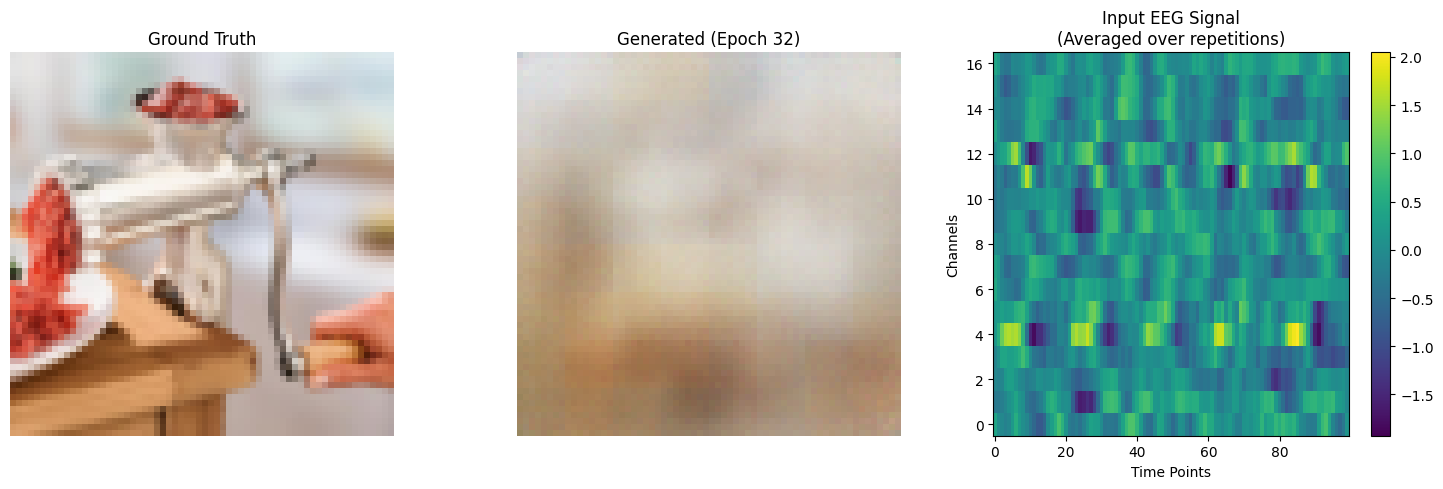

Epoch [33/100] Batch [0/517] D Loss: 0.0303 G Loss: 2457.2278 (Adv: 12.2687, Rec: 0.2445)
Epoch [33/100] Batch [100/517] D Loss: 0.1246 G Loss: 2213.1531 (Adv: 15.3714, Rec: 0.2198)
Epoch [33/100] Batch [200/517] D Loss: 0.0315 G Loss: 2305.4917 (Adv: 14.4071, Rec: 0.2291)
Epoch [33/100] Batch [300/517] D Loss: 0.0404 G Loss: 2239.8259 (Adv: 13.8261, Rec: 0.2226)
Epoch [33/100] Batch [400/517] D Loss: 0.0800 G Loss: 2188.5593 (Adv: 14.7149, Rec: 0.2174)
Epoch [33/100] Batch [500/517] D Loss: 0.0507 G Loss: 2296.2734 (Adv: 14.9434, Rec: 0.2281)


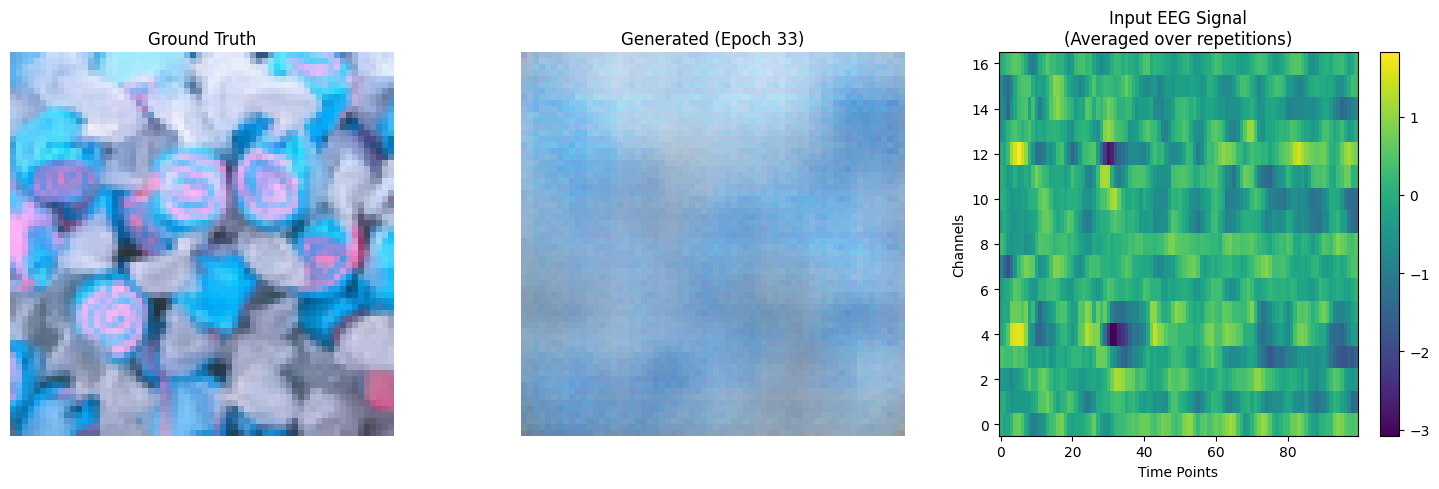

Epoch [34/100] Batch [0/517] D Loss: 0.0107 G Loss: 2241.0120 (Adv: 15.1256, Rec: 0.2226)
Epoch [34/100] Batch [100/517] D Loss: 0.0555 G Loss: 2562.4993 (Adv: 11.4426, Rec: 0.2551)
Epoch [34/100] Batch [200/517] D Loss: 0.0104 G Loss: 2364.2649 (Adv: 14.0665, Rec: 0.2350)
Epoch [34/100] Batch [300/517] D Loss: 0.0322 G Loss: 2388.8562 (Adv: 11.8903, Rec: 0.2377)
Epoch [34/100] Batch [400/517] D Loss: 0.0265 G Loss: 2426.3772 (Adv: 12.5500, Rec: 0.2414)
Epoch [34/100] Batch [500/517] D Loss: 0.0049 G Loss: 2234.2742 (Adv: 14.8587, Rec: 0.2219)


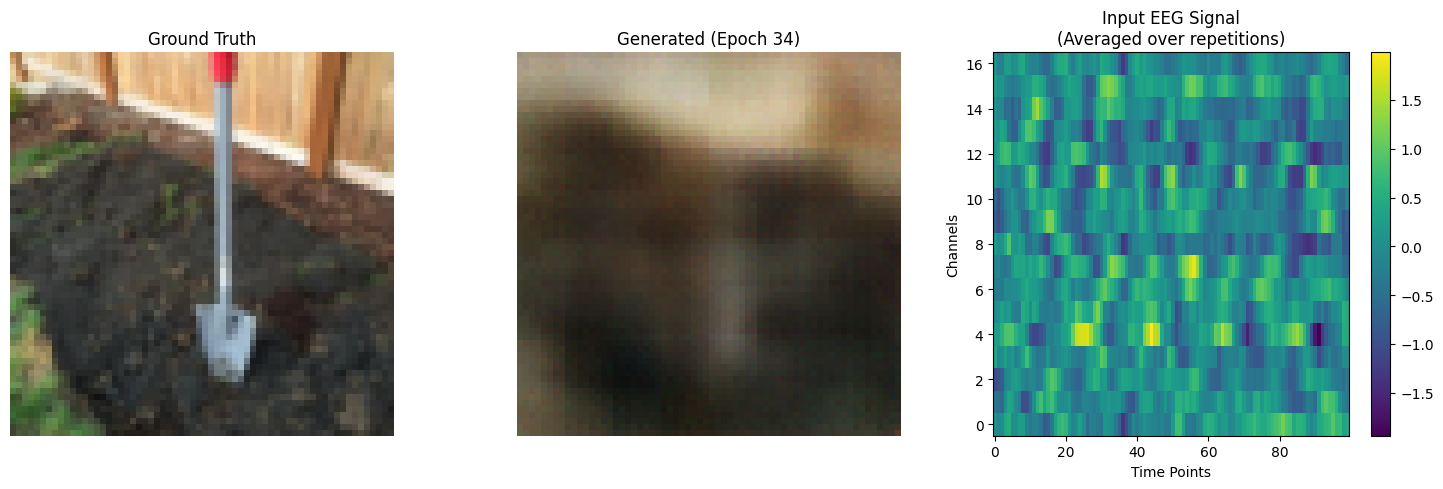

Epoch [35/100] Batch [0/517] D Loss: 0.0237 G Loss: 2296.6272 (Adv: 14.0181, Rec: 0.2283)
Epoch [35/100] Batch [100/517] D Loss: 0.0083 G Loss: 2517.3713 (Adv: 14.8810, Rec: 0.2502)
Epoch [35/100] Batch [200/517] D Loss: 0.0604 G Loss: 2302.8438 (Adv: 14.4338, Rec: 0.2288)
Epoch [35/100] Batch [300/517] D Loss: 0.0144 G Loss: 2187.7048 (Adv: 12.9407, Rec: 0.2175)
Epoch [35/100] Batch [400/517] D Loss: 0.0196 G Loss: 2361.8955 (Adv: 12.5210, Rec: 0.2349)
Epoch [35/100] Batch [500/517] D Loss: 0.0048 G Loss: 2425.8975 (Adv: 13.9813, Rec: 0.2412)


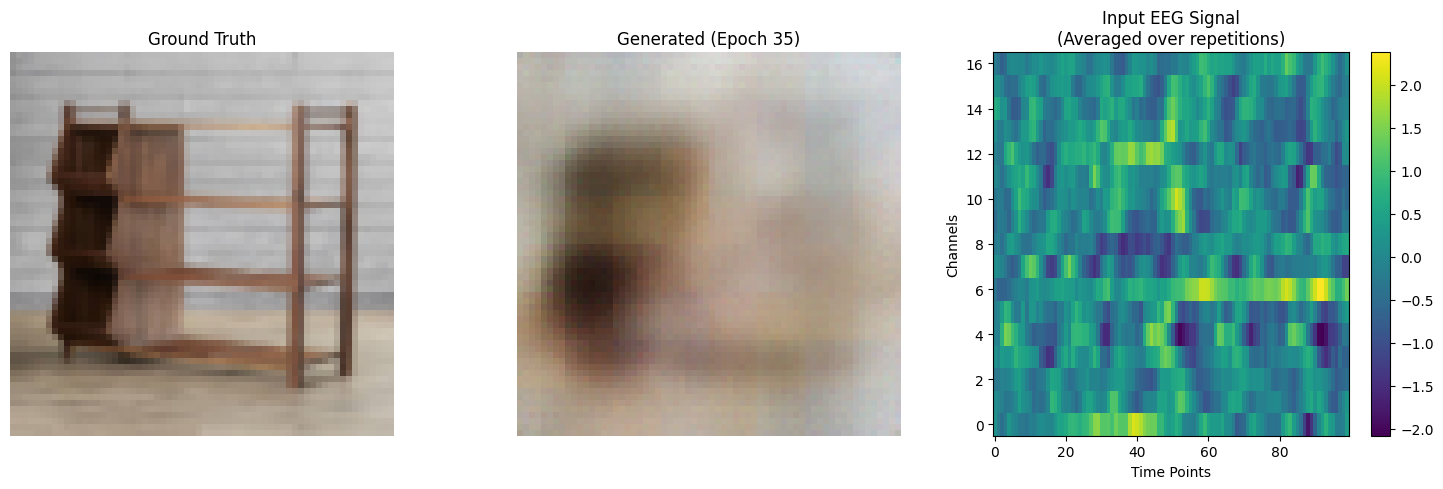

Epoch [36/100] Batch [0/517] D Loss: 0.1189 G Loss: 2290.8557 (Adv: 10.2744, Rec: 0.2281)
Epoch [36/100] Batch [100/517] D Loss: 0.3238 G Loss: 2021.3966 (Adv: 15.4687, Rec: 0.2006)
Epoch [36/100] Batch [200/517] D Loss: 0.0015 G Loss: 2246.6294 (Adv: 17.3585, Rec: 0.2229)
Epoch [36/100] Batch [300/517] D Loss: 0.0031 G Loss: 2225.7517 (Adv: 15.1173, Rec: 0.2211)
Epoch [36/100] Batch [400/517] D Loss: 0.0306 G Loss: 2160.4927 (Adv: 11.4989, Rec: 0.2149)
Epoch [36/100] Batch [500/517] D Loss: 0.0082 G Loss: 2257.4104 (Adv: 12.9577, Rec: 0.2244)


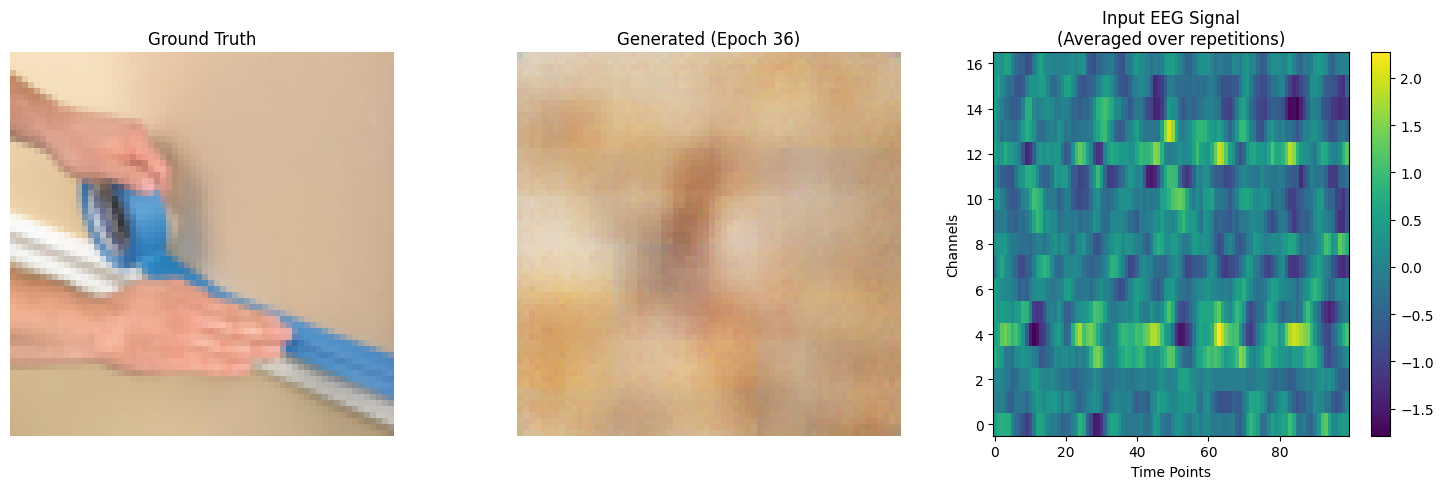

Epoch [37/100] Batch [0/517] D Loss: 0.0048 G Loss: 2259.4448 (Adv: 13.3149, Rec: 0.2246)
Epoch [37/100] Batch [100/517] D Loss: 0.0011 G Loss: 2282.5391 (Adv: 15.7220, Rec: 0.2267)
Epoch [37/100] Batch [200/517] D Loss: 0.0045 G Loss: 2410.7241 (Adv: 13.2802, Rec: 0.2397)
Epoch [37/100] Batch [300/517] D Loss: 0.0084 G Loss: 2245.1877 (Adv: 13.5607, Rec: 0.2232)
Epoch [37/100] Batch [400/517] D Loss: 0.0010 G Loss: 2199.4561 (Adv: 14.8440, Rec: 0.2185)
Epoch [37/100] Batch [500/517] D Loss: 0.0018 G Loss: 2231.2302 (Adv: 16.5075, Rec: 0.2215)


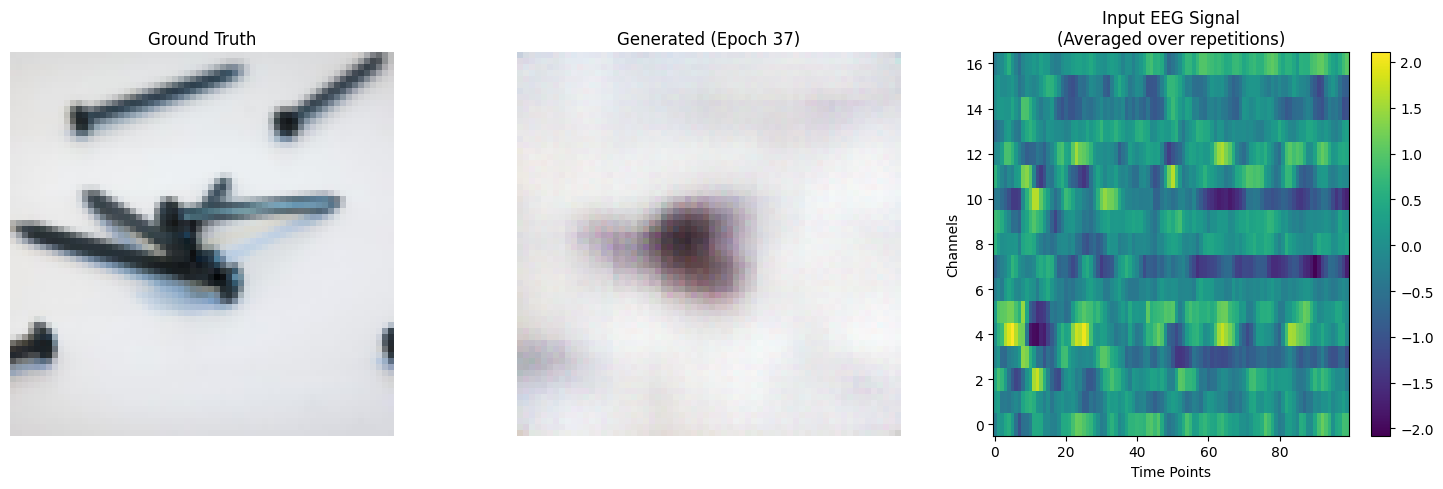

Epoch [38/100] Batch [0/517] D Loss: 0.0074 G Loss: 2297.7507 (Adv: 15.9408, Rec: 0.2282)
Epoch [38/100] Batch [100/517] D Loss: 0.0016 G Loss: 2147.3164 (Adv: 15.7639, Rec: 0.2132)
Epoch [38/100] Batch [200/517] D Loss: 0.0024 G Loss: 2244.7644 (Adv: 14.3070, Rec: 0.2230)
Epoch [38/100] Batch [300/517] D Loss: 0.0006 G Loss: 2329.2993 (Adv: 17.2648, Rec: 0.2312)
Epoch [38/100] Batch [400/517] D Loss: 0.0037 G Loss: 2248.8652 (Adv: 13.3667, Rec: 0.2235)
Epoch [38/100] Batch [500/517] D Loss: 0.0009 G Loss: 2316.5625 (Adv: 15.5304, Rec: 0.2301)


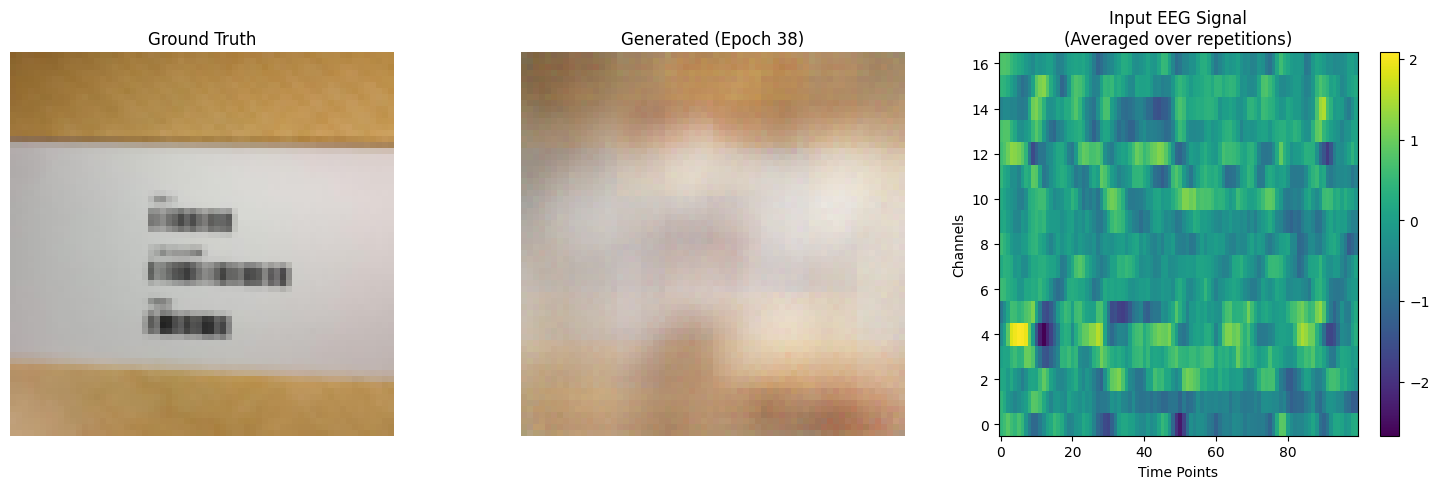

Epoch [39/100] Batch [0/517] D Loss: 0.0177 G Loss: 2174.8730 (Adv: 12.4091, Rec: 0.2162)
Epoch [39/100] Batch [100/517] D Loss: 0.0026 G Loss: 2246.4819 (Adv: 15.2355, Rec: 0.2231)
Epoch [39/100] Batch [200/517] D Loss: 0.0032 G Loss: 2220.4976 (Adv: 17.0575, Rec: 0.2203)
Epoch [39/100] Batch [300/517] D Loss: 0.0042 G Loss: 2264.3208 (Adv: 15.2007, Rec: 0.2249)
Epoch [39/100] Batch [400/517] D Loss: 0.0032 G Loss: 2147.8003 (Adv: 14.1001, Rec: 0.2134)
Epoch [39/100] Batch [500/517] D Loss: 0.0020 G Loss: 2299.0972 (Adv: 14.5729, Rec: 0.2285)


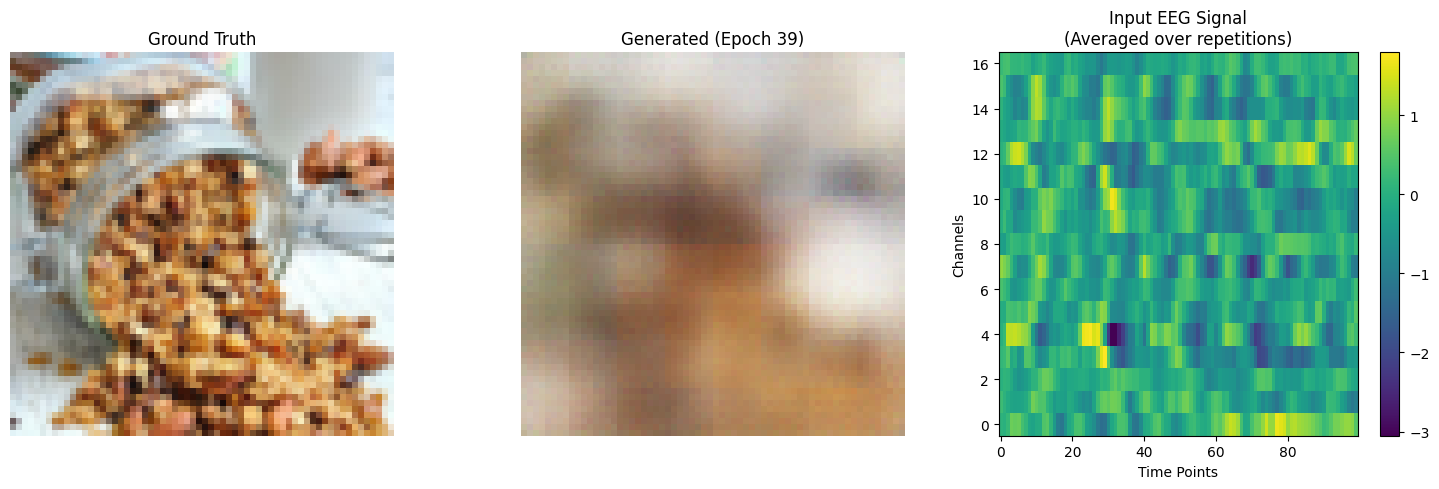

Epoch [40/100] Batch [0/517] D Loss: 0.0010 G Loss: 2199.0334 (Adv: 15.2642, Rec: 0.2184)
Epoch [40/100] Batch [100/517] D Loss: 0.0006 G Loss: 2242.6812 (Adv: 15.9426, Rec: 0.2227)
Epoch [40/100] Batch [200/517] D Loss: 0.0026 G Loss: 2273.0374 (Adv: 14.1935, Rec: 0.2259)
Epoch [40/100] Batch [300/517] D Loss: 0.0020 G Loss: 2258.3472 (Adv: 15.1618, Rec: 0.2243)
Epoch [40/100] Batch [400/517] D Loss: 0.0023 G Loss: 2159.4639 (Adv: 16.6398, Rec: 0.2143)
Epoch [40/100] Batch [500/517] D Loss: 0.0008 G Loss: 2364.1338 (Adv: 15.1081, Rec: 0.2349)


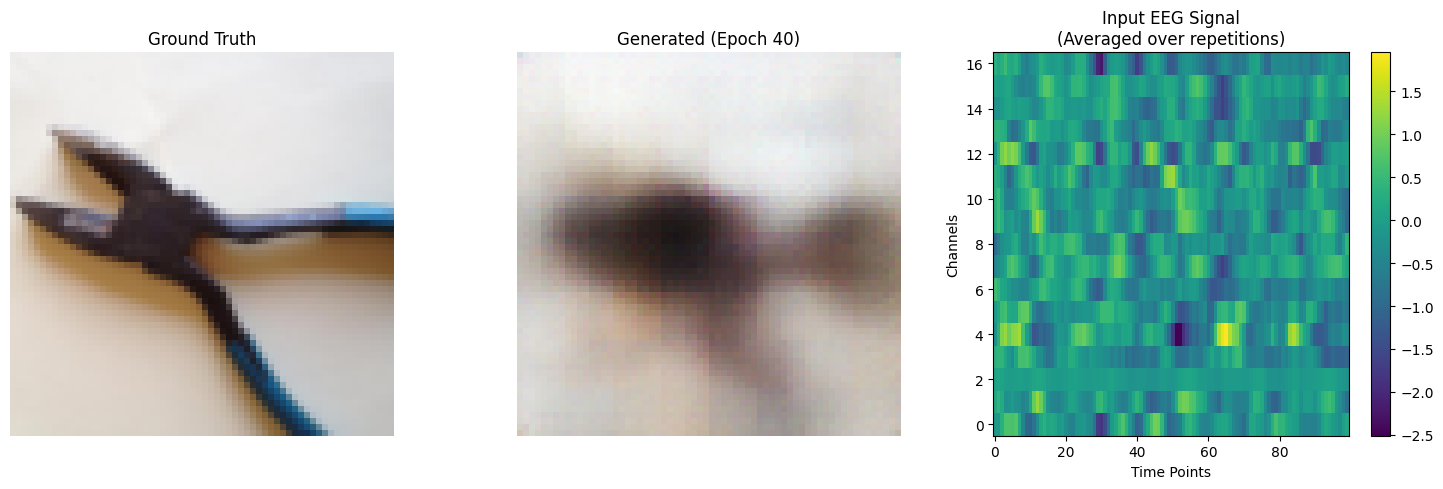

Epoch [41/100] Batch [0/517] D Loss: 0.0047 G Loss: 2108.8521 (Adv: 16.3554, Rec: 0.2092)
Epoch [41/100] Batch [100/517] D Loss: 0.0036 G Loss: 2226.3616 (Adv: 17.1458, Rec: 0.2209)
Epoch [41/100] Batch [200/517] D Loss: 0.0022 G Loss: 2348.9771 (Adv: 15.8465, Rec: 0.2333)
Epoch [41/100] Batch [300/517] D Loss: 0.0045 G Loss: 2086.7510 (Adv: 16.0128, Rec: 0.2071)
Epoch [41/100] Batch [400/517] D Loss: 0.0030 G Loss: 2128.6270 (Adv: 17.4501, Rec: 0.2111)
Epoch [41/100] Batch [500/517] D Loss: 0.0011 G Loss: 2228.9167 (Adv: 15.6891, Rec: 0.2213)


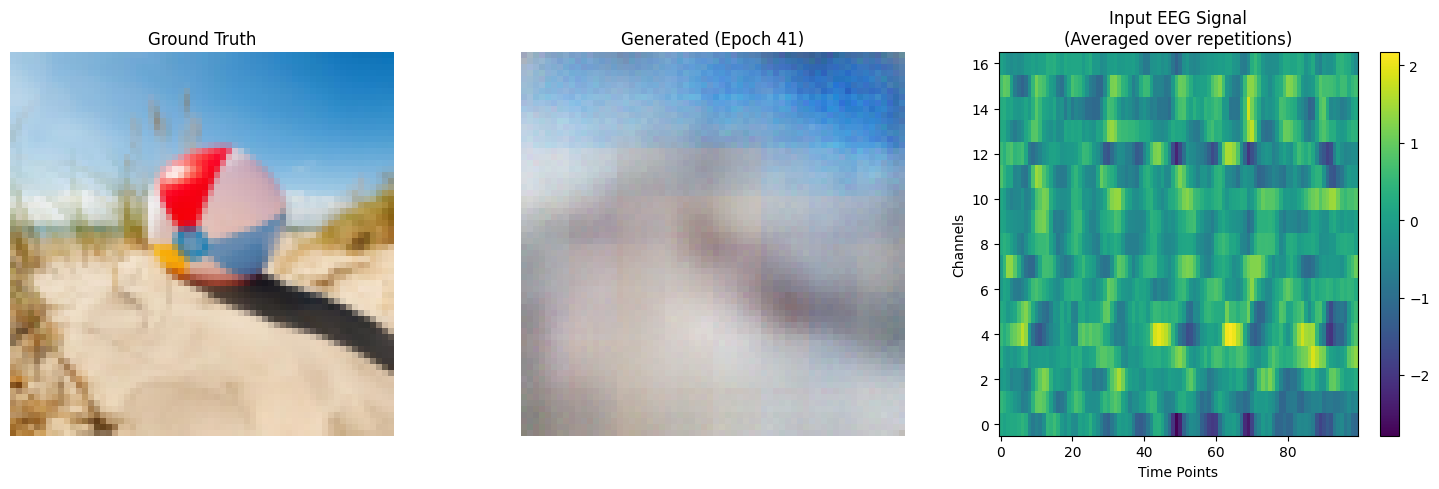

Epoch [42/100] Batch [0/517] D Loss: 0.0030 G Loss: 2148.7593 (Adv: 15.4609, Rec: 0.2133)
Epoch [42/100] Batch [100/517] D Loss: 0.0190 G Loss: 2284.5623 (Adv: 13.1063, Rec: 0.2271)
Epoch [42/100] Batch [200/517] D Loss: 0.0036 G Loss: 2073.7776 (Adv: 19.3387, Rec: 0.2054)
Epoch [42/100] Batch [300/517] D Loss: 0.0010 G Loss: 2191.5208 (Adv: 17.1010, Rec: 0.2174)
Epoch [42/100] Batch [400/517] D Loss: 0.0020 G Loss: 2300.9253 (Adv: 15.0585, Rec: 0.2286)
Epoch [42/100] Batch [500/517] D Loss: 0.0159 G Loss: 2096.1562 (Adv: 19.2023, Rec: 0.2077)


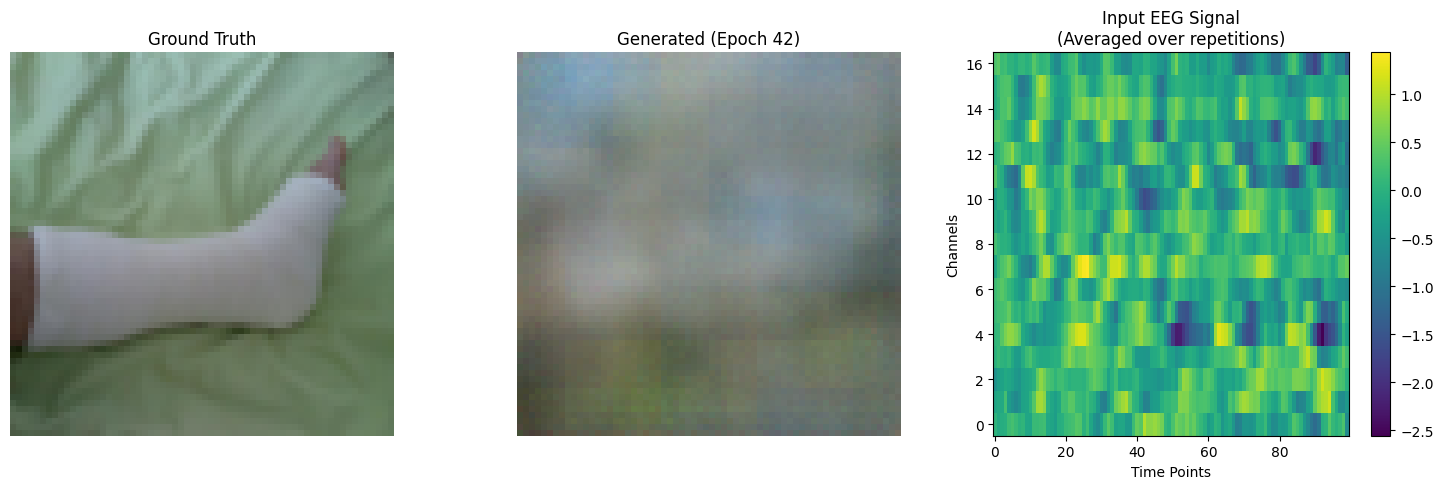

Epoch [43/100] Batch [0/517] D Loss: 0.0010 G Loss: 2270.5879 (Adv: 15.6133, Rec: 0.2255)
Epoch [43/100] Batch [100/517] D Loss: 0.0004 G Loss: 2261.5779 (Adv: 16.7589, Rec: 0.2245)
Epoch [43/100] Batch [200/517] D Loss: 0.0009 G Loss: 2132.3267 (Adv: 18.8587, Rec: 0.2113)
Epoch [43/100] Batch [300/517] D Loss: 0.0008 G Loss: 2407.3132 (Adv: 15.2045, Rec: 0.2392)
Epoch [43/100] Batch [400/517] D Loss: 0.0007 G Loss: 2305.9282 (Adv: 16.2373, Rec: 0.2290)
Epoch [43/100] Batch [500/517] D Loss: 0.0008 G Loss: 2115.5298 (Adv: 17.5792, Rec: 0.2098)


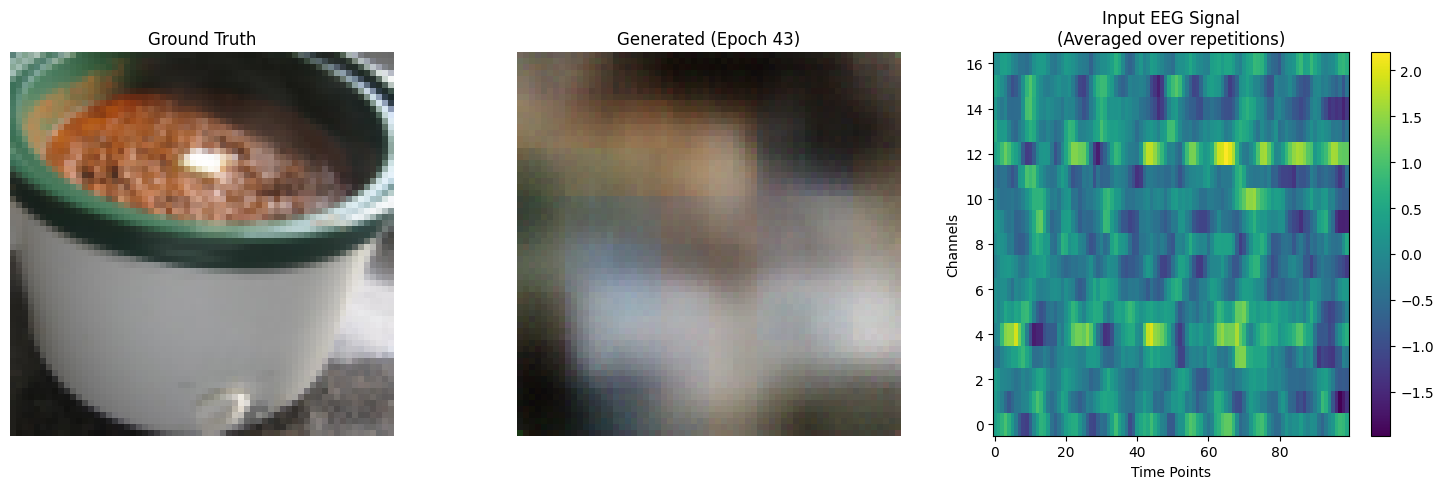

Epoch [44/100] Batch [0/517] D Loss: 0.0311 G Loss: 2122.0918 (Adv: 16.5909, Rec: 0.2106)
Epoch [44/100] Batch [100/517] D Loss: 0.0004 G Loss: 2393.0271 (Adv: 15.3771, Rec: 0.2378)
Epoch [44/100] Batch [200/517] D Loss: 0.0140 G Loss: 2168.0562 (Adv: 12.2932, Rec: 0.2156)
Epoch [44/100] Batch [300/517] D Loss: 0.0016 G Loss: 2138.3948 (Adv: 18.6170, Rec: 0.2120)
Epoch [44/100] Batch [400/517] D Loss: 0.0002 G Loss: 2337.4873 (Adv: 17.8552, Rec: 0.2320)
Epoch [44/100] Batch [500/517] D Loss: 0.0026 G Loss: 2361.4612 (Adv: 16.4853, Rec: 0.2345)


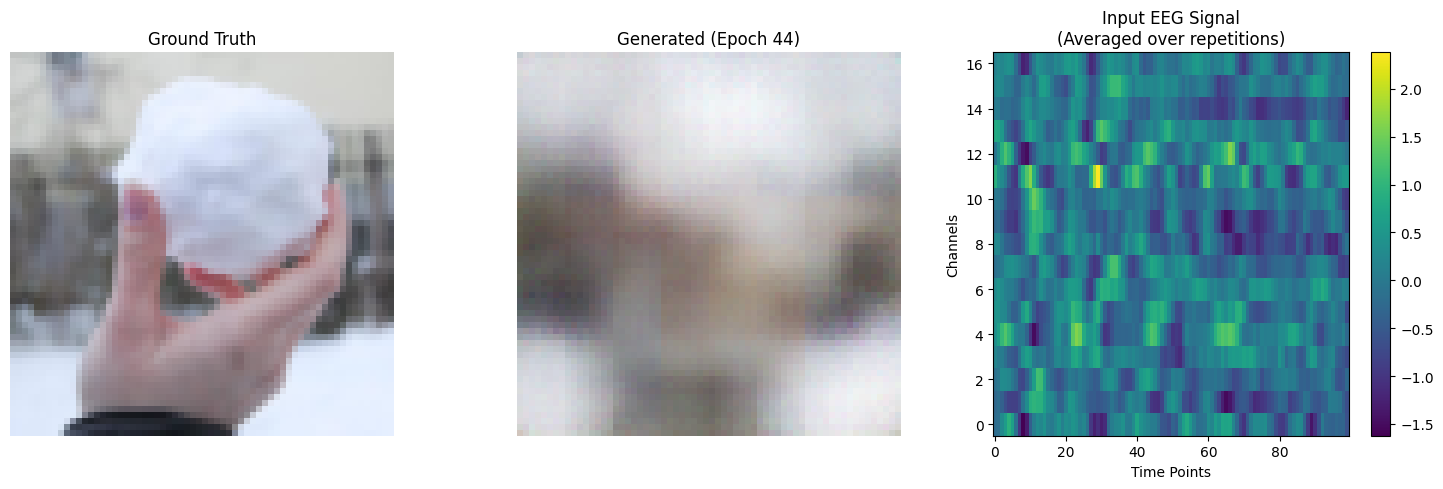

Epoch [45/100] Batch [0/517] D Loss: 0.0237 G Loss: 2207.6560 (Adv: 13.1832, Rec: 0.2194)
Epoch [45/100] Batch [100/517] D Loss: 0.0020 G Loss: 2320.6233 (Adv: 14.7237, Rec: 0.2306)
Epoch [45/100] Batch [200/517] D Loss: 0.0011 G Loss: 2297.2573 (Adv: 15.5308, Rec: 0.2282)
Epoch [45/100] Batch [300/517] D Loss: 0.0002 G Loss: 2464.4800 (Adv: 17.7923, Rec: 0.2447)
Epoch [45/100] Batch [400/517] D Loss: 0.0002 G Loss: 2259.1309 (Adv: 19.0268, Rec: 0.2240)
Epoch [45/100] Batch [500/517] D Loss: 0.0003 G Loss: 2195.9185 (Adv: 16.7321, Rec: 0.2179)


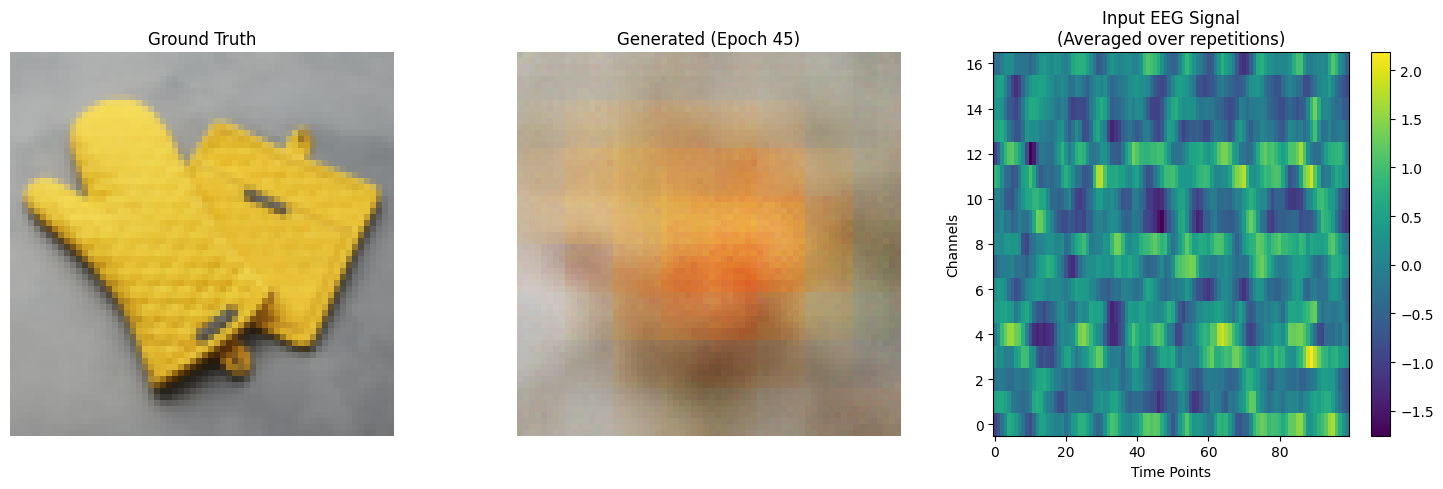

Epoch [46/100] Batch [0/517] D Loss: 0.0001 G Loss: 2246.2429 (Adv: 19.0152, Rec: 0.2227)
Epoch [46/100] Batch [100/517] D Loss: 0.0048 G Loss: 2084.4368 (Adv: 19.0727, Rec: 0.2065)
Epoch [46/100] Batch [200/517] D Loss: 0.0002 G Loss: 2388.8333 (Adv: 16.9059, Rec: 0.2372)
Epoch [46/100] Batch [300/517] D Loss: 0.0023 G Loss: 2050.9907 (Adv: 17.2261, Rec: 0.2034)
Epoch [46/100] Batch [400/517] D Loss: 0.0004 G Loss: 2113.5562 (Adv: 17.8802, Rec: 0.2096)
Epoch [46/100] Batch [500/517] D Loss: 0.0012 G Loss: 2267.1907 (Adv: 15.1284, Rec: 0.2252)


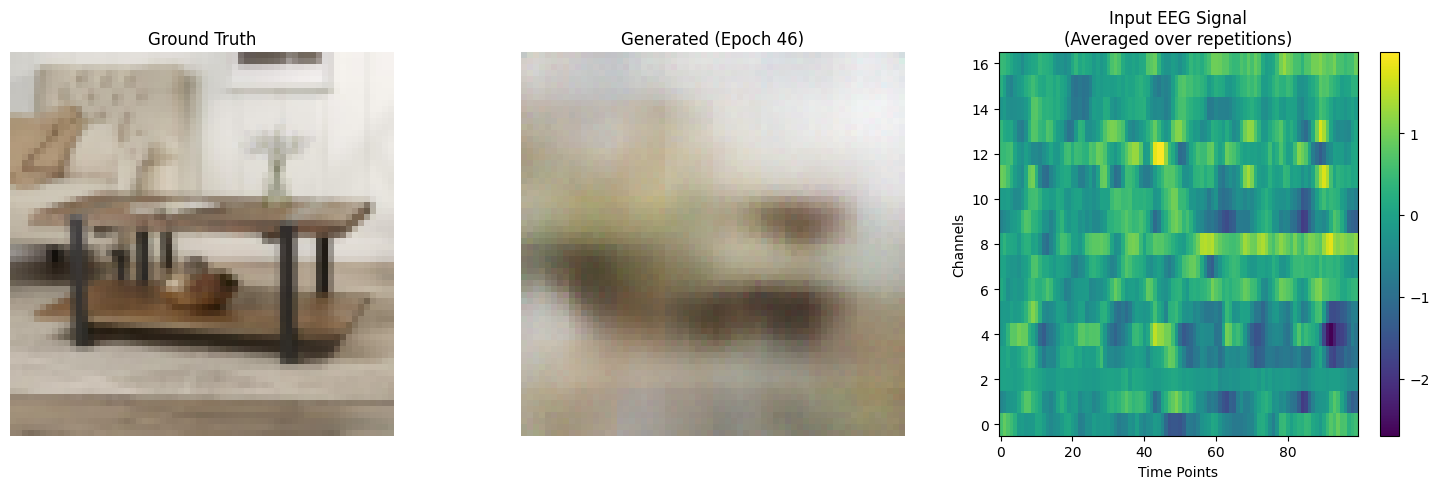

Epoch [47/100] Batch [0/517] D Loss: 0.0001 G Loss: 2434.9614 (Adv: 18.9768, Rec: 0.2416)
Epoch [47/100] Batch [100/517] D Loss: 0.0003 G Loss: 2252.5835 (Adv: 16.4872, Rec: 0.2236)
Epoch [47/100] Batch [200/517] D Loss: 0.0005 G Loss: 2084.9617 (Adv: 19.8481, Rec: 0.2065)
Epoch [47/100] Batch [300/517] D Loss: 0.0004 G Loss: 2131.3662 (Adv: 15.7441, Rec: 0.2116)
Epoch [47/100] Batch [400/517] D Loss: 0.0009 G Loss: 2174.4421 (Adv: 17.7084, Rec: 0.2157)
Epoch [47/100] Batch [500/517] D Loss: 0.0001 G Loss: 2428.4324 (Adv: 19.2032, Rec: 0.2409)


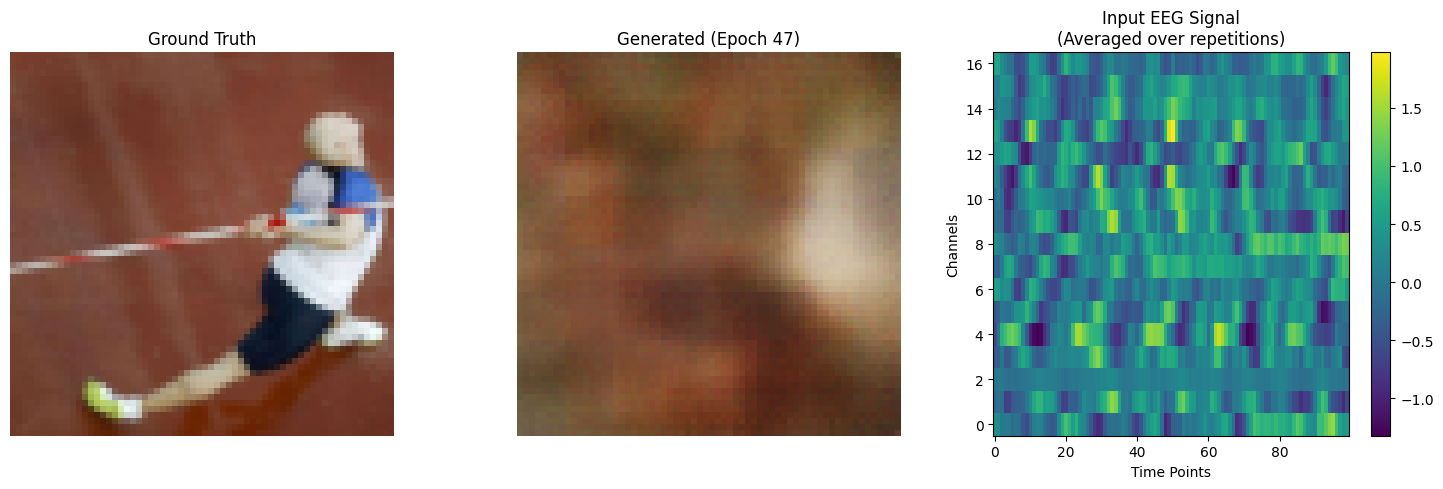

Epoch [48/100] Batch [0/517] D Loss: 0.0008 G Loss: 2182.0337 (Adv: 17.6205, Rec: 0.2164)
Epoch [48/100] Batch [100/517] D Loss: 0.0000 G Loss: 2447.6638 (Adv: 18.9141, Rec: 0.2429)
Epoch [48/100] Batch [200/517] D Loss: 0.0021 G Loss: 2554.9573 (Adv: 15.1293, Rec: 0.2540)
Epoch [48/100] Batch [300/517] D Loss: 0.0001 G Loss: 2149.7996 (Adv: 18.9463, Rec: 0.2131)
Epoch [48/100] Batch [400/517] D Loss: 0.0001 G Loss: 2271.3623 (Adv: 18.9851, Rec: 0.2252)
Epoch [48/100] Batch [500/517] D Loss: 0.0002 G Loss: 2060.4844 (Adv: 16.9198, Rec: 0.2044)


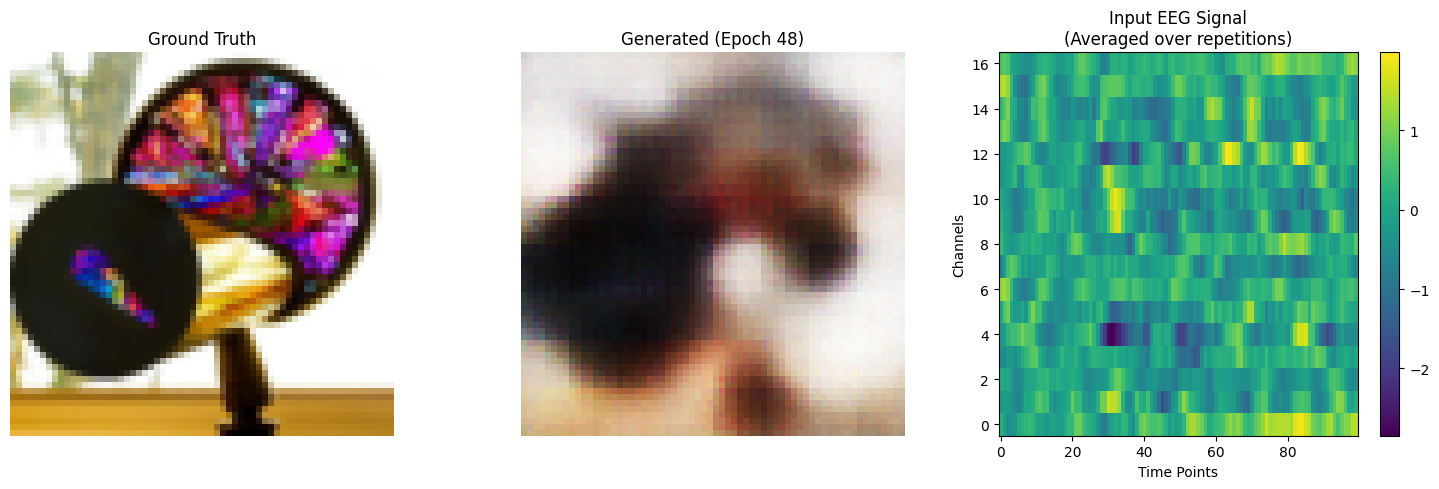

Epoch [49/100] Batch [0/517] D Loss: 0.0000 G Loss: 2207.8005 (Adv: 19.5628, Rec: 0.2188)
Epoch [49/100] Batch [100/517] D Loss: 0.7949 G Loss: 2235.7888 (Adv: 12.4552, Rec: 0.2223)
Epoch [49/100] Batch [200/517] D Loss: 0.1717 G Loss: 2126.8354 (Adv: 12.2622, Rec: 0.2115)
Epoch [49/100] Batch [300/517] D Loss: 0.0464 G Loss: 2228.0757 (Adv: 13.1952, Rec: 0.2215)
Epoch [49/100] Batch [400/517] D Loss: 0.0314 G Loss: 2101.7593 (Adv: 14.5388, Rec: 0.2087)
Epoch [49/100] Batch [500/517] D Loss: 0.0304 G Loss: 2221.5596 (Adv: 13.6623, Rec: 0.2208)


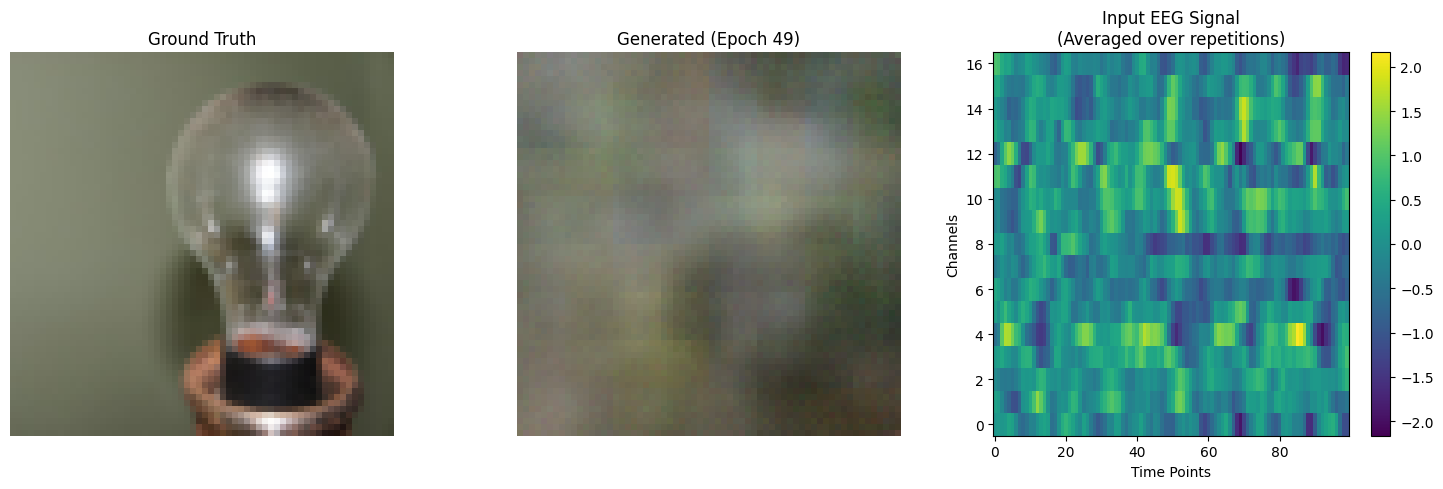

Epoch [50/100] Batch [0/517] D Loss: 0.0747 G Loss: 2156.4875 (Adv: 14.4141, Rec: 0.2142)
Epoch [50/100] Batch [100/517] D Loss: 0.0347 G Loss: 2169.0007 (Adv: 12.5150, Rec: 0.2156)
Epoch [50/100] Batch [200/517] D Loss: 0.0192 G Loss: 2024.4336 (Adv: 14.4882, Rec: 0.2010)
Epoch [50/100] Batch [300/517] D Loss: 0.0319 G Loss: 2047.7863 (Adv: 12.4739, Rec: 0.2035)
Epoch [50/100] Batch [400/517] D Loss: 0.0403 G Loss: 2193.1833 (Adv: 11.8736, Rec: 0.2181)
Epoch [50/100] Batch [500/517] D Loss: 0.0251 G Loss: 2176.7393 (Adv: 14.5184, Rec: 0.2162)


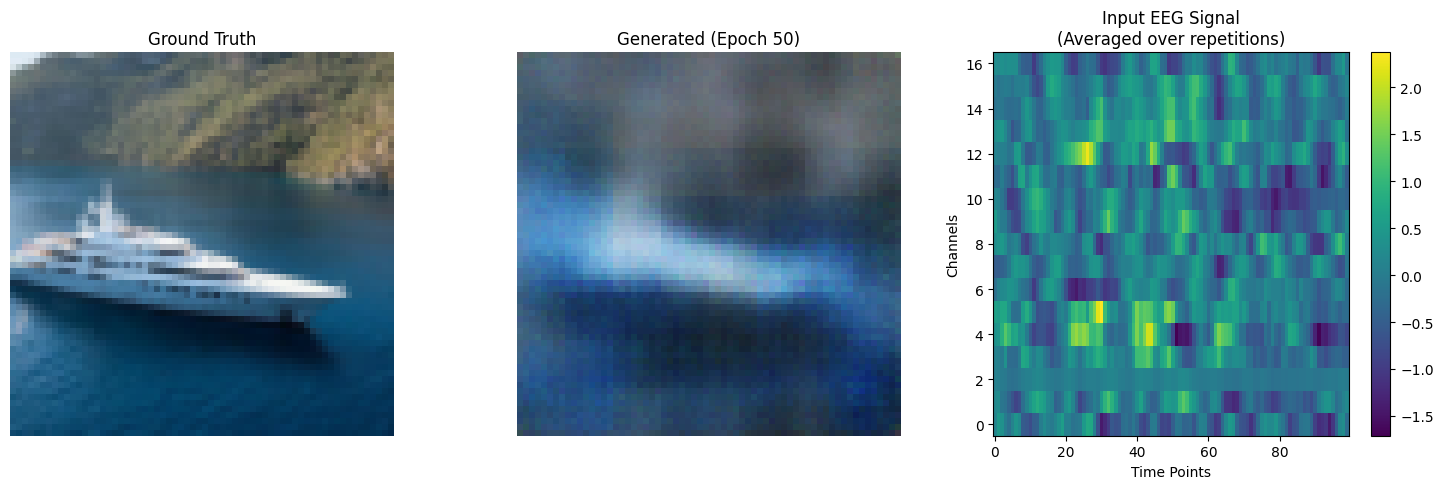

Epoch [51/100] Batch [0/517] D Loss: 0.0466 G Loss: 1972.3875 (Adv: 13.3907, Rec: 0.1959)
Epoch [51/100] Batch [100/517] D Loss: 0.0032 G Loss: 2203.9229 (Adv: 14.5867, Rec: 0.2189)
Epoch [51/100] Batch [200/517] D Loss: 0.0131 G Loss: 2238.9512 (Adv: 13.8553, Rec: 0.2225)
Epoch [51/100] Batch [300/517] D Loss: 0.0060 G Loss: 2092.7979 (Adv: 15.3424, Rec: 0.2077)
Epoch [51/100] Batch [400/517] D Loss: 0.0089 G Loss: 2220.4194 (Adv: 14.9919, Rec: 0.2205)
Epoch [51/100] Batch [500/517] D Loss: 0.0020 G Loss: 2315.9287 (Adv: 15.7315, Rec: 0.2300)


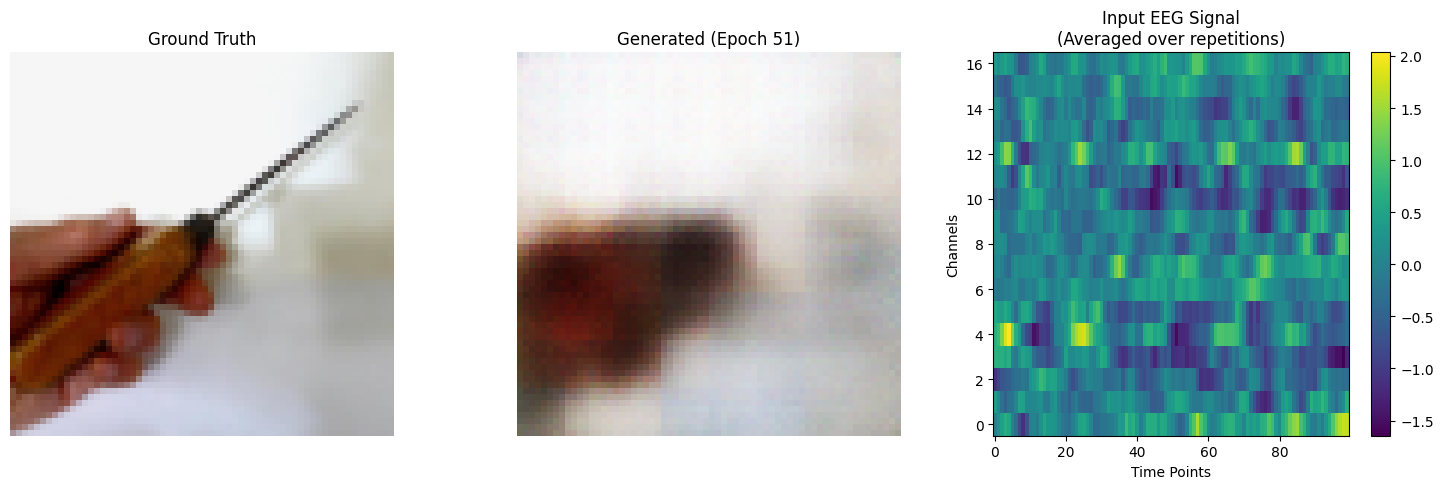

Epoch [52/100] Batch [0/517] D Loss: 0.0098 G Loss: 2020.9351 (Adv: 15.1643, Rec: 0.2006)
Epoch [52/100] Batch [100/517] D Loss: 0.0102 G Loss: 2144.1677 (Adv: 13.4207, Rec: 0.2131)
Epoch [52/100] Batch [200/517] D Loss: 0.0084 G Loss: 2005.4601 (Adv: 14.9951, Rec: 0.1990)
Epoch [52/100] Batch [300/517] D Loss: 0.0436 G Loss: 2221.3167 (Adv: 12.0436, Rec: 0.2209)
Epoch [52/100] Batch [400/517] D Loss: 0.0035 G Loss: 2131.8647 (Adv: 14.9915, Rec: 0.2117)
Epoch [52/100] Batch [500/517] D Loss: 0.0350 G Loss: 2020.4644 (Adv: 15.9938, Rec: 0.2004)


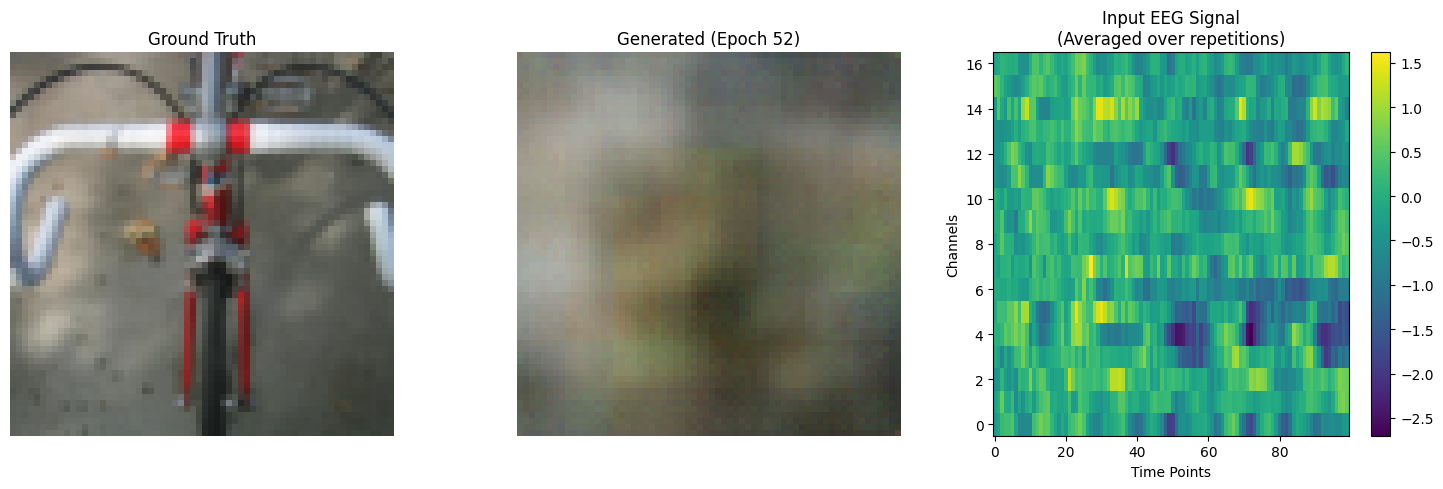

Epoch [53/100] Batch [0/517] D Loss: 0.0042 G Loss: 2228.7505 (Adv: 14.6372, Rec: 0.2214)
Epoch [53/100] Batch [100/517] D Loss: 0.0055 G Loss: 2123.0708 (Adv: 13.1358, Rec: 0.2110)
Epoch [53/100] Batch [200/517] D Loss: 0.0239 G Loss: 2205.1411 (Adv: 14.1675, Rec: 0.2191)
Epoch [53/100] Batch [300/517] D Loss: 0.0030 G Loss: 2153.6709 (Adv: 15.2817, Rec: 0.2138)
Epoch [53/100] Batch [400/517] D Loss: 0.0034 G Loss: 2171.2883 (Adv: 15.7646, Rec: 0.2156)
Epoch [53/100] Batch [500/517] D Loss: 0.0063 G Loss: 2018.9431 (Adv: 13.3032, Rec: 0.2006)


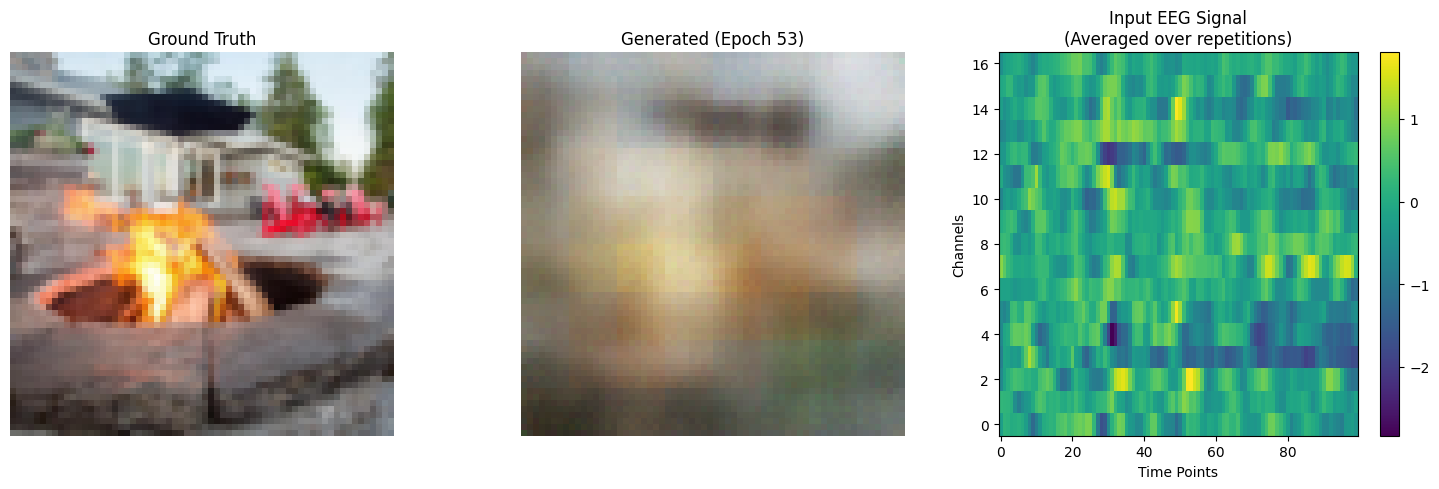

Epoch [54/100] Batch [0/517] D Loss: 0.0005 G Loss: 2100.5442 (Adv: 16.2899, Rec: 0.2084)
Epoch [54/100] Batch [100/517] D Loss: 0.0097 G Loss: 2176.3679 (Adv: 12.7753, Rec: 0.2164)
Epoch [54/100] Batch [200/517] D Loss: 0.0011 G Loss: 2110.2102 (Adv: 14.7499, Rec: 0.2095)
Epoch [54/100] Batch [300/517] D Loss: 0.0111 G Loss: 2103.8152 (Adv: 14.0673, Rec: 0.2090)
Epoch [54/100] Batch [400/517] D Loss: 0.0030 G Loss: 2119.7700 (Adv: 14.5973, Rec: 0.2105)
Epoch [54/100] Batch [500/517] D Loss: 0.0231 G Loss: 2206.3914 (Adv: 16.7500, Rec: 0.2190)


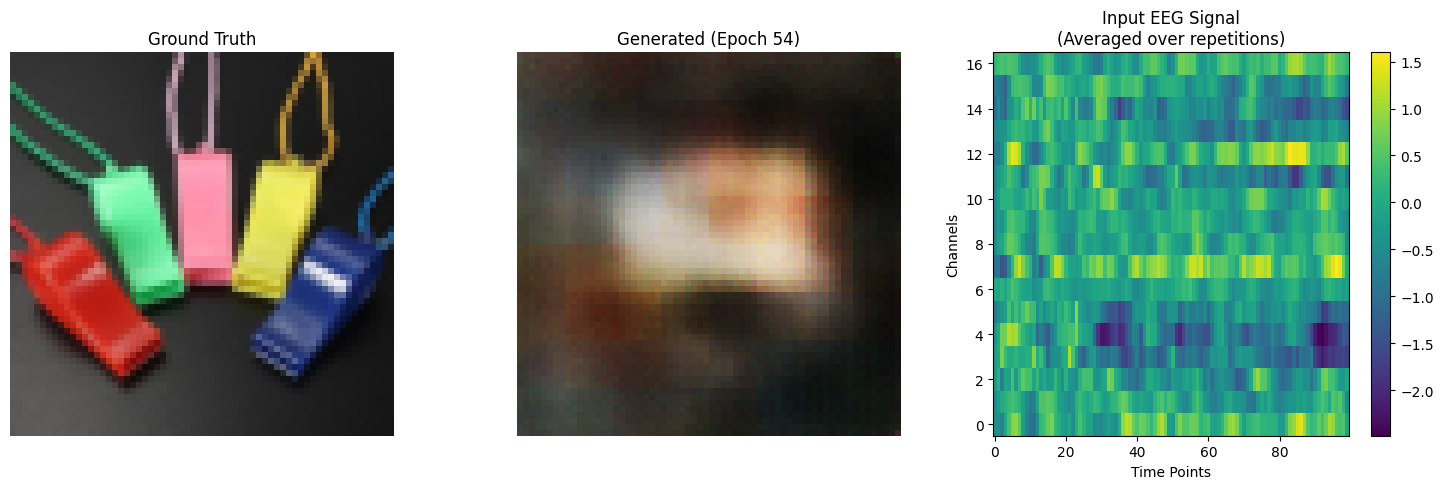

Epoch [55/100] Batch [0/517] D Loss: 0.0285 G Loss: 2178.3206 (Adv: 18.6317, Rec: 0.2160)
Epoch [55/100] Batch [100/517] D Loss: 0.0006 G Loss: 2126.6384 (Adv: 16.2600, Rec: 0.2110)
Epoch [55/100] Batch [200/517] D Loss: 0.0146 G Loss: 2109.5444 (Adv: 17.3197, Rec: 0.2092)
Epoch [55/100] Batch [300/517] D Loss: 0.0099 G Loss: 1927.0598 (Adv: 17.3712, Rec: 0.1910)
Epoch [55/100] Batch [400/517] D Loss: 0.0002 G Loss: 2235.3538 (Adv: 16.9404, Rec: 0.2218)
Epoch [55/100] Batch [500/517] D Loss: 0.0001 G Loss: 2167.1052 (Adv: 17.9341, Rec: 0.2149)


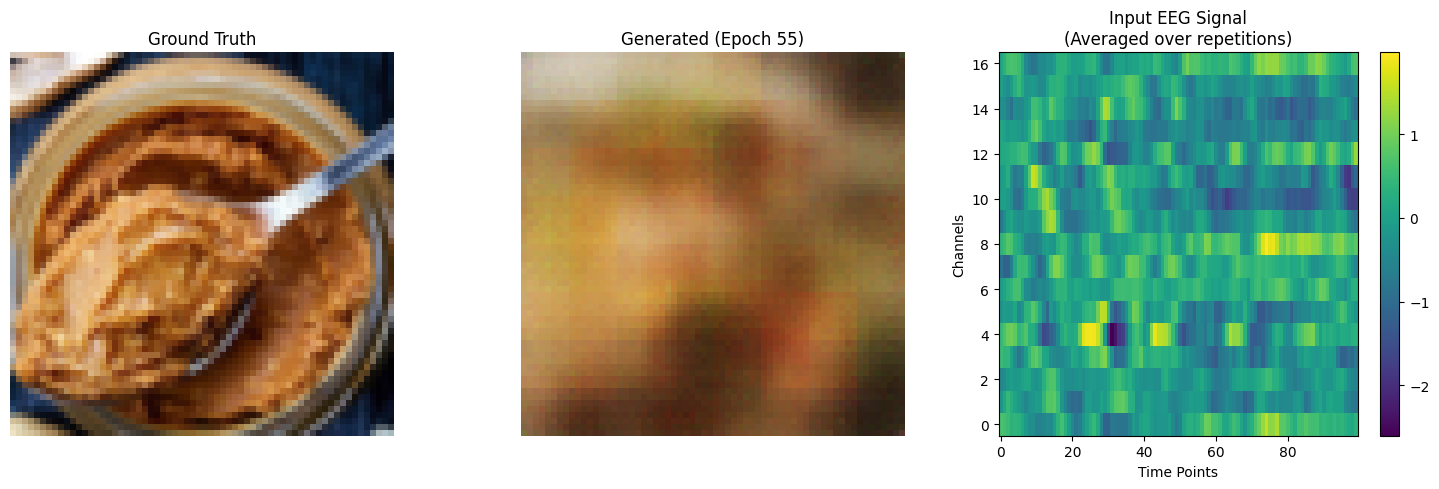

Epoch [56/100] Batch [0/517] D Loss: 0.0079 G Loss: 1879.5433 (Adv: 17.0927, Rec: 0.1862)
Epoch [56/100] Batch [100/517] D Loss: 0.0165 G Loss: 2012.2047 (Adv: 13.8464, Rec: 0.1998)
Epoch [56/100] Batch [200/517] D Loss: 0.0006 G Loss: 2052.1914 (Adv: 17.2161, Rec: 0.2035)
Epoch [56/100] Batch [300/517] D Loss: 0.0053 G Loss: 1987.0001 (Adv: 15.9297, Rec: 0.1971)
Epoch [56/100] Batch [400/517] D Loss: 0.0052 G Loss: 1999.2363 (Adv: 18.3710, Rec: 0.1981)
Epoch [56/100] Batch [500/517] D Loss: 0.0005 G Loss: 2107.8982 (Adv: 17.0407, Rec: 0.2091)


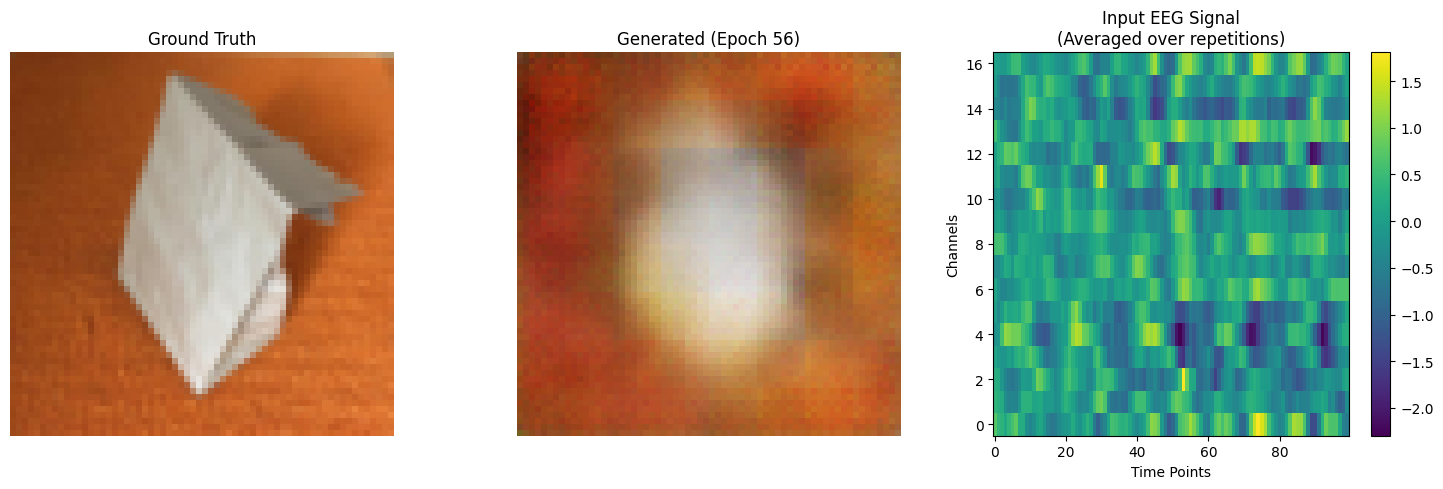

Epoch [57/100] Batch [0/517] D Loss: 0.0004 G Loss: 2247.9514 (Adv: 16.1497, Rec: 0.2232)
Epoch [57/100] Batch [100/517] D Loss: 0.0001 G Loss: 2167.4294 (Adv: 18.9919, Rec: 0.2148)
Epoch [57/100] Batch [200/517] D Loss: 0.0038 G Loss: 2114.2617 (Adv: 14.7943, Rec: 0.2099)
Epoch [57/100] Batch [300/517] D Loss: 0.0029 G Loss: 2041.3633 (Adv: 15.1352, Rec: 0.2026)
Epoch [57/100] Batch [400/517] D Loss: 0.0009 G Loss: 2007.1696 (Adv: 18.7896, Rec: 0.1988)
Epoch [57/100] Batch [500/517] D Loss: 0.0019 G Loss: 1975.8641 (Adv: 18.4077, Rec: 0.1957)


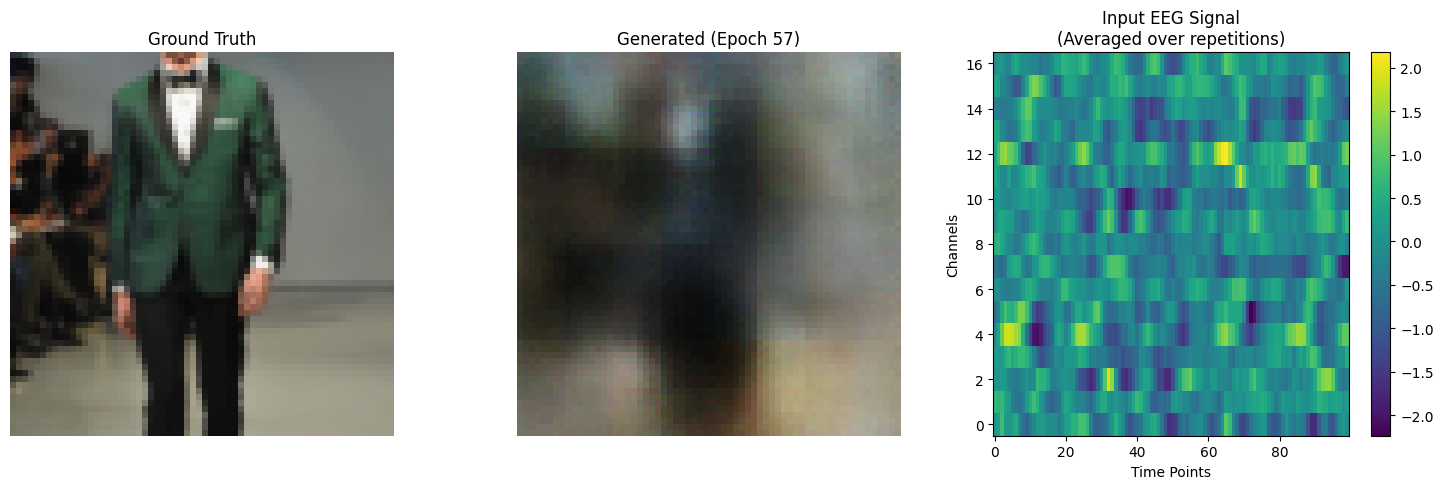

Epoch [58/100] Batch [0/517] D Loss: 0.0009 G Loss: 2120.3799 (Adv: 15.2944, Rec: 0.2105)
Epoch [58/100] Batch [100/517] D Loss: 0.0996 G Loss: 2069.7114 (Adv: 12.0386, Rec: 0.2058)
Epoch [58/100] Batch [200/517] D Loss: 0.0001 G Loss: 2204.3333 (Adv: 18.4839, Rec: 0.2186)
Epoch [58/100] Batch [300/517] D Loss: 0.0002 G Loss: 2111.1472 (Adv: 18.2865, Rec: 0.2093)
Epoch [58/100] Batch [400/517] D Loss: 0.0014 G Loss: 2099.6841 (Adv: 17.2235, Rec: 0.2082)
Epoch [58/100] Batch [500/517] D Loss: 0.0000 G Loss: 2205.3818 (Adv: 18.8385, Rec: 0.2187)


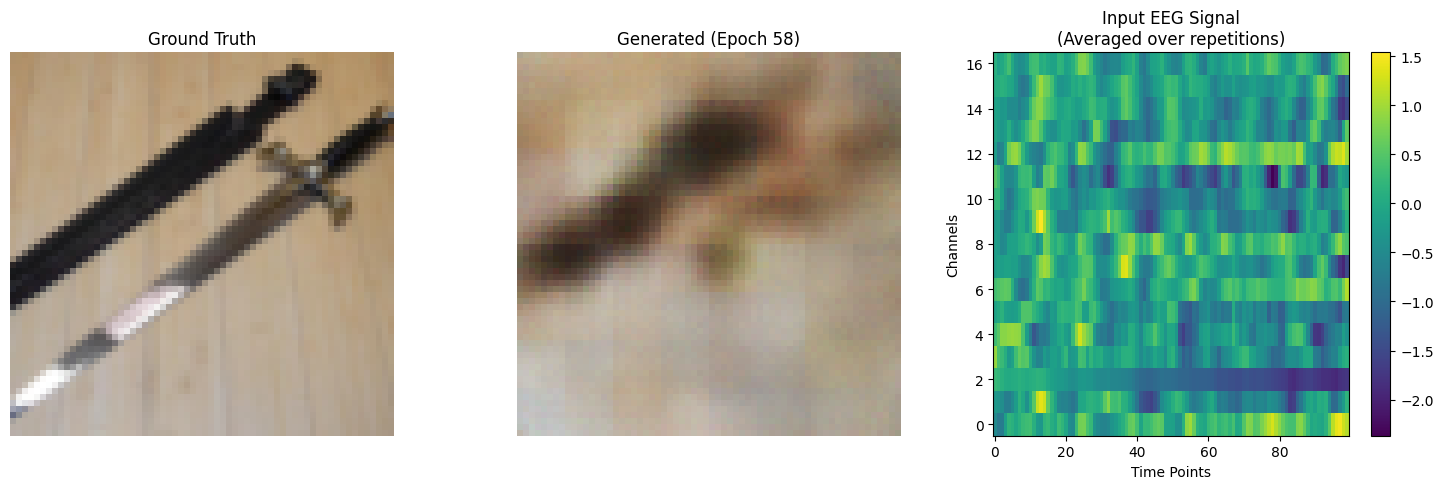

Epoch [59/100] Batch [0/517] D Loss: 0.0001 G Loss: 2191.2764 (Adv: 18.6629, Rec: 0.2173)
Epoch [59/100] Batch [100/517] D Loss: 0.0015 G Loss: 2114.6450 (Adv: 16.4634, Rec: 0.2098)
Epoch [59/100] Batch [200/517] D Loss: 0.0001 G Loss: 1999.8108 (Adv: 18.1971, Rec: 0.1982)
Epoch [59/100] Batch [300/517] D Loss: 0.0006 G Loss: 2135.3594 (Adv: 15.7845, Rec: 0.2120)
Epoch [59/100] Batch [400/517] D Loss: 0.0032 G Loss: 2138.1257 (Adv: 15.5074, Rec: 0.2123)
Epoch [59/100] Batch [500/517] D Loss: 0.0004 G Loss: 2163.8093 (Adv: 18.2697, Rec: 0.2146)


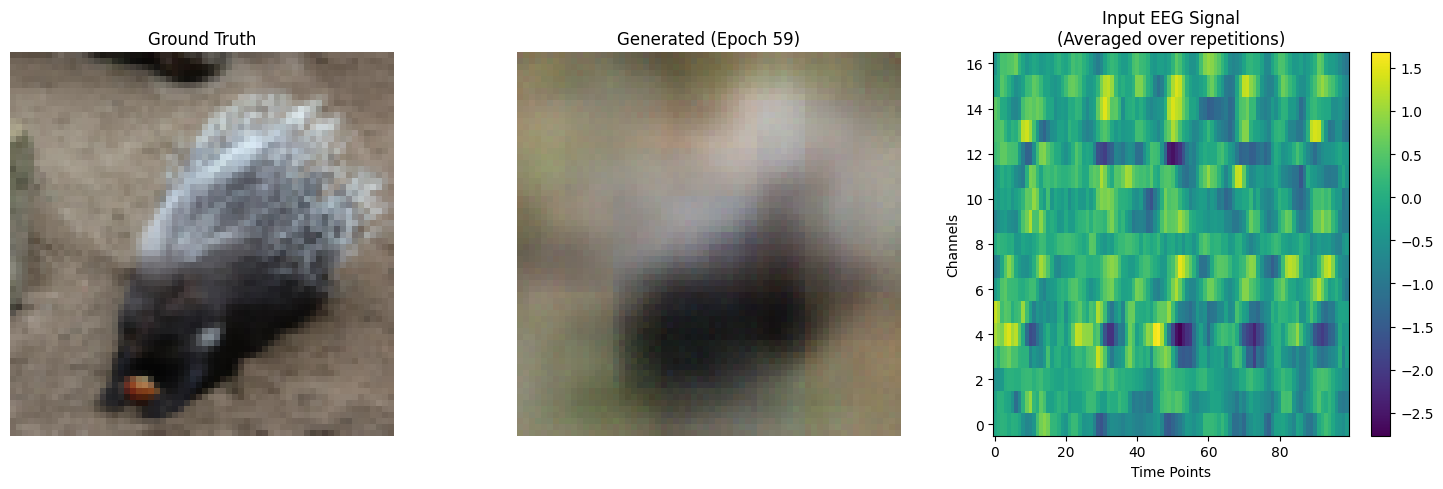

Epoch [60/100] Batch [0/517] D Loss: 0.0001 G Loss: 2038.0790 (Adv: 18.1530, Rec: 0.2020)
Epoch [60/100] Batch [100/517] D Loss: 0.0007 G Loss: 2251.6956 (Adv: 15.5225, Rec: 0.2236)
Epoch [60/100] Batch [200/517] D Loss: 0.0015 G Loss: 2114.2791 (Adv: 19.2452, Rec: 0.2095)
Epoch [60/100] Batch [300/517] D Loss: 0.0003 G Loss: 2074.3862 (Adv: 17.9174, Rec: 0.2056)
Epoch [60/100] Batch [400/517] D Loss: 0.0001 G Loss: 2136.3401 (Adv: 20.3772, Rec: 0.2116)
Epoch [60/100] Batch [500/517] D Loss: 8.1953 G Loss: 1962.8217 (Adv: 7.3828, Rec: 0.1955)


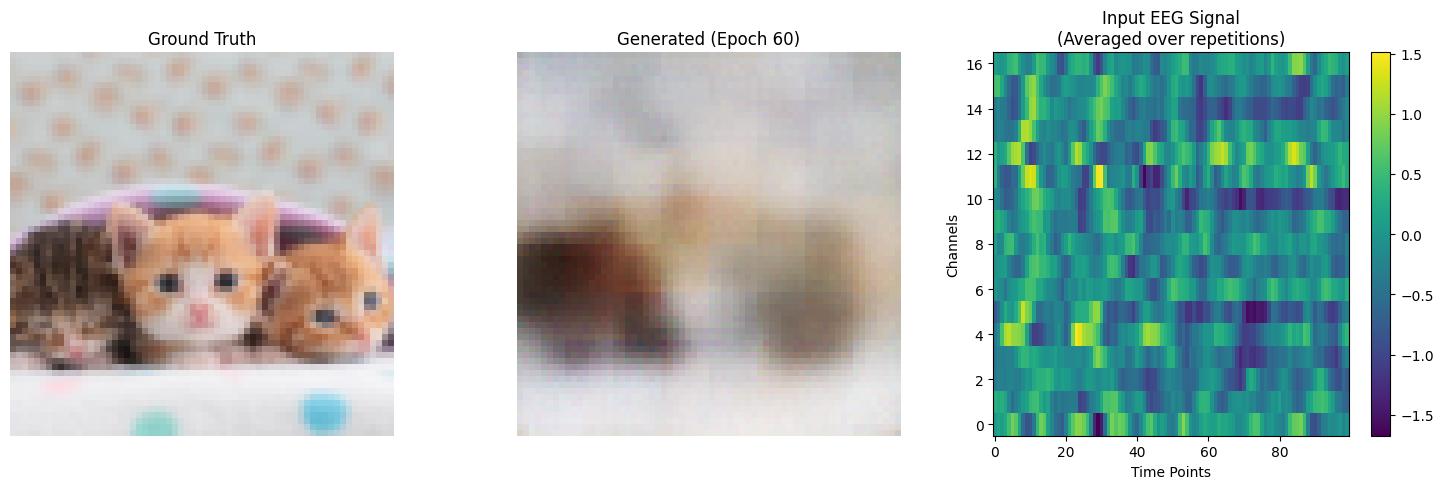

Epoch [61/100] Batch [0/517] D Loss: 0.2479 G Loss: 2133.2595 (Adv: 12.2236, Rec: 0.2121)
Epoch [61/100] Batch [100/517] D Loss: 0.0315 G Loss: 2037.0741 (Adv: 13.2808, Rec: 0.2024)
Epoch [61/100] Batch [200/517] D Loss: 0.0568 G Loss: 1926.5956 (Adv: 14.8639, Rec: 0.1912)
Epoch [61/100] Batch [300/517] D Loss: 0.0669 G Loss: 2071.9951 (Adv: 13.5200, Rec: 0.2058)
Epoch [61/100] Batch [400/517] D Loss: 0.0153 G Loss: 2116.0293 (Adv: 13.6085, Rec: 0.2102)
Epoch [61/100] Batch [500/517] D Loss: 0.0293 G Loss: 2304.9875 (Adv: 13.8666, Rec: 0.2291)


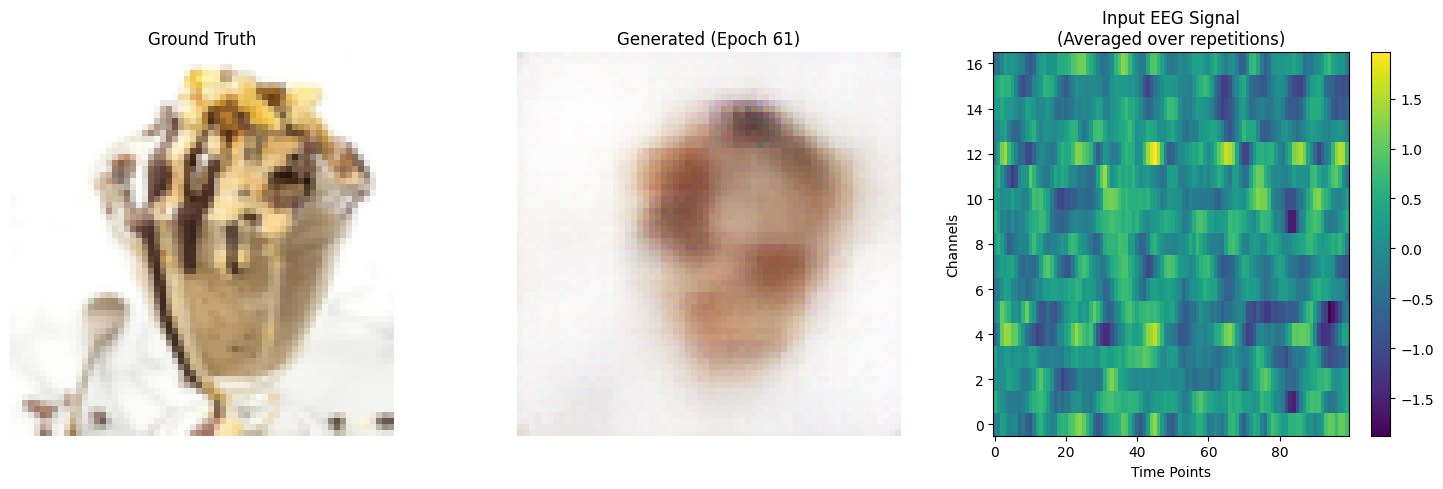

Epoch [62/100] Batch [0/517] D Loss: 0.4046 G Loss: 2046.8529 (Adv: 10.9164, Rec: 0.2036)
Epoch [62/100] Batch [100/517] D Loss: 0.0411 G Loss: 2090.2046 (Adv: 17.2412, Rec: 0.2073)
Epoch [62/100] Batch [200/517] D Loss: 0.0150 G Loss: 2070.0994 (Adv: 14.2973, Rec: 0.2056)
Epoch [62/100] Batch [300/517] D Loss: 0.0182 G Loss: 1979.9385 (Adv: 14.6535, Rec: 0.1965)
Epoch [62/100] Batch [400/517] D Loss: 0.0232 G Loss: 1983.6829 (Adv: 15.6164, Rec: 0.1968)
Epoch [62/100] Batch [500/517] D Loss: 0.0269 G Loss: 1915.1318 (Adv: 13.3038, Rec: 0.1902)


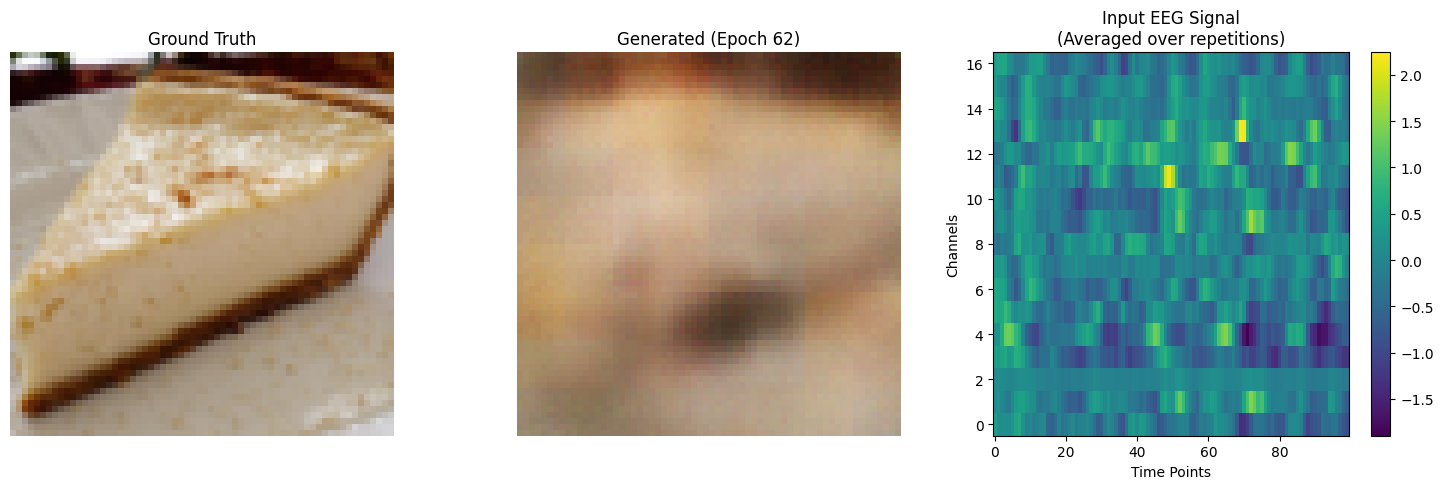

Epoch [63/100] Batch [0/517] D Loss: 0.0071 G Loss: 2114.8486 (Adv: 14.3691, Rec: 0.2100)
Epoch [63/100] Batch [100/517] D Loss: 0.0152 G Loss: 2106.3342 (Adv: 13.1384, Rec: 0.2093)
Epoch [63/100] Batch [200/517] D Loss: 0.0092 G Loss: 2009.5162 (Adv: 13.3216, Rec: 0.1996)
Epoch [63/100] Batch [300/517] D Loss: 0.0653 G Loss: 2011.1121 (Adv: 11.3006, Rec: 0.2000)
Epoch [63/100] Batch [400/517] D Loss: 0.0138 G Loss: 2015.3899 (Adv: 12.7495, Rec: 0.2003)
Epoch [63/100] Batch [500/517] D Loss: 0.0006 G Loss: 2105.6504 (Adv: 17.5417, Rec: 0.2088)


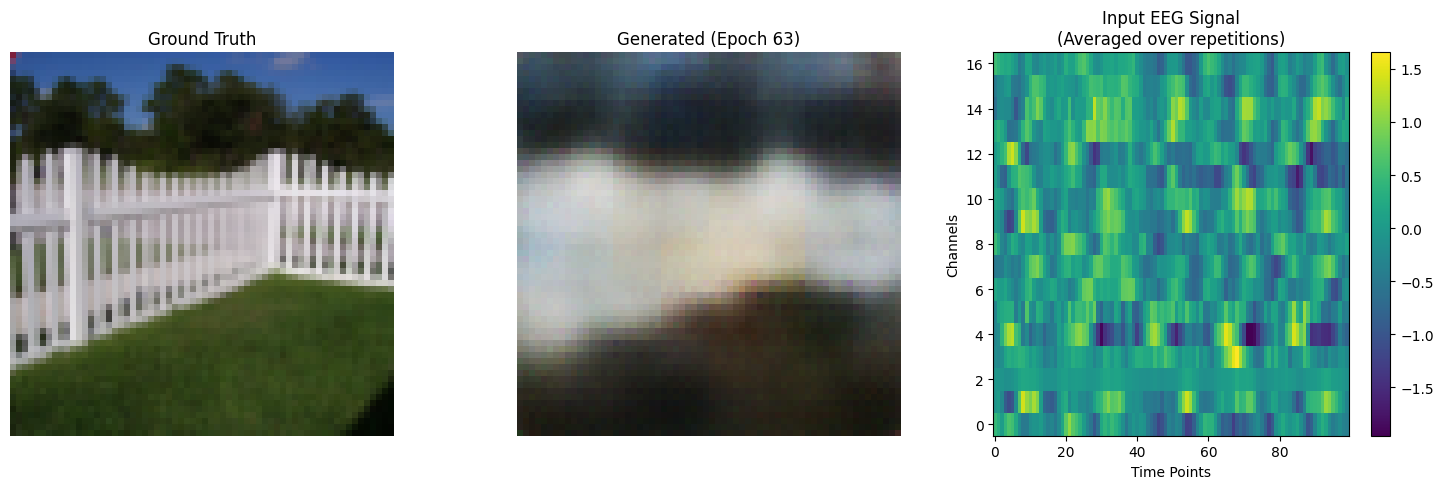

Epoch [64/100] Batch [0/517] D Loss: 0.0091 G Loss: 1976.5560 (Adv: 14.9321, Rec: 0.1962)
Epoch [64/100] Batch [100/517] D Loss: 0.0219 G Loss: 1979.9641 (Adv: 11.8755, Rec: 0.1968)
Epoch [64/100] Batch [200/517] D Loss: 0.0167 G Loss: 2033.6064 (Adv: 12.3874, Rec: 0.2021)
Epoch [64/100] Batch [300/517] D Loss: 0.0057 G Loss: 2231.5183 (Adv: 13.3815, Rec: 0.2218)
Epoch [64/100] Batch [400/517] D Loss: 0.0019 G Loss: 1959.2007 (Adv: 14.2826, Rec: 0.1945)
Epoch [64/100] Batch [500/517] D Loss: 0.0046 G Loss: 2118.4890 (Adv: 16.9714, Rec: 0.2102)


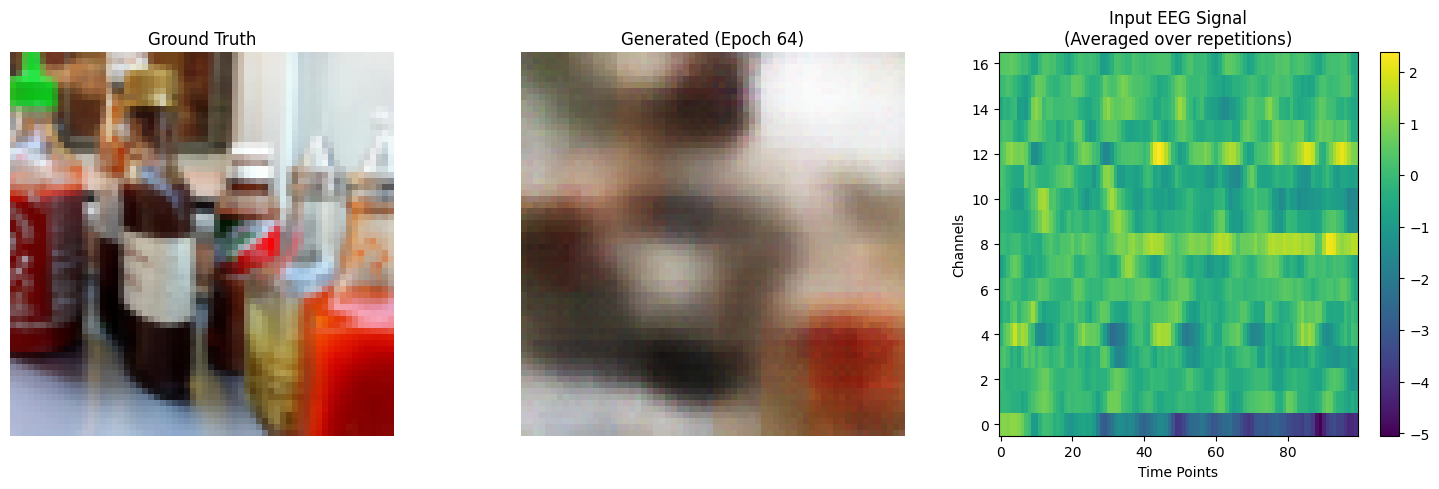

Epoch [65/100] Batch [0/517] D Loss: 0.0240 G Loss: 1985.7875 (Adv: 12.1675, Rec: 0.1974)
Epoch [65/100] Batch [100/517] D Loss: 0.0421 G Loss: 2275.0679 (Adv: 11.0819, Rec: 0.2264)
Epoch [65/100] Batch [200/517] D Loss: 0.0076 G Loss: 2137.3196 (Adv: 13.2332, Rec: 0.2124)
Epoch [65/100] Batch [300/517] D Loss: 0.1753 G Loss: 1923.7888 (Adv: 15.9907, Rec: 0.1908)
Epoch [65/100] Batch [400/517] D Loss: 0.0080 G Loss: 1880.0436 (Adv: 14.6569, Rec: 0.1865)
Epoch [65/100] Batch [500/517] D Loss: 0.0027 G Loss: 1953.3837 (Adv: 15.6208, Rec: 0.1938)


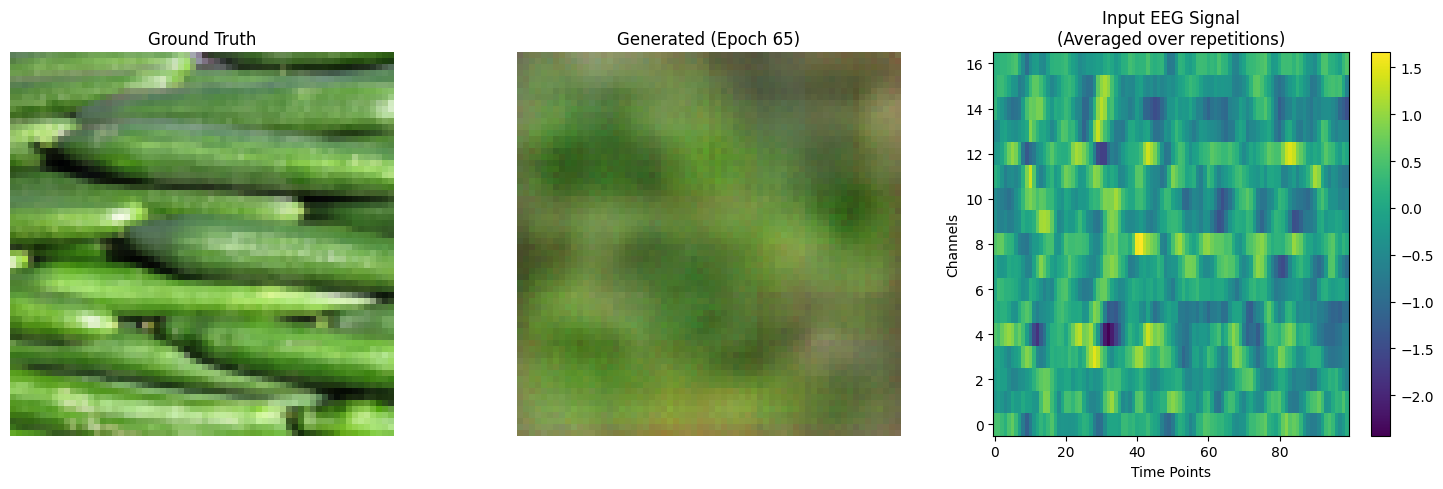

Epoch [66/100] Batch [0/517] D Loss: 0.0019 G Loss: 2237.0620 (Adv: 16.6959, Rec: 0.2220)
Epoch [66/100] Batch [100/517] D Loss: 0.0030 G Loss: 2363.9397 (Adv: 14.4395, Rec: 0.2350)
Epoch [66/100] Batch [200/517] D Loss: 0.0006 G Loss: 2229.6421 (Adv: 15.4824, Rec: 0.2214)
Epoch [66/100] Batch [300/517] D Loss: 0.0037 G Loss: 1947.4036 (Adv: 13.6682, Rec: 0.1934)
Epoch [66/100] Batch [400/517] D Loss: 0.0010 G Loss: 2039.9250 (Adv: 17.0861, Rec: 0.2023)
Epoch [66/100] Batch [500/517] D Loss: 0.0039 G Loss: 2022.8555 (Adv: 14.4408, Rec: 0.2008)


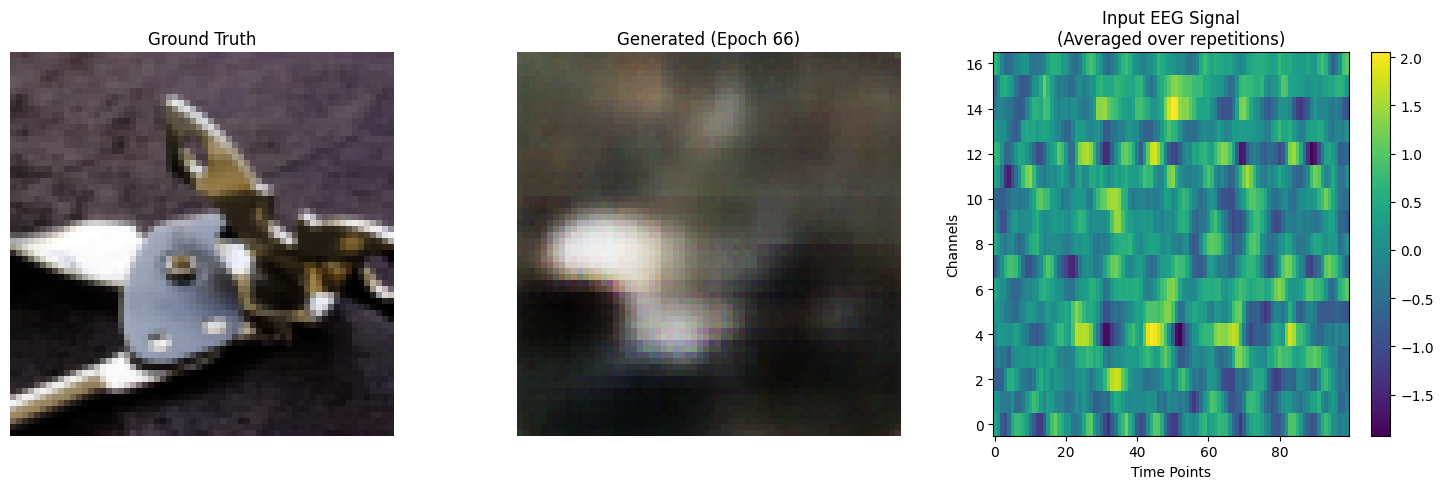

Epoch [67/100] Batch [0/517] D Loss: 0.0003 G Loss: 2186.2590 (Adv: 16.6722, Rec: 0.2170)
Epoch [67/100] Batch [100/517] D Loss: 0.0016 G Loss: 2176.7888 (Adv: 15.5257, Rec: 0.2161)
Epoch [67/100] Batch [200/517] D Loss: 0.0150 G Loss: 2212.3584 (Adv: 12.6306, Rec: 0.2200)
Epoch [67/100] Batch [300/517] D Loss: 0.0013 G Loss: 2049.2573 (Adv: 15.2877, Rec: 0.2034)
Epoch [67/100] Batch [400/517] D Loss: 0.0008 G Loss: 2150.4890 (Adv: 15.1008, Rec: 0.2135)
Epoch [67/100] Batch [500/517] D Loss: 0.0005 G Loss: 2107.7556 (Adv: 17.5800, Rec: 0.2090)


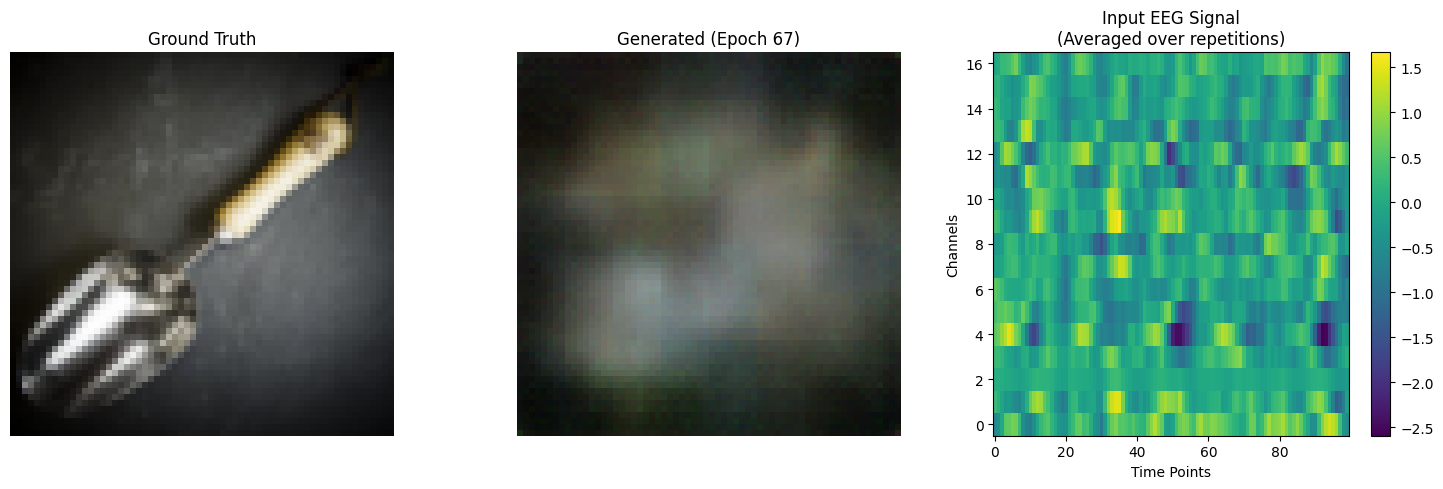

Epoch [68/100] Batch [0/517] D Loss: 0.0006 G Loss: 2159.3943 (Adv: 16.2910, Rec: 0.2143)
Epoch [68/100] Batch [100/517] D Loss: 0.0034 G Loss: 2174.5012 (Adv: 13.9712, Rec: 0.2161)
Epoch [68/100] Batch [200/517] D Loss: 0.0011 G Loss: 2047.8021 (Adv: 15.2744, Rec: 0.2033)
Epoch [68/100] Batch [300/517] D Loss: 0.0008 G Loss: 1910.2208 (Adv: 16.7012, Rec: 0.1894)
Epoch [68/100] Batch [400/517] D Loss: 0.0017 G Loss: 2004.9215 (Adv: 15.7330, Rec: 0.1989)
Epoch [68/100] Batch [500/517] D Loss: 0.0004 G Loss: 2096.0823 (Adv: 16.3076, Rec: 0.2080)


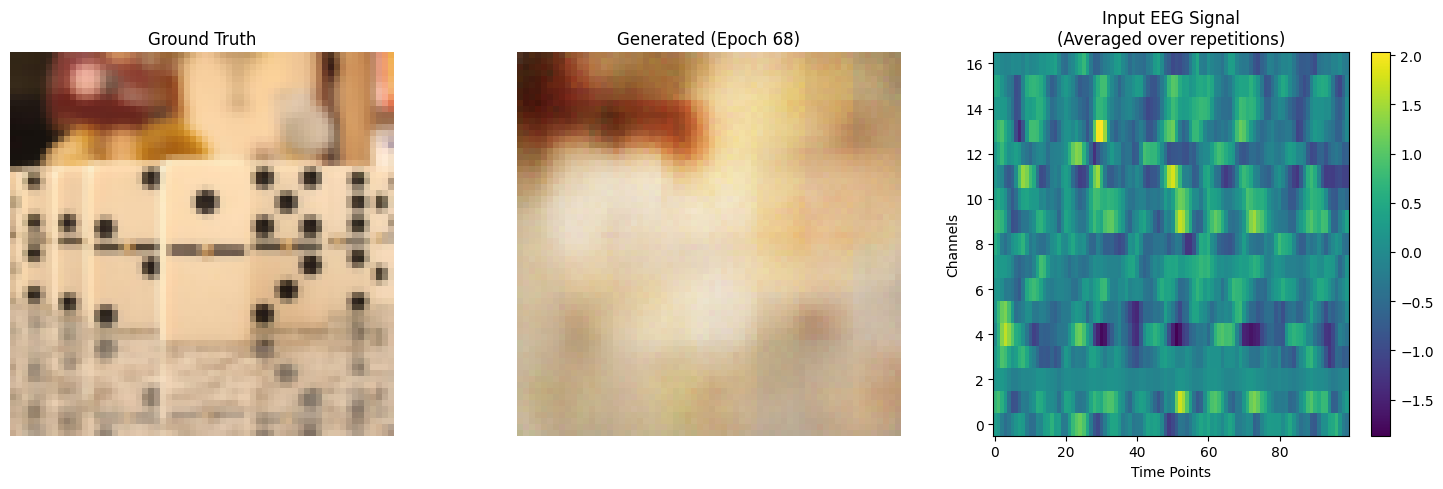

Epoch [69/100] Batch [0/517] D Loss: 0.0003 G Loss: 2050.1155 (Adv: 17.4003, Rec: 0.2033)
Epoch [69/100] Batch [100/517] D Loss: 0.0070 G Loss: 2052.8882 (Adv: 12.5397, Rec: 0.2040)
Epoch [69/100] Batch [200/517] D Loss: 0.0015 G Loss: 2076.7095 (Adv: 14.9720, Rec: 0.2062)
Epoch [69/100] Batch [300/517] D Loss: 0.0012 G Loss: 2007.4006 (Adv: 16.2780, Rec: 0.1991)
Epoch [69/100] Batch [400/517] D Loss: 0.0032 G Loss: 2329.2839 (Adv: 13.4057, Rec: 0.2316)
Epoch [69/100] Batch [500/517] D Loss: 0.0032 G Loss: 1794.6945 (Adv: 18.7899, Rec: 0.1776)


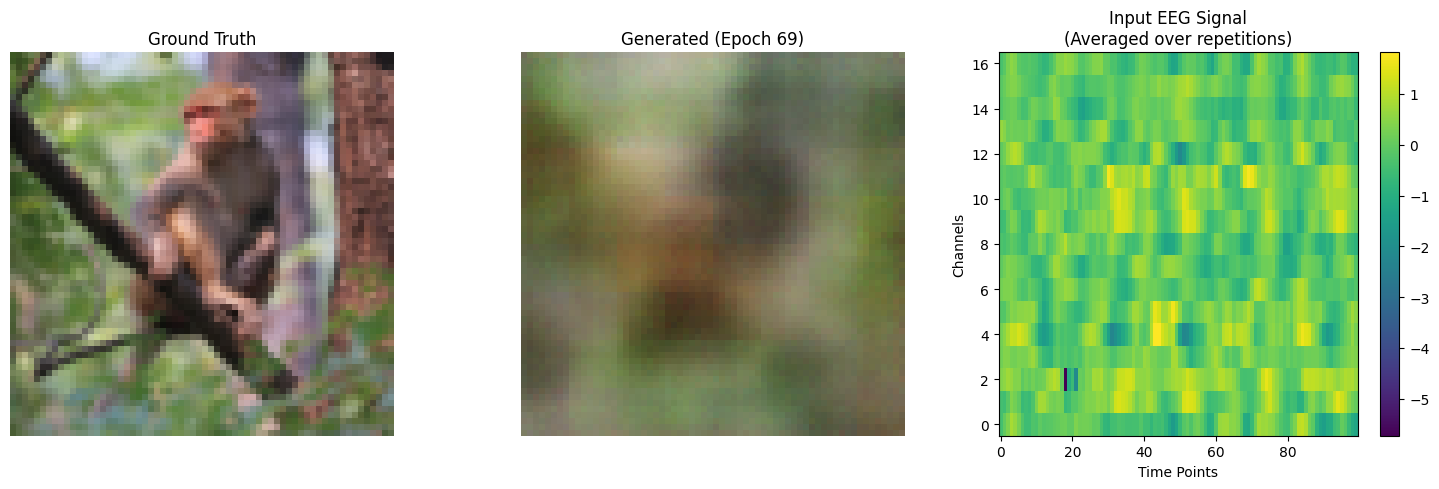

Epoch [70/100] Batch [0/517] D Loss: 0.0008 G Loss: 1974.3177 (Adv: 15.6646, Rec: 0.1959)
Epoch [70/100] Batch [100/517] D Loss: 0.0002 G Loss: 2264.4097 (Adv: 16.0549, Rec: 0.2248)
Epoch [70/100] Batch [200/517] D Loss: 0.0024 G Loss: 2031.2134 (Adv: 14.0046, Rec: 0.2017)
Epoch [70/100] Batch [300/517] D Loss: 0.0008 G Loss: 2078.2200 (Adv: 16.9410, Rec: 0.2061)
Epoch [70/100] Batch [400/517] D Loss: 0.0027 G Loss: 1865.7727 (Adv: 17.7552, Rec: 0.1848)
Epoch [70/100] Batch [500/517] D Loss: 0.0010 G Loss: 2098.8325 (Adv: 18.1903, Rec: 0.2081)


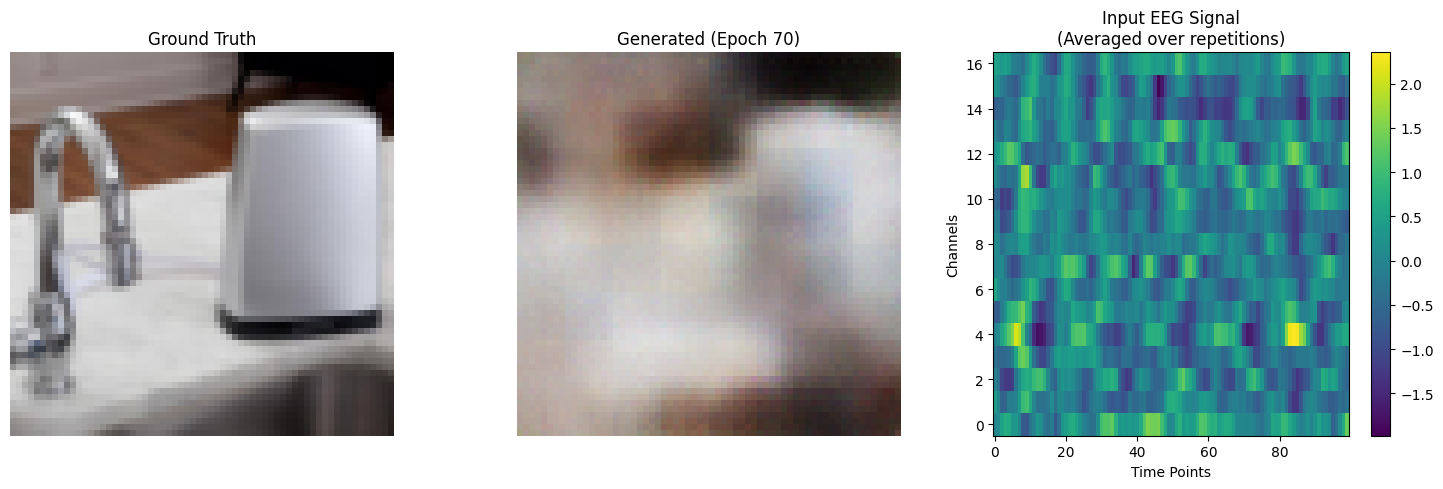

Epoch [71/100] Batch [0/517] D Loss: 0.0023 G Loss: 2117.3333 (Adv: 15.3078, Rec: 0.2102)
Epoch [71/100] Batch [100/517] D Loss: 0.0002 G Loss: 2056.8850 (Adv: 16.9288, Rec: 0.2040)
Epoch [71/100] Batch [200/517] D Loss: 0.0006 G Loss: 1979.1863 (Adv: 17.4886, Rec: 0.1962)
Epoch [71/100] Batch [300/517] D Loss: 0.0012 G Loss: 2025.7775 (Adv: 16.7650, Rec: 0.2009)
Epoch [71/100] Batch [400/517] D Loss: 0.0002 G Loss: 2161.0681 (Adv: 21.8052, Rec: 0.2139)
Epoch [71/100] Batch [500/517] D Loss: 0.0003 G Loss: 1942.0604 (Adv: 16.9008, Rec: 0.1925)


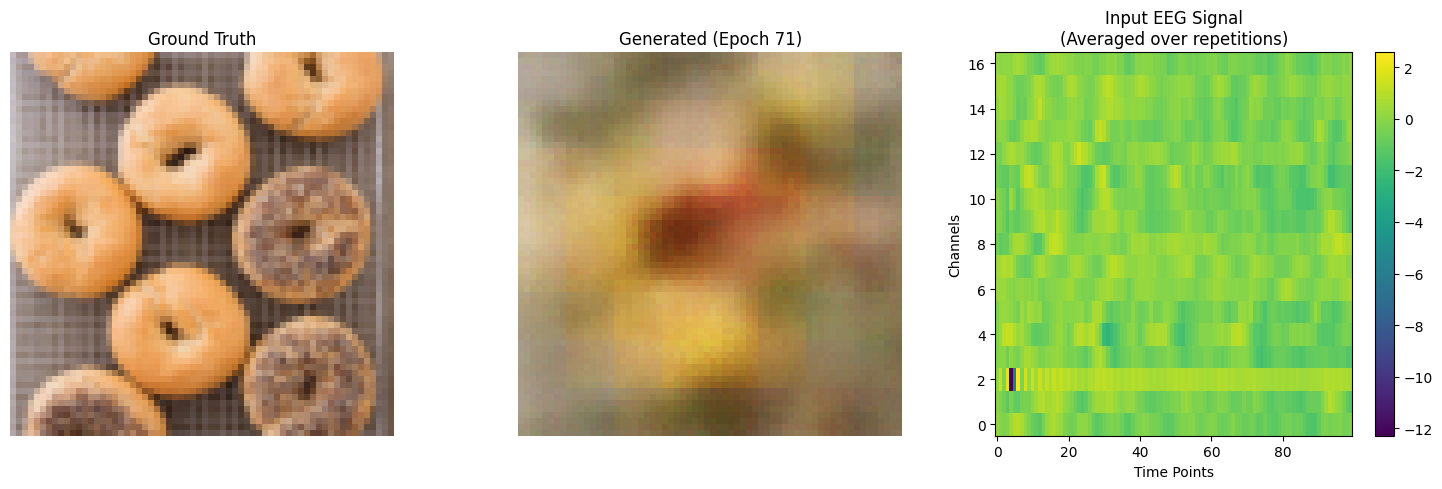

Epoch [72/100] Batch [0/517] D Loss: 0.0013 G Loss: 1881.2319 (Adv: 20.3262, Rec: 0.1861)
Epoch [72/100] Batch [100/517] D Loss: 0.0004 G Loss: 1989.9971 (Adv: 15.9451, Rec: 0.1974)
Epoch [72/100] Batch [200/517] D Loss: 0.0000 G Loss: 2094.8108 (Adv: 21.1040, Rec: 0.2074)
Epoch [72/100] Batch [300/517] D Loss: 0.0006 G Loss: 2148.3318 (Adv: 15.3551, Rec: 0.2133)
Epoch [72/100] Batch [400/517] D Loss: 0.0004 G Loss: 2026.3298 (Adv: 16.2015, Rec: 0.2010)
Epoch [72/100] Batch [500/517] D Loss: 0.0003 G Loss: 2011.7319 (Adv: 18.4445, Rec: 0.1993)


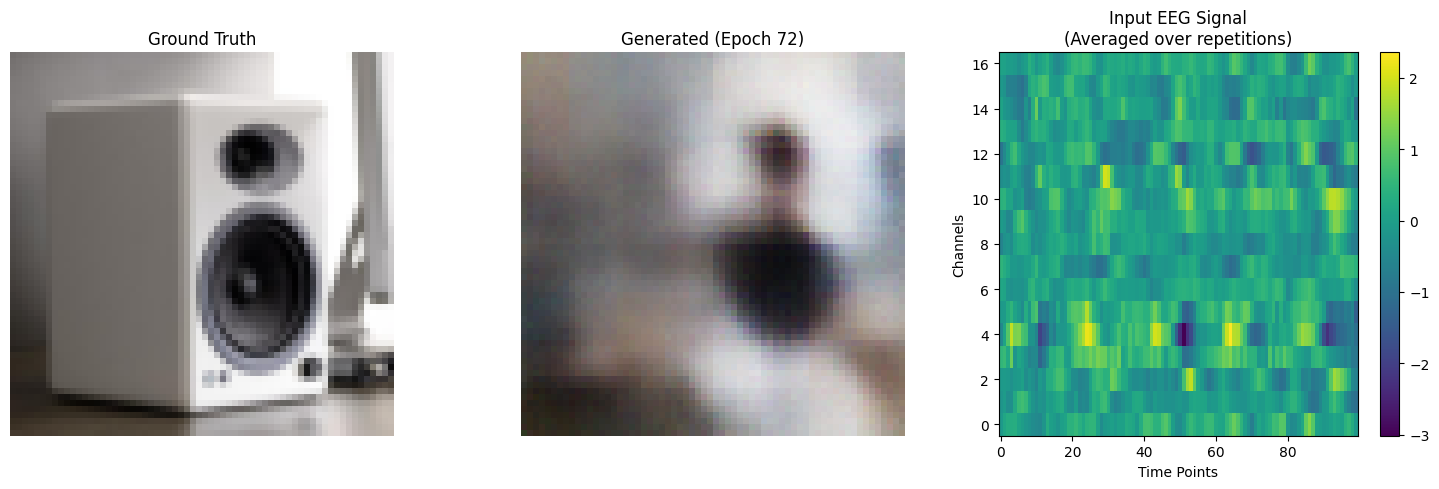

Epoch [73/100] Batch [0/517] D Loss: 0.0001 G Loss: 2031.9032 (Adv: 19.3533, Rec: 0.2013)
Epoch [73/100] Batch [100/517] D Loss: 0.0029 G Loss: 1850.5281 (Adv: 17.1811, Rec: 0.1833)
Epoch [73/100] Batch [200/517] D Loss: 0.0000 G Loss: 2182.6736 (Adv: 21.3181, Rec: 0.2161)
Epoch [73/100] Batch [300/517] D Loss: 0.0002 G Loss: 1963.9392 (Adv: 16.9745, Rec: 0.1947)
Epoch [73/100] Batch [400/517] D Loss: 0.0000 G Loss: 2070.1135 (Adv: 18.7000, Rec: 0.2051)
Epoch [73/100] Batch [500/517] D Loss: 0.0001 G Loss: 2155.0496 (Adv: 18.4977, Rec: 0.2137)


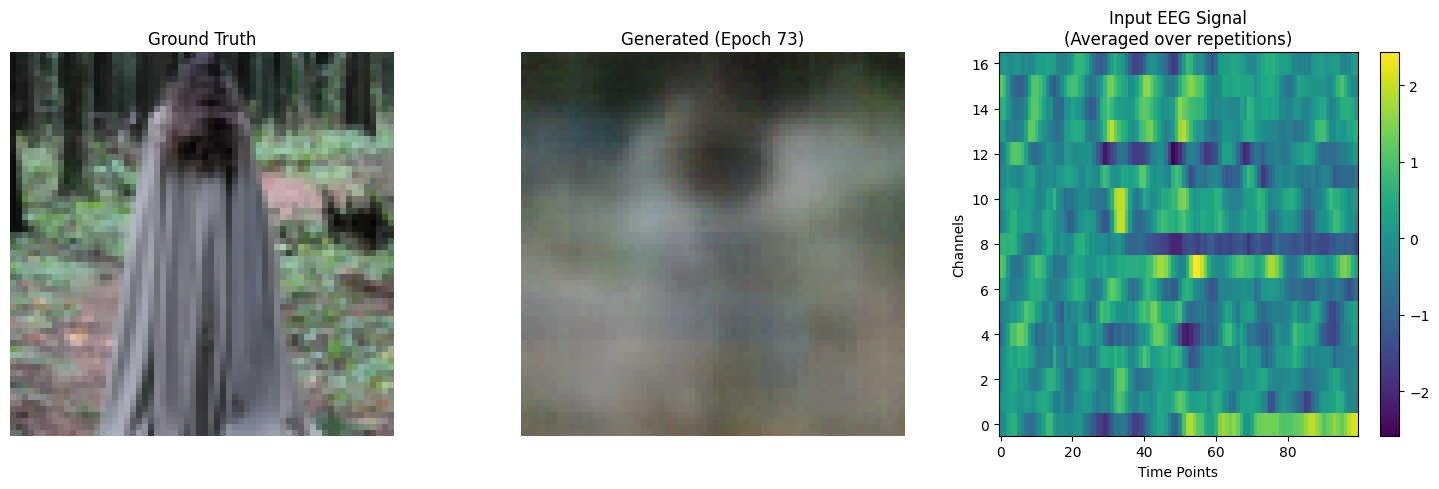

Epoch [74/100] Batch [0/517] D Loss: 0.0073 G Loss: 1872.4756 (Adv: 15.2306, Rec: 0.1857)
Epoch [74/100] Batch [100/517] D Loss: 0.0000 G Loss: 2214.9126 (Adv: 18.9193, Rec: 0.2196)
Epoch [74/100] Batch [200/517] D Loss: 0.0001 G Loss: 1856.0492 (Adv: 19.2303, Rec: 0.1837)
Epoch [74/100] Batch [300/517] D Loss: 0.0000 G Loss: 2082.2952 (Adv: 18.9879, Rec: 0.2063)
Epoch [74/100] Batch [400/517] D Loss: 0.0003 G Loss: 2131.2810 (Adv: 16.4327, Rec: 0.2115)
Epoch [74/100] Batch [500/517] D Loss: 0.0030 G Loss: 1874.3018 (Adv: 21.8538, Rec: 0.1852)


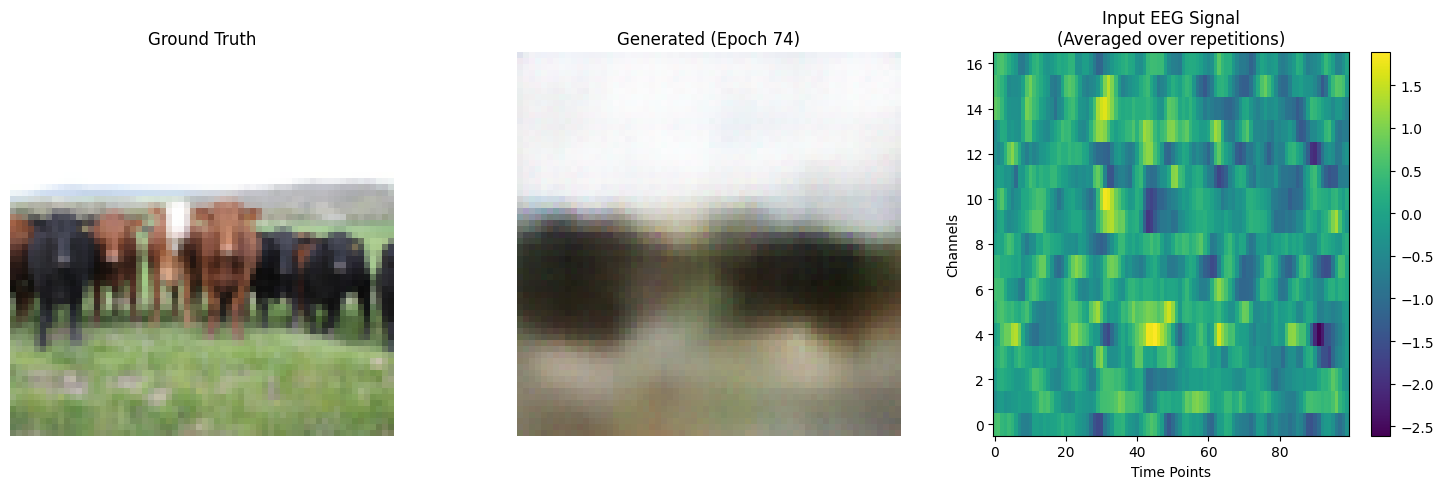

Epoch [75/100] Batch [0/517] D Loss: 0.0000 G Loss: 2010.0061 (Adv: 19.7462, Rec: 0.1990)
Epoch [75/100] Batch [100/517] D Loss: 0.0001 G Loss: 2158.2632 (Adv: 17.9812, Rec: 0.2140)
Epoch [75/100] Batch [200/517] D Loss: 0.0000 G Loss: 2129.6438 (Adv: 20.1629, Rec: 0.2109)
Epoch [75/100] Batch [300/517] D Loss: 0.0000 G Loss: 2080.0913 (Adv: 18.8203, Rec: 0.2061)
Epoch [75/100] Batch [400/517] D Loss: 0.0000 G Loss: 2033.9033 (Adv: 19.0667, Rec: 0.2015)
Epoch [75/100] Batch [500/517] D Loss: 0.0001 G Loss: 2056.5510 (Adv: 17.5589, Rec: 0.2039)


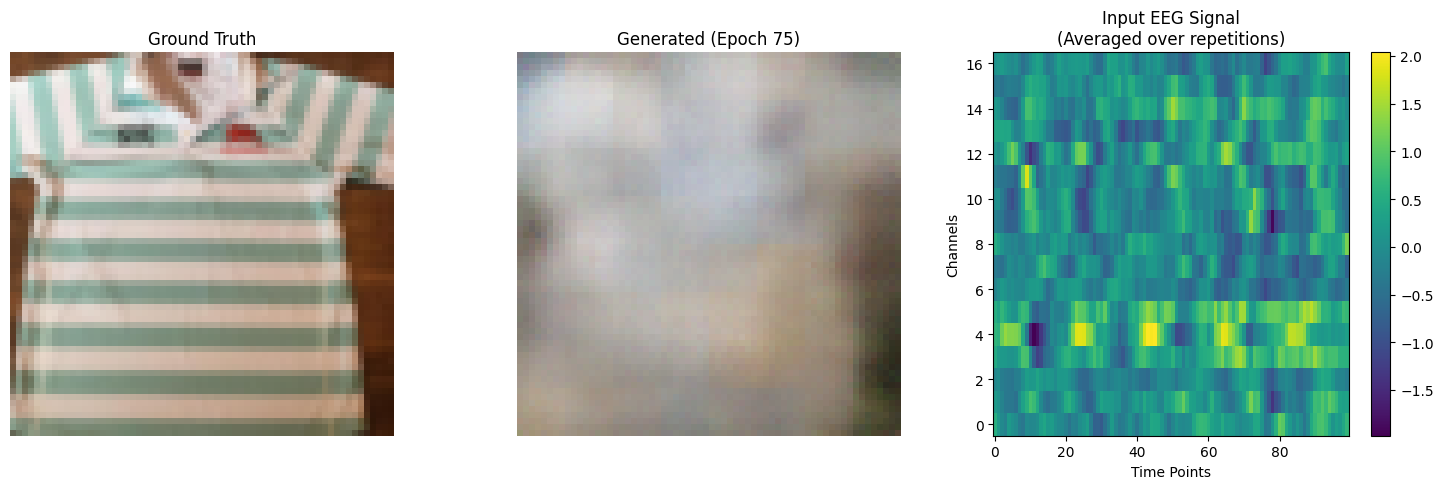

Epoch [76/100] Batch [0/517] D Loss: 0.0004 G Loss: 2091.1885 (Adv: 16.3190, Rec: 0.2075)
Epoch [76/100] Batch [100/517] D Loss: 0.0000 G Loss: 1990.6669 (Adv: 20.2716, Rec: 0.1970)
Epoch [76/100] Batch [200/517] D Loss: 0.0009 G Loss: 2157.4119 (Adv: 21.4063, Rec: 0.2136)
Epoch [76/100] Batch [300/517] D Loss: 0.0001 G Loss: 2215.7478 (Adv: 17.7485, Rec: 0.2198)
Epoch [76/100] Batch [400/517] D Loss: 0.0000 G Loss: 2153.1284 (Adv: 20.0825, Rec: 0.2133)
Epoch [76/100] Batch [500/517] D Loss: 0.0000 G Loss: 2105.3354 (Adv: 20.2322, Rec: 0.2085)


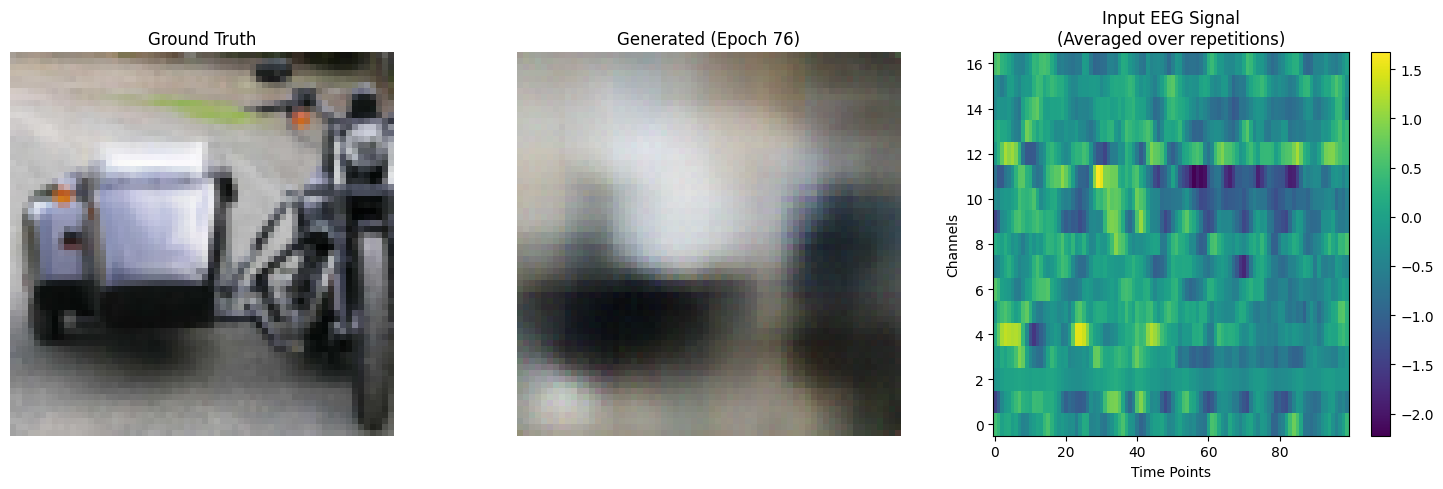

Epoch [77/100] Batch [0/517] D Loss: 0.0000 G Loss: 2190.6970 (Adv: 20.2852, Rec: 0.2170)
Epoch [77/100] Batch [100/517] D Loss: 0.0000 G Loss: 2100.0562 (Adv: 21.1603, Rec: 0.2079)
Epoch [77/100] Batch [200/517] D Loss: 0.0000 G Loss: 2050.0449 (Adv: 19.9076, Rec: 0.2030)
Epoch [77/100] Batch [300/517] D Loss: 0.0001 G Loss: 2022.0776 (Adv: 19.4196, Rec: 0.2003)
Epoch [77/100] Batch [400/517] D Loss: 0.0000 G Loss: 2118.3733 (Adv: 19.3768, Rec: 0.2099)
Epoch [77/100] Batch [500/517] D Loss: 0.0002 G Loss: 1994.8715 (Adv: 17.9409, Rec: 0.1977)


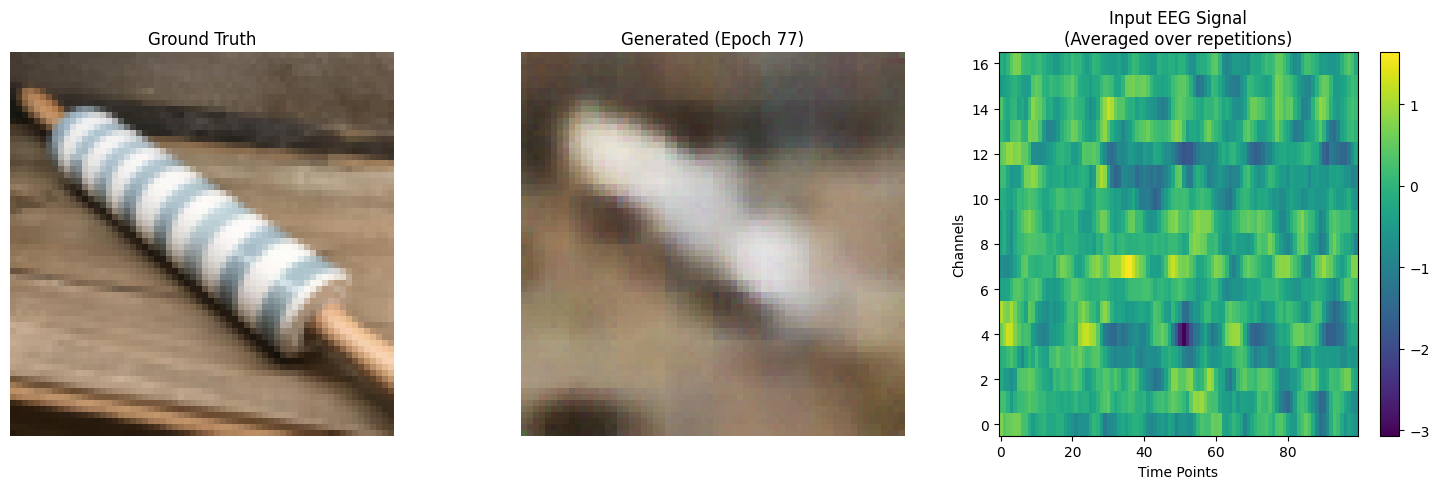

Epoch [78/100] Batch [0/517] D Loss: 0.0000 G Loss: 2088.5486 (Adv: 18.8340, Rec: 0.2070)
Epoch [78/100] Batch [100/517] D Loss: 0.1061 G Loss: 1900.7762 (Adv: 19.1684, Rec: 0.1882)
Epoch [78/100] Batch [200/517] D Loss: 0.0001 G Loss: 1928.0559 (Adv: 17.3259, Rec: 0.1911)
Epoch [78/100] Batch [300/517] D Loss: 0.0000 G Loss: 1976.7048 (Adv: 19.6551, Rec: 0.1957)
Epoch [78/100] Batch [400/517] D Loss: 0.0000 G Loss: 2012.5184 (Adv: 19.9585, Rec: 0.1993)
Epoch [78/100] Batch [500/517] D Loss: 0.0000 G Loss: 2058.9385 (Adv: 21.8725, Rec: 0.2037)


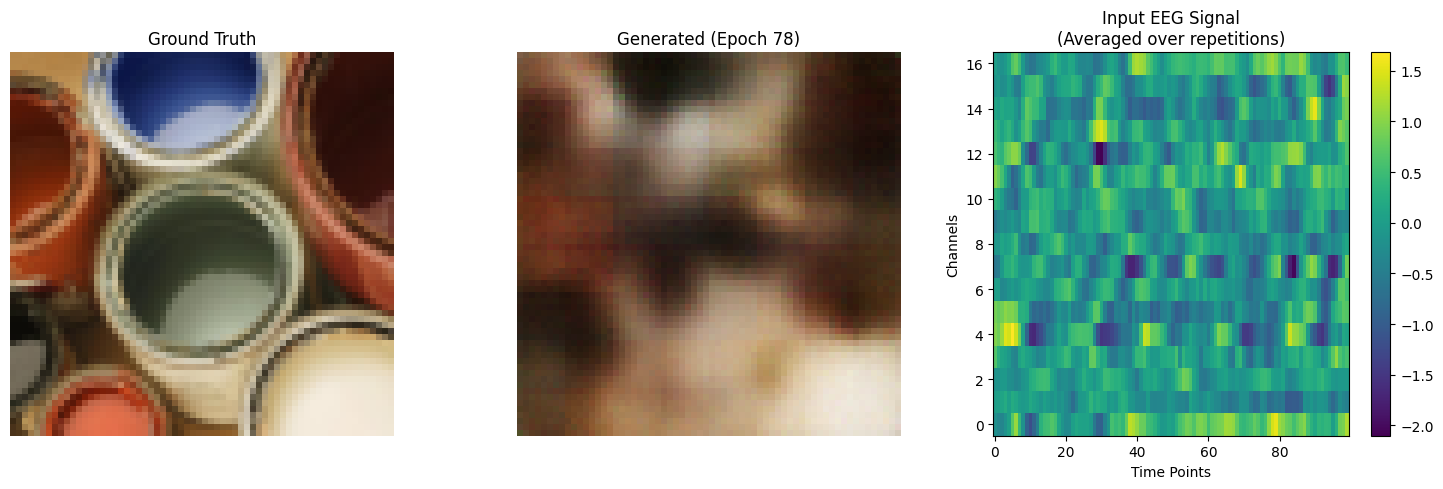

Epoch [79/100] Batch [0/517] D Loss: 0.0002 G Loss: 1871.1102 (Adv: 19.1863, Rec: 0.1852)
Epoch [79/100] Batch [100/517] D Loss: 0.0001 G Loss: 2004.1420 (Adv: 18.2228, Rec: 0.1986)
Epoch [79/100] Batch [200/517] D Loss: 0.0000 G Loss: 2251.7397 (Adv: 19.9735, Rec: 0.2232)
Epoch [79/100] Batch [300/517] D Loss: 0.0000 G Loss: 2090.4148 (Adv: 20.6773, Rec: 0.2070)
Epoch [79/100] Batch [400/517] D Loss: 0.0000 G Loss: 1945.9214 (Adv: 21.6523, Rec: 0.1924)
Epoch [79/100] Batch [500/517] D Loss: 0.0001 G Loss: 2212.1106 (Adv: 18.2831, Rec: 0.2194)


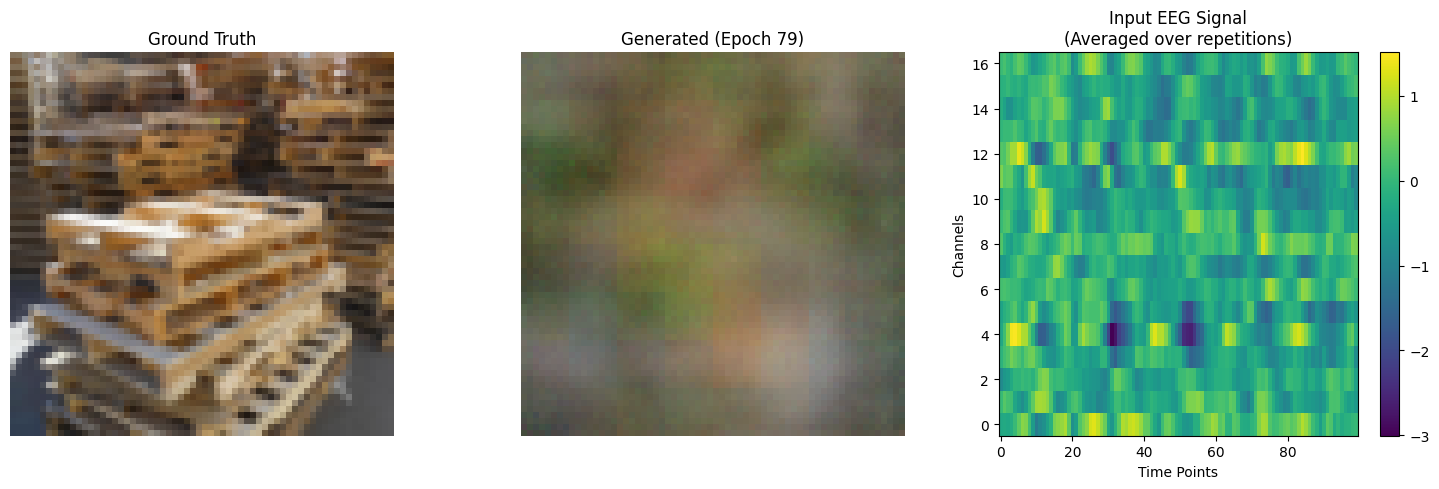

Epoch [80/100] Batch [0/517] D Loss: 0.0000 G Loss: 1963.0922 (Adv: 21.6390, Rec: 0.1941)
Epoch [80/100] Batch [100/517] D Loss: 0.0000 G Loss: 2021.2556 (Adv: 22.1356, Rec: 0.1999)
Epoch [80/100] Batch [200/517] D Loss: 0.0001 G Loss: 1956.9845 (Adv: 22.9032, Rec: 0.1934)
Epoch [80/100] Batch [300/517] D Loss: 0.0000 G Loss: 1969.6680 (Adv: 20.3734, Rec: 0.1949)
Epoch [80/100] Batch [400/517] D Loss: 0.0000 G Loss: 1924.1003 (Adv: 18.7068, Rec: 0.1905)
Epoch [80/100] Batch [500/517] D Loss: 0.0003 G Loss: 2149.2097 (Adv: 16.4835, Rec: 0.2133)


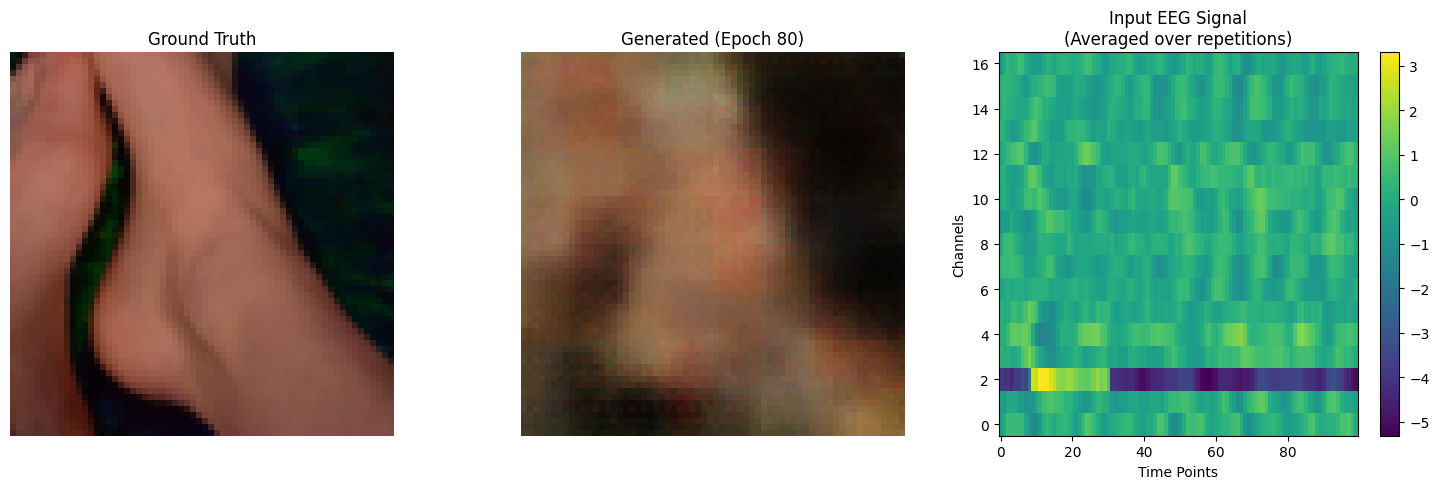

Epoch [81/100] Batch [0/517] D Loss: 0.0000 G Loss: 2002.7711 (Adv: 20.6872, Rec: 0.1982)
Epoch [81/100] Batch [100/517] D Loss: 0.0000 G Loss: 2167.9172 (Adv: 21.3663, Rec: 0.2147)
Epoch [81/100] Batch [200/517] D Loss: 0.0000 G Loss: 2178.4658 (Adv: 18.3146, Rec: 0.2160)
Epoch [81/100] Batch [300/517] D Loss: 0.0000 G Loss: 1977.7725 (Adv: 20.8855, Rec: 0.1957)
Epoch [81/100] Batch [400/517] D Loss: 0.0000 G Loss: 2058.0183 (Adv: 23.6676, Rec: 0.2034)
Epoch [81/100] Batch [500/517] D Loss: 0.0000 G Loss: 2028.6918 (Adv: 23.6962, Rec: 0.2005)


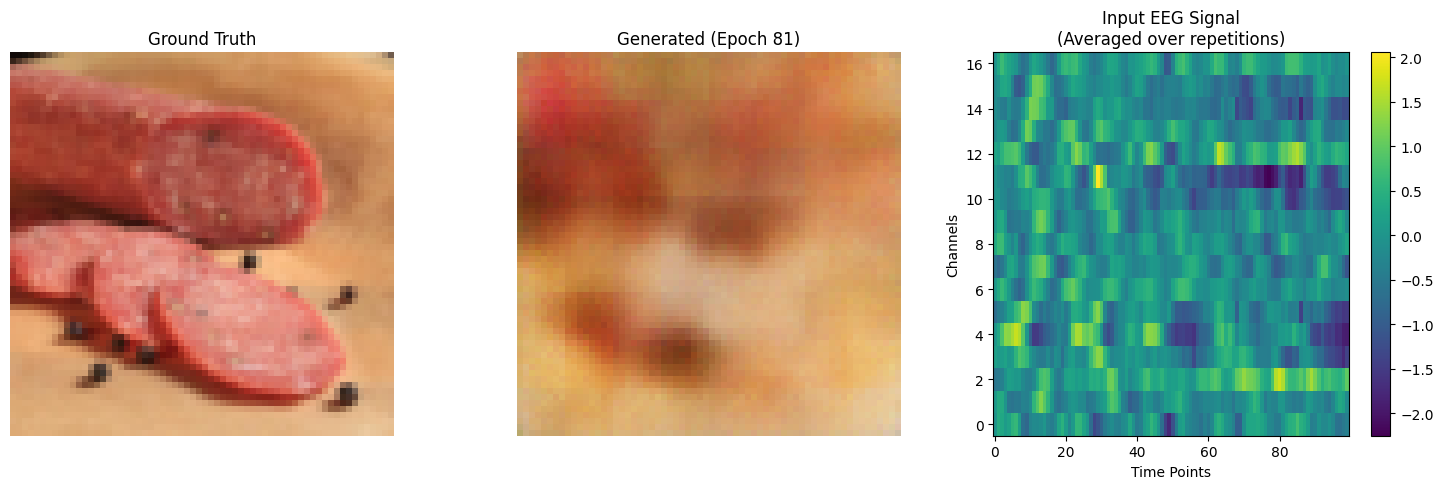

Epoch [82/100] Batch [0/517] D Loss: 0.0000 G Loss: 1817.7109 (Adv: 22.8812, Rec: 0.1795)
Epoch [82/100] Batch [100/517] D Loss: 0.0003 G Loss: 1843.2690 (Adv: 22.8133, Rec: 0.1820)
Epoch [82/100] Batch [200/517] D Loss: 0.0000 G Loss: 2023.6871 (Adv: 22.9292, Rec: 0.2001)
Epoch [82/100] Batch [300/517] D Loss: 0.0000 G Loss: 2087.7061 (Adv: 24.3784, Rec: 0.2063)
Epoch [82/100] Batch [400/517] D Loss: 0.0000 G Loss: 1936.5171 (Adv: 23.1502, Rec: 0.1913)
Epoch [82/100] Batch [500/517] D Loss: 0.0000 G Loss: 2068.8113 (Adv: 23.2564, Rec: 0.2046)


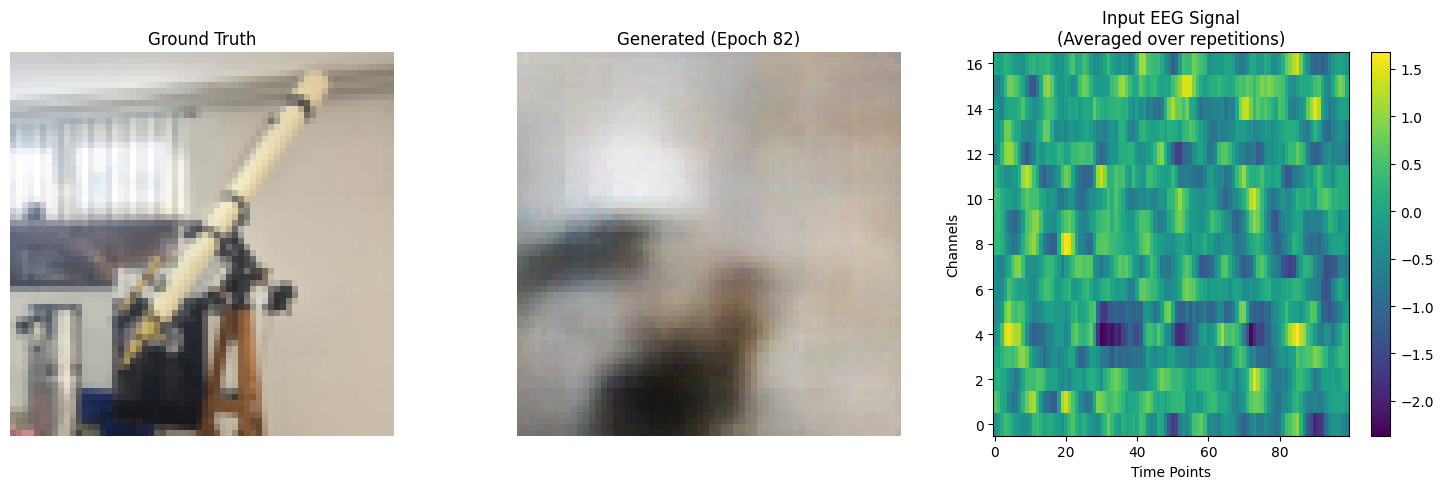

Epoch [83/100] Batch [0/517] D Loss: 0.0000 G Loss: 2008.4252 (Adv: 22.9738, Rec: 0.1985)
Epoch [83/100] Batch [100/517] D Loss: 0.0000 G Loss: 2035.6047 (Adv: 19.0532, Rec: 0.2017)
Epoch [83/100] Batch [200/517] D Loss: 0.0000 G Loss: 2005.5718 (Adv: 21.8786, Rec: 0.1984)
Epoch [83/100] Batch [300/517] D Loss: 0.0000 G Loss: 1970.2753 (Adv: 19.9907, Rec: 0.1950)
Epoch [83/100] Batch [400/517] D Loss: 0.0000 G Loss: 1998.2480 (Adv: 22.1115, Rec: 0.1976)
Epoch [83/100] Batch [500/517] D Loss: 0.0000 G Loss: 1980.8490 (Adv: 21.7919, Rec: 0.1959)


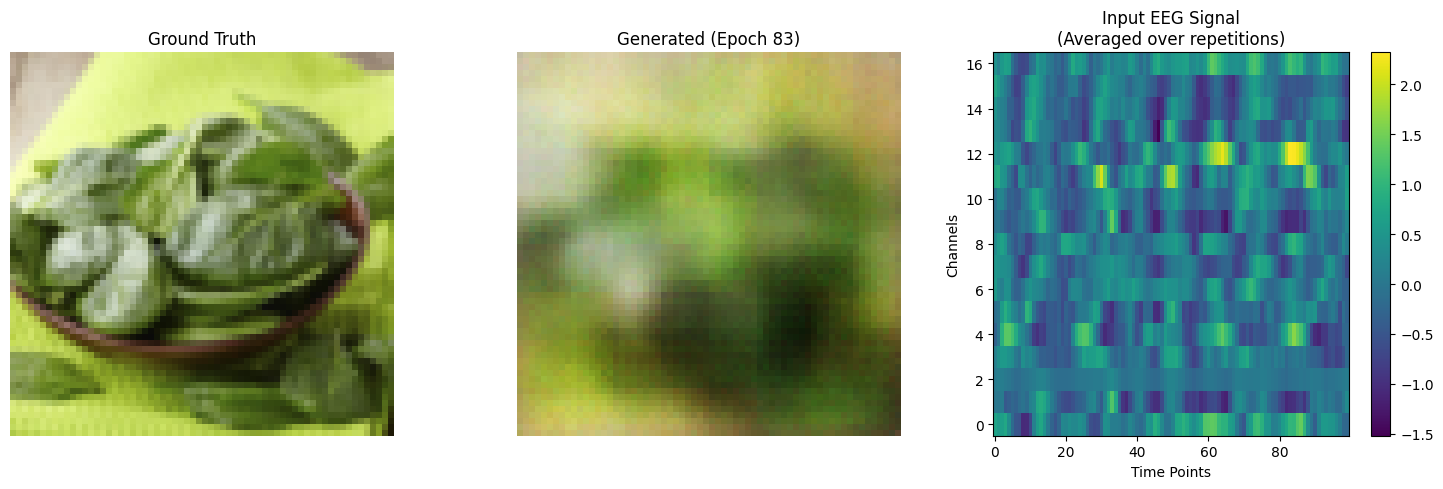

Epoch [84/100] Batch [0/517] D Loss: 0.0000 G Loss: 2111.5610 (Adv: 21.2203, Rec: 0.2090)
Epoch [84/100] Batch [100/517] D Loss: 0.0000 G Loss: 2007.6791 (Adv: 20.5689, Rec: 0.1987)
Epoch [84/100] Batch [200/517] D Loss: 0.0000 G Loss: 1920.2358 (Adv: 21.9232, Rec: 0.1898)
Epoch [84/100] Batch [300/517] D Loss: 0.0000 G Loss: 2130.7803 (Adv: 21.1607, Rec: 0.2110)
Epoch [84/100] Batch [400/517] D Loss: 0.0000 G Loss: 2035.5210 (Adv: 18.4225, Rec: 0.2017)
Epoch [84/100] Batch [500/517] D Loss: 0.0000 G Loss: 1918.2908 (Adv: 23.3991, Rec: 0.1895)


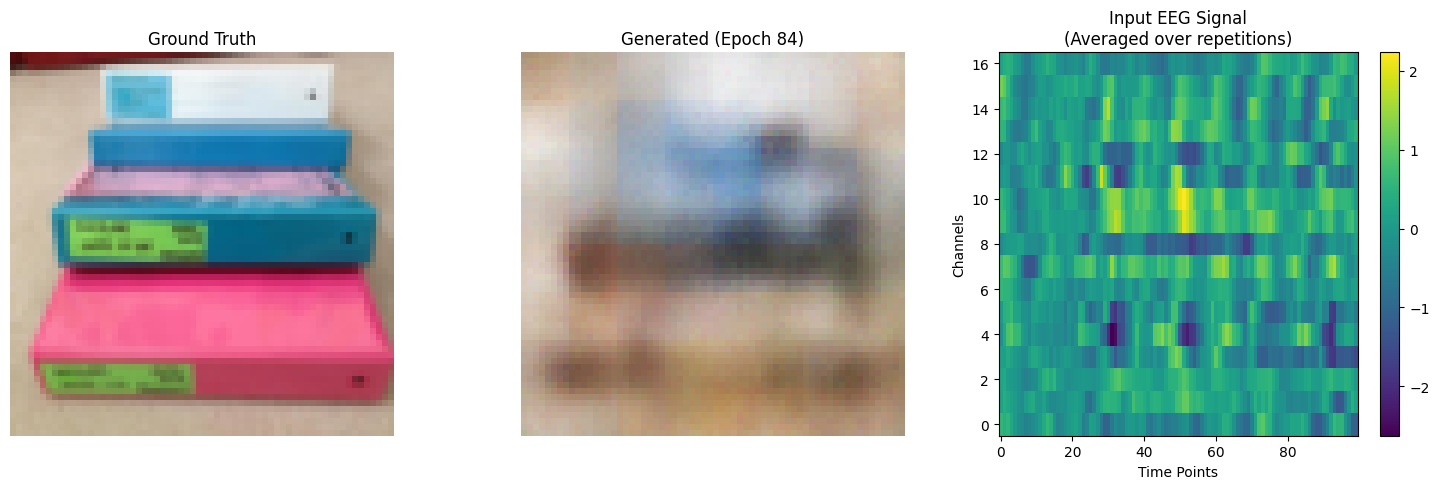

Epoch [85/100] Batch [0/517] D Loss: 0.0000 G Loss: 1931.0928 (Adv: 24.3530, Rec: 0.1907)
Epoch [85/100] Batch [100/517] D Loss: 0.0000 G Loss: 1860.1228 (Adv: 22.2474, Rec: 0.1838)
Epoch [85/100] Batch [200/517] D Loss: 0.0001 G Loss: 1880.1512 (Adv: 24.2774, Rec: 0.1856)
Epoch [85/100] Batch [300/517] D Loss: 0.0000 G Loss: 2044.0493 (Adv: 21.0283, Rec: 0.2023)
Epoch [85/100] Batch [400/517] D Loss: 0.0000 G Loss: 2068.9177 (Adv: 20.8641, Rec: 0.2048)
Epoch [85/100] Batch [500/517] D Loss: 0.0000 G Loss: 1910.4413 (Adv: 22.9649, Rec: 0.1887)


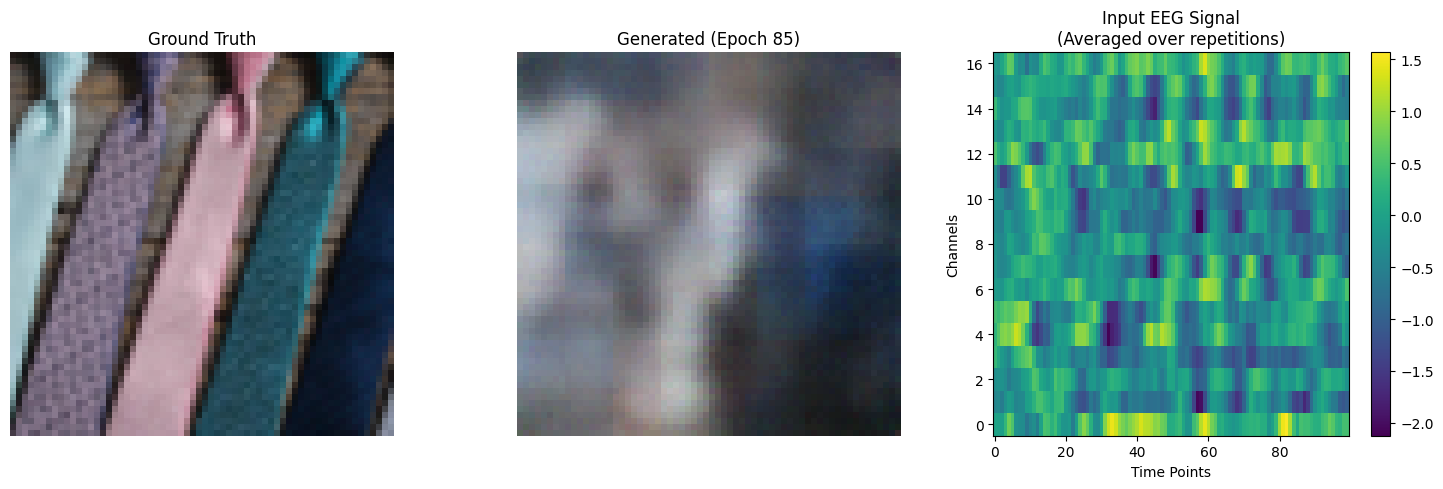

Epoch [86/100] Batch [0/517] D Loss: 0.0000 G Loss: 1939.2782 (Adv: 22.1569, Rec: 0.1917)
Epoch [86/100] Batch [100/517] D Loss: 0.0000 G Loss: 1938.3551 (Adv: 22.0998, Rec: 0.1916)
Epoch [86/100] Batch [200/517] D Loss: 0.0000 G Loss: 1904.9163 (Adv: 22.7181, Rec: 0.1882)
Epoch [86/100] Batch [300/517] D Loss: 0.0000 G Loss: 1838.4446 (Adv: 23.3933, Rec: 0.1815)
Epoch [86/100] Batch [400/517] D Loss: 0.0000 G Loss: 2099.9480 (Adv: 22.9869, Rec: 0.2077)
Epoch [86/100] Batch [500/517] D Loss: 0.0000 G Loss: 1846.1747 (Adv: 21.6279, Rec: 0.1825)


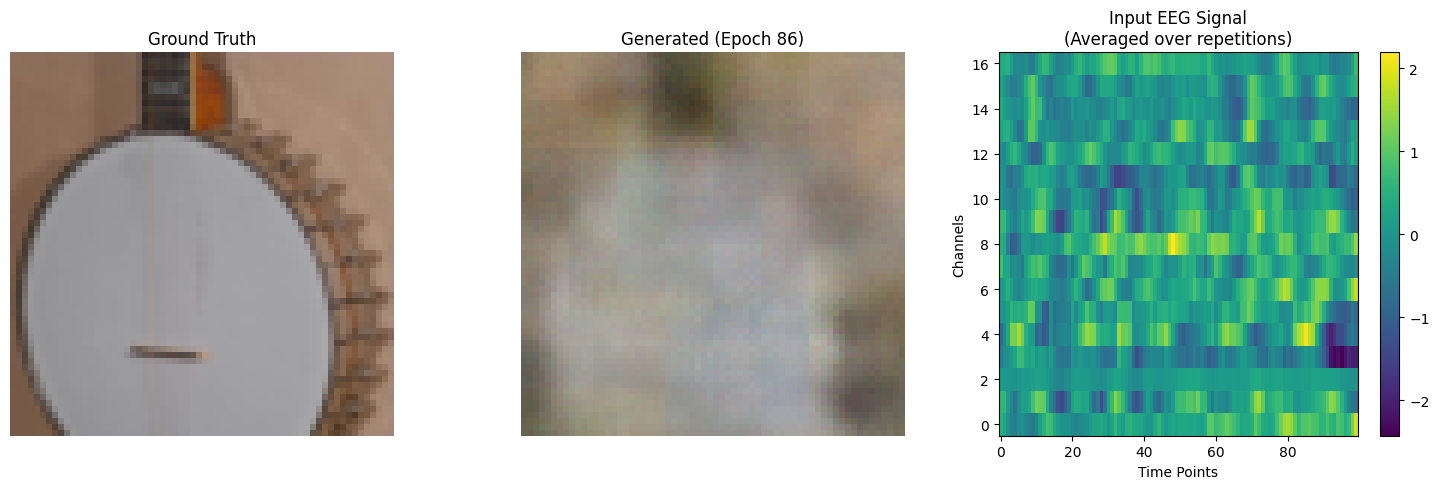

Epoch [87/100] Batch [0/517] D Loss: 0.0000 G Loss: 1951.7560 (Adv: 21.8330, Rec: 0.1930)
Epoch [87/100] Batch [100/517] D Loss: 0.0000 G Loss: 2030.6737 (Adv: 22.2422, Rec: 0.2008)
Epoch [87/100] Batch [200/517] D Loss: 0.0000 G Loss: 1908.8854 (Adv: 22.0786, Rec: 0.1887)
Epoch [87/100] Batch [300/517] D Loss: 0.0000 G Loss: 1916.1896 (Adv: 22.3927, Rec: 0.1894)
Epoch [87/100] Batch [400/517] D Loss: 0.0000 G Loss: 1958.5916 (Adv: 23.6587, Rec: 0.1935)
Epoch [87/100] Batch [500/517] D Loss: 0.0644 G Loss: 2021.8868 (Adv: 13.6963, Rec: 0.2008)


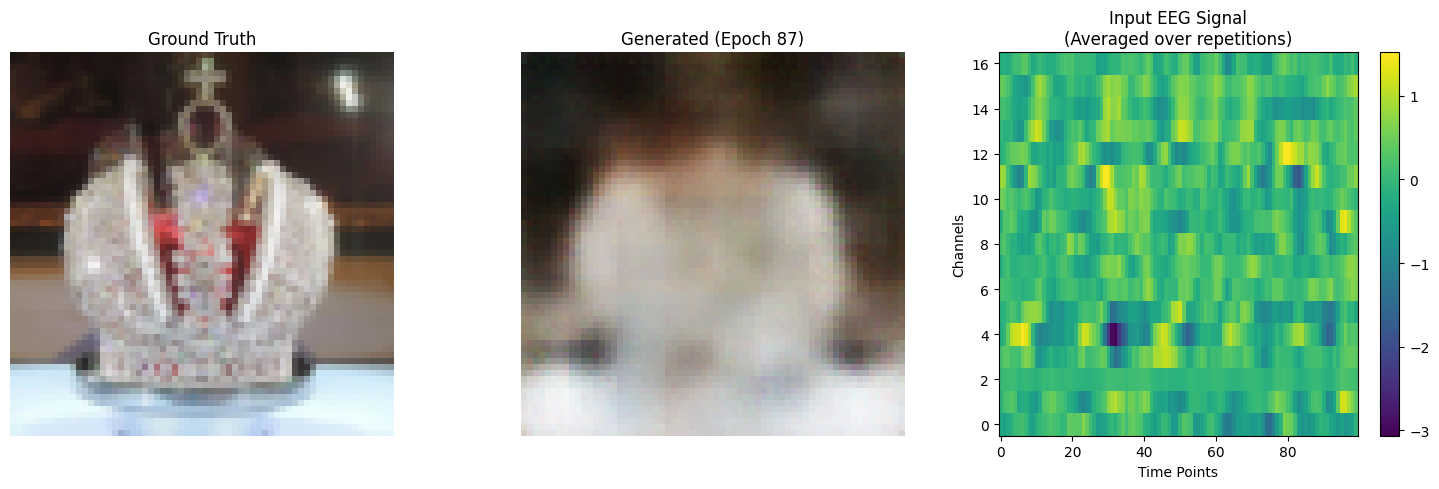

Epoch [88/100] Batch [0/517] D Loss: 3.6916 G Loss: 1840.5061 (Adv: 11.7070, Rec: 0.1829)
Epoch [88/100] Batch [100/517] D Loss: 0.0118 G Loss: 1983.3236 (Adv: 12.5867, Rec: 0.1971)
Epoch [88/100] Batch [200/517] D Loss: 0.0406 G Loss: 1816.4403 (Adv: 16.5163, Rec: 0.1800)
Epoch [88/100] Batch [300/517] D Loss: 0.0144 G Loss: 1865.7880 (Adv: 13.3860, Rec: 0.1852)
Epoch [88/100] Batch [400/517] D Loss: 0.0359 G Loss: 1898.7632 (Adv: 13.9678, Rec: 0.1885)
Epoch [88/100] Batch [500/517] D Loss: 0.1978 G Loss: 2041.8812 (Adv: 10.3260, Rec: 0.2032)


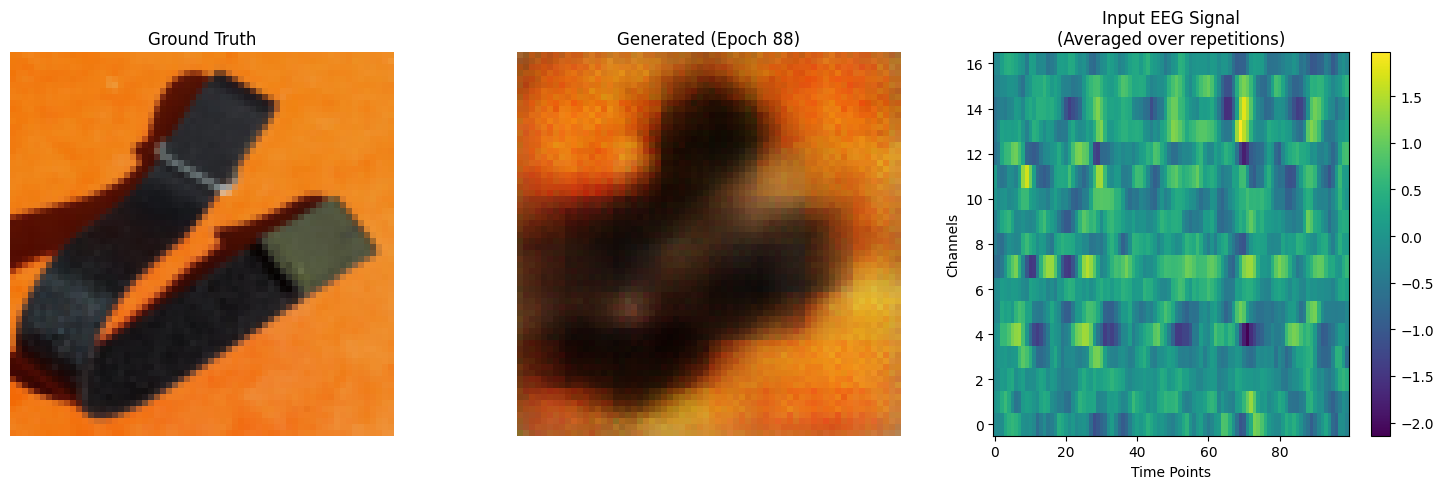

Epoch [89/100] Batch [0/517] D Loss: 0.0450 G Loss: 2016.4479 (Adv: 12.4667, Rec: 0.2004)
Epoch [89/100] Batch [100/517] D Loss: 0.0086 G Loss: 1979.8037 (Adv: 13.5492, Rec: 0.1966)
Epoch [89/100] Batch [200/517] D Loss: 0.0248 G Loss: 1781.6255 (Adv: 14.5380, Rec: 0.1767)
Epoch [89/100] Batch [300/517] D Loss: 0.0012 G Loss: 1962.4999 (Adv: 16.1894, Rec: 0.1946)
Epoch [89/100] Batch [400/517] D Loss: 0.0921 G Loss: 1974.6316 (Adv: 10.7855, Rec: 0.1964)
Epoch [89/100] Batch [500/517] D Loss: 0.0002 G Loss: 1917.1404 (Adv: 17.1160, Rec: 0.1900)


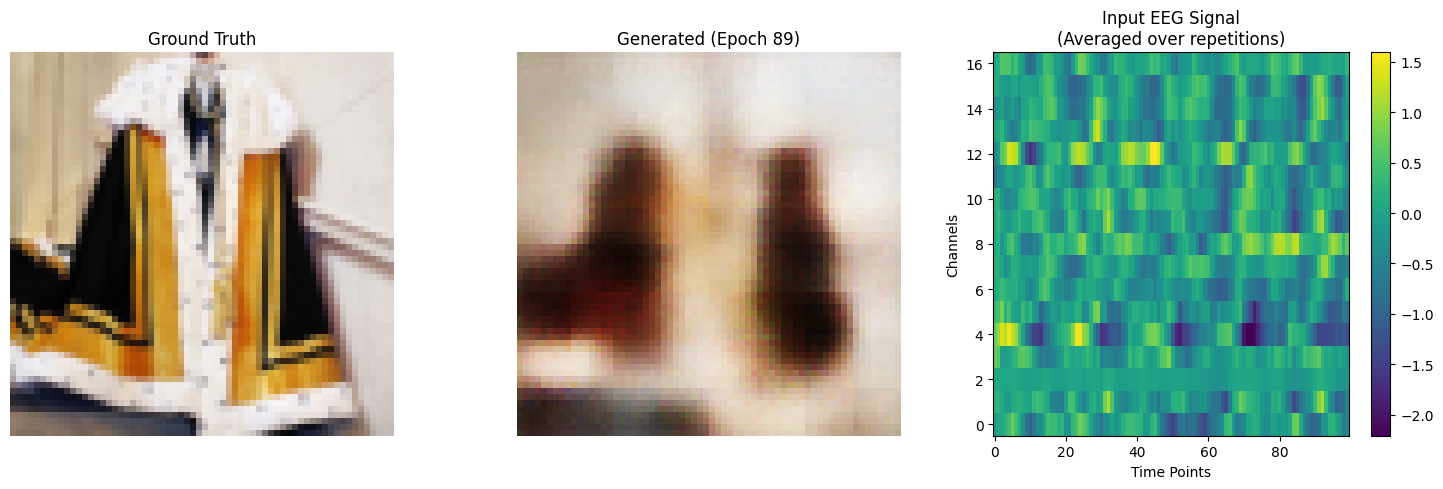

Epoch [90/100] Batch [0/517] D Loss: 0.0116 G Loss: 2156.9341 (Adv: 13.3553, Rec: 0.2144)
Epoch [90/100] Batch [100/517] D Loss: 0.0012 G Loss: 2170.3655 (Adv: 15.5190, Rec: 0.2155)
Epoch [90/100] Batch [200/517] D Loss: 0.0092 G Loss: 2036.9921 (Adv: 13.9264, Rec: 0.2023)
Epoch [90/100] Batch [300/517] D Loss: 0.0093 G Loss: 1848.8110 (Adv: 17.0596, Rec: 0.1832)
Epoch [90/100] Batch [400/517] D Loss: 0.0265 G Loss: 1877.7073 (Adv: 18.6242, Rec: 0.1859)
Epoch [90/100] Batch [500/517] D Loss: 0.0033 G Loss: 1950.8469 (Adv: 16.6347, Rec: 0.1934)


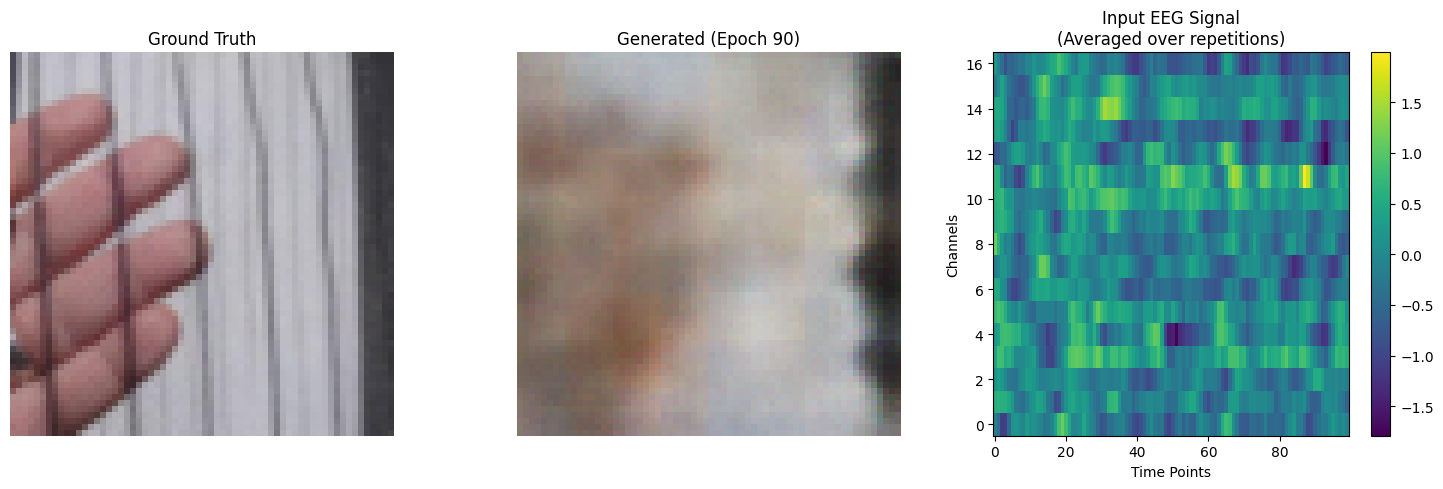

Epoch [91/100] Batch [0/517] D Loss: 0.0028 G Loss: 1919.1443 (Adv: 17.7450, Rec: 0.1901)
Epoch [91/100] Batch [100/517] D Loss: 0.0006 G Loss: 1870.1010 (Adv: 17.7000, Rec: 0.1852)
Epoch [91/100] Batch [200/517] D Loss: 0.0037 G Loss: 1981.2614 (Adv: 14.2225, Rec: 0.1967)
Epoch [91/100] Batch [300/517] D Loss: 0.0013 G Loss: 2149.2451 (Adv: 15.3617, Rec: 0.2134)
Epoch [91/100] Batch [400/517] D Loss: 0.0032 G Loss: 1924.0773 (Adv: 14.4237, Rec: 0.1910)
Epoch [91/100] Batch [500/517] D Loss: 0.0088 G Loss: 1924.4219 (Adv: 14.1813, Rec: 0.1910)


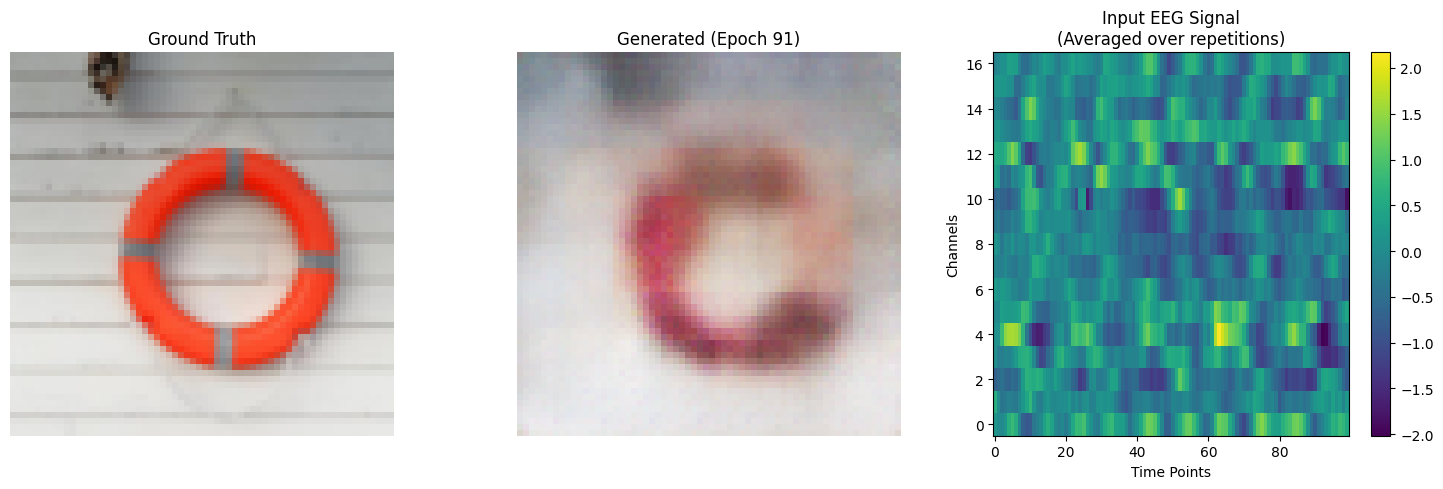

Epoch [92/100] Batch [0/517] D Loss: 0.0017 G Loss: 1933.6227 (Adv: 18.9105, Rec: 0.1915)
Epoch [92/100] Batch [100/517] D Loss: 0.0010 G Loss: 2040.6597 (Adv: 14.8936, Rec: 0.2026)
Epoch [92/100] Batch [200/517] D Loss: 0.0007 G Loss: 1937.2125 (Adv: 15.7423, Rec: 0.1921)
Epoch [92/100] Batch [300/517] D Loss: 0.0071 G Loss: 2025.7531 (Adv: 13.5151, Rec: 0.2012)
Epoch [92/100] Batch [400/517] D Loss: 0.0078 G Loss: 2042.5605 (Adv: 13.5259, Rec: 0.2029)
Epoch [92/100] Batch [500/517] D Loss: 0.0356 G Loss: 2097.8965 (Adv: 12.3663, Rec: 0.2086)


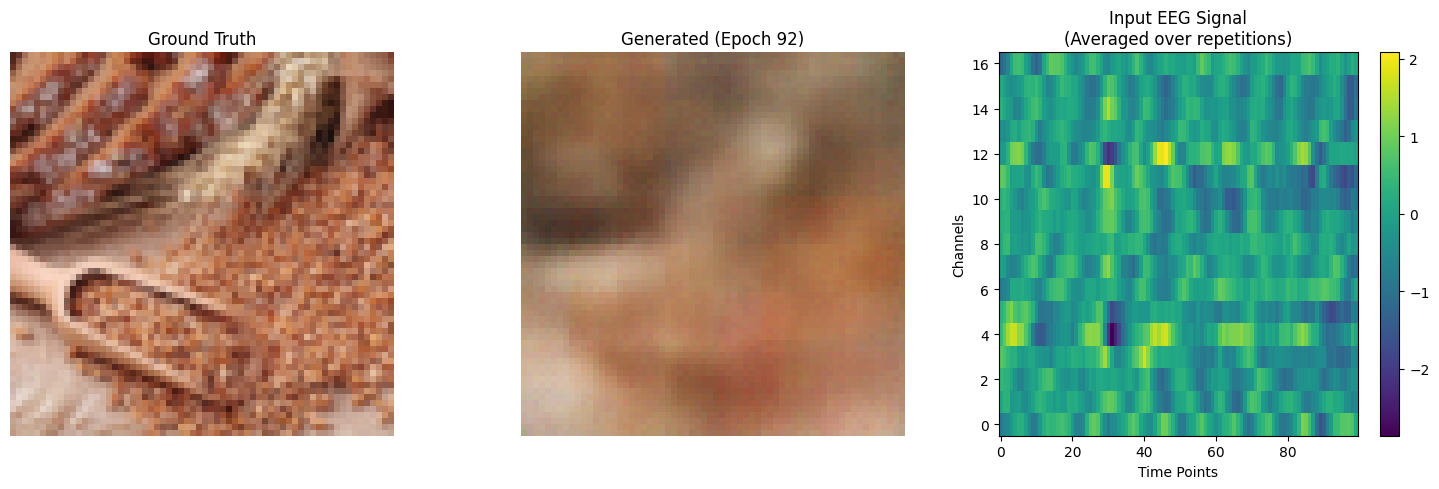

Epoch [93/100] Batch [0/517] D Loss: 0.0001 G Loss: 2012.7145 (Adv: 19.9584, Rec: 0.1993)
Epoch [93/100] Batch [100/517] D Loss: 0.0030 G Loss: 2012.8845 (Adv: 14.6766, Rec: 0.1998)
Epoch [93/100] Batch [200/517] D Loss: 0.0002 G Loss: 1960.2512 (Adv: 18.6454, Rec: 0.1942)
Epoch [93/100] Batch [300/517] D Loss: 0.0010 G Loss: 1871.7366 (Adv: 15.2477, Rec: 0.1856)
Epoch [93/100] Batch [400/517] D Loss: 0.0039 G Loss: 1812.0118 (Adv: 14.1513, Rec: 0.1798)
Epoch [93/100] Batch [500/517] D Loss: 0.0030 G Loss: 1975.2229 (Adv: 13.8506, Rec: 0.1961)


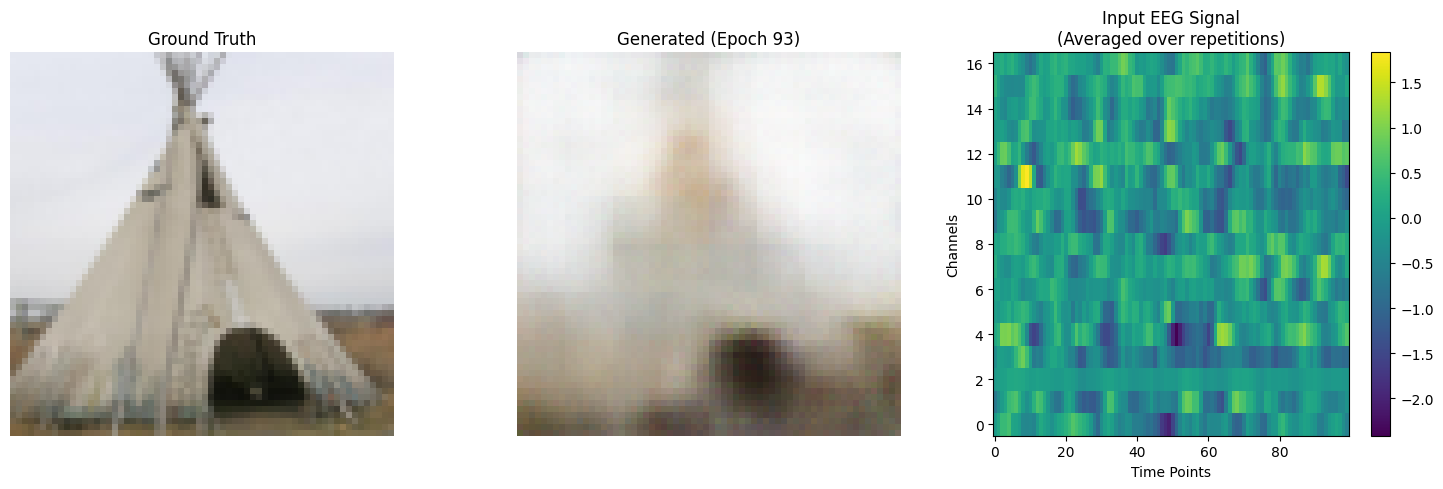

Epoch [94/100] Batch [0/517] D Loss: 0.0121 G Loss: 1976.3458 (Adv: 12.6044, Rec: 0.1964)
Epoch [94/100] Batch [100/517] D Loss: 0.0011 G Loss: 2031.3823 (Adv: 19.2004, Rec: 0.2012)
Epoch [94/100] Batch [200/517] D Loss: 0.0005 G Loss: 1941.3519 (Adv: 16.6686, Rec: 0.1925)
Epoch [94/100] Batch [300/517] D Loss: 0.0462 G Loss: 1847.0352 (Adv: 11.5509, Rec: 0.1835)
Epoch [94/100] Batch [400/517] D Loss: 0.0000 G Loss: 2033.2959 (Adv: 19.3431, Rec: 0.2014)
Epoch [94/100] Batch [500/517] D Loss: 0.0006 G Loss: 2007.4718 (Adv: 16.6750, Rec: 0.1991)


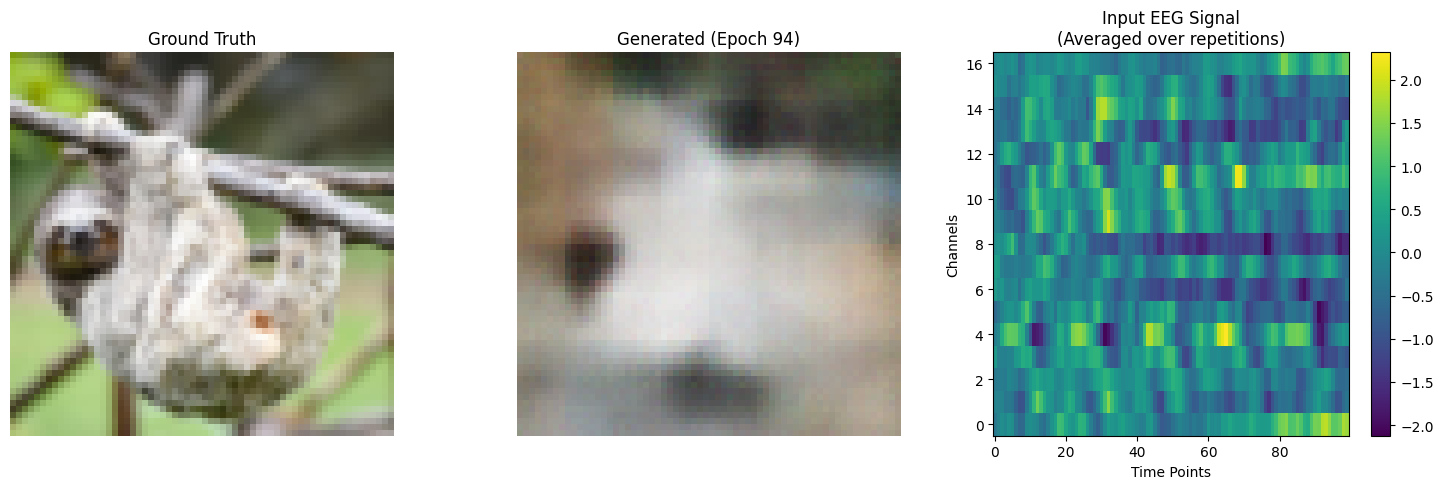

Epoch [95/100] Batch [0/517] D Loss: 0.0002 G Loss: 1911.8516 (Adv: 17.9128, Rec: 0.1894)
Epoch [95/100] Batch [100/517] D Loss: 0.0000 G Loss: 1959.1449 (Adv: 19.5114, Rec: 0.1940)
Epoch [95/100] Batch [200/517] D Loss: 0.0006 G Loss: 1854.0239 (Adv: 15.6165, Rec: 0.1838)
Epoch [95/100] Batch [300/517] D Loss: 0.0003 G Loss: 1929.2754 (Adv: 18.9831, Rec: 0.1910)
Epoch [95/100] Batch [400/517] D Loss: 0.0000 G Loss: 2038.7483 (Adv: 18.0548, Rec: 0.2021)
Epoch [95/100] Batch [500/517] D Loss: 0.0001 G Loss: 2034.4263 (Adv: 18.0007, Rec: 0.2016)


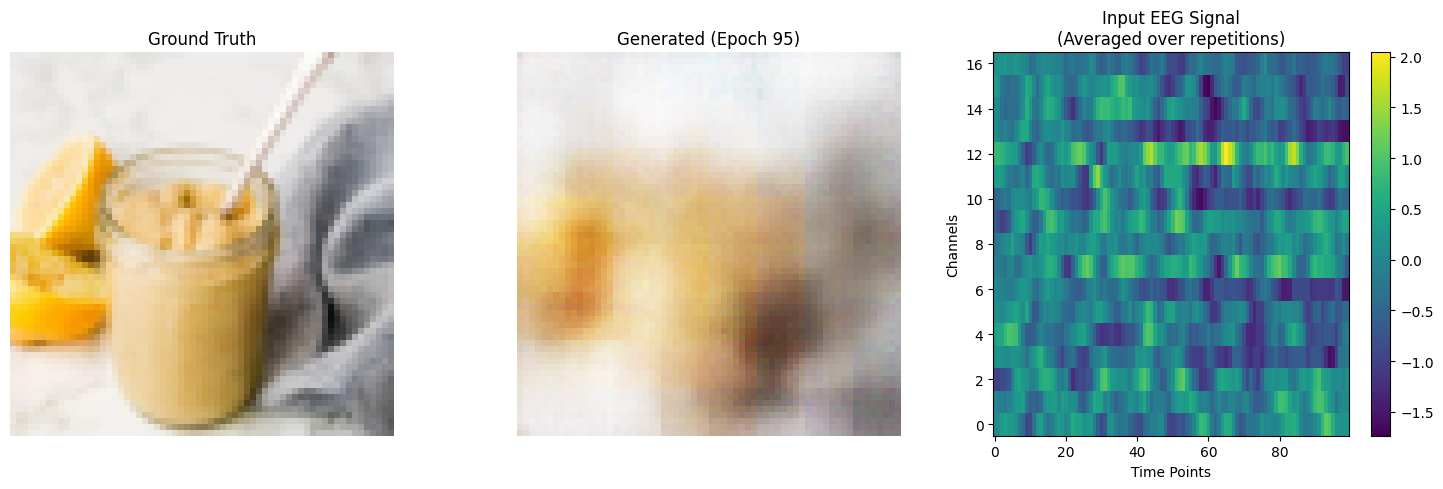

Epoch [96/100] Batch [0/517] D Loss: 0.0002 G Loss: 1940.7704 (Adv: 17.9969, Rec: 0.1923)
Epoch [96/100] Batch [100/517] D Loss: 0.1289 G Loss: 2110.4607 (Adv: 10.9550, Rec: 0.2100)
Epoch [96/100] Batch [200/517] D Loss: 0.0002 G Loss: 2027.1740 (Adv: 17.3544, Rec: 0.2010)
Epoch [96/100] Batch [300/517] D Loss: 0.0019 G Loss: 1956.9380 (Adv: 21.4467, Rec: 0.1935)
Epoch [96/100] Batch [400/517] D Loss: 0.0000 G Loss: 2011.4047 (Adv: 20.0186, Rec: 0.1991)
Epoch [96/100] Batch [500/517] D Loss: 0.0000 G Loss: 2052.9907 (Adv: 20.1188, Rec: 0.2033)


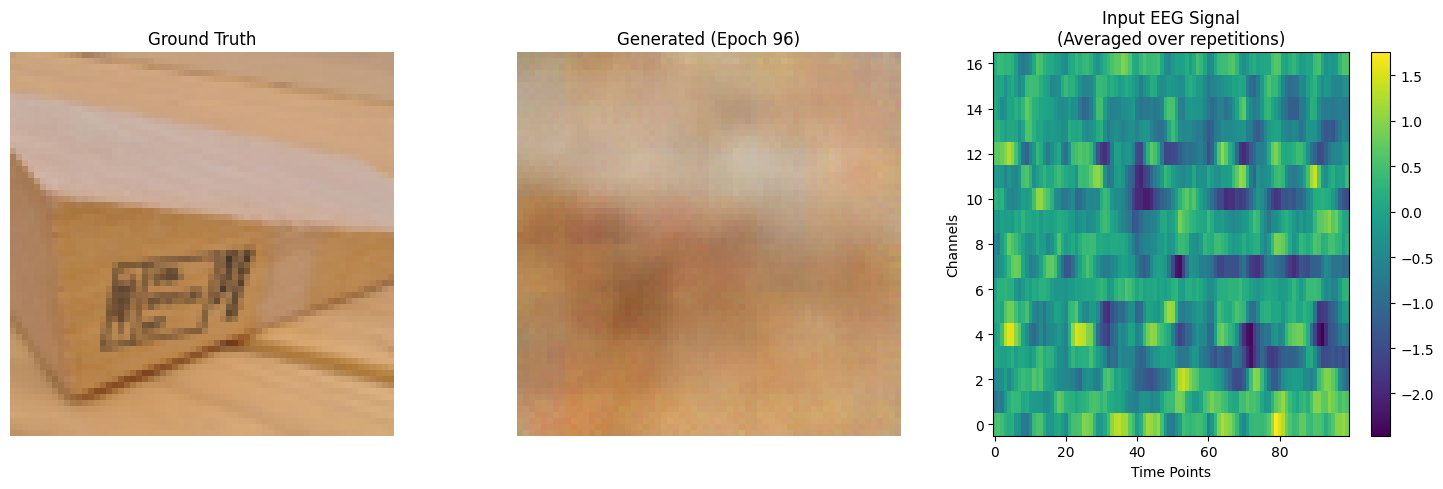

Epoch [97/100] Batch [0/517] D Loss: 0.0005 G Loss: 1901.9476 (Adv: 17.0499, Rec: 0.1885)
Epoch [97/100] Batch [100/517] D Loss: 0.0001 G Loss: 1927.2417 (Adv: 17.4356, Rec: 0.1910)
Epoch [97/100] Batch [200/517] D Loss: 0.0000 G Loss: 2034.7028 (Adv: 18.2235, Rec: 0.2016)
Epoch [97/100] Batch [300/517] D Loss: 0.0155 G Loss: 1889.0018 (Adv: 16.3005, Rec: 0.1873)
Epoch [97/100] Batch [400/517] D Loss: 0.0017 G Loss: 1836.3373 (Adv: 18.9898, Rec: 0.1817)
Epoch [97/100] Batch [500/517] D Loss: 0.0813 G Loss: 1867.7000 (Adv: 18.8373, Rec: 0.1849)


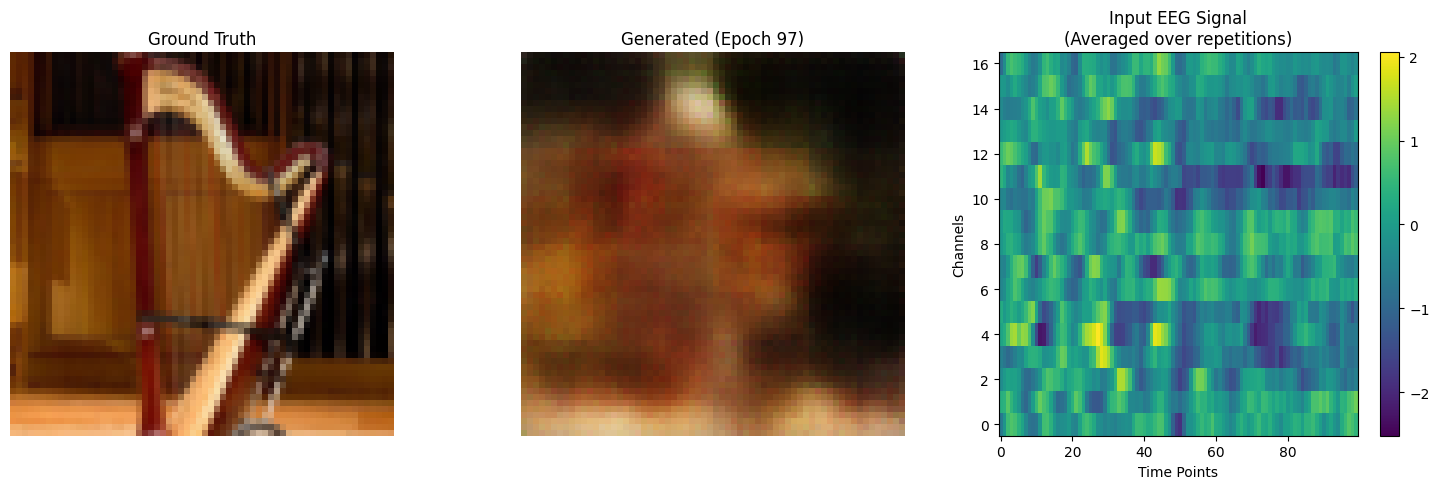

Epoch [98/100] Batch [0/517] D Loss: 1.6046 G Loss: 2042.4565 (Adv: 23.7743, Rec: 0.2019)
Epoch [98/100] Batch [100/517] D Loss: 7.8405 G Loss: 1854.3616 (Adv: 21.5190, Rec: 0.1833)
Epoch [98/100] Batch [200/517] D Loss: 0.0129 G Loss: 1869.5824 (Adv: 19.4178, Rec: 0.1850)
Epoch [98/100] Batch [300/517] D Loss: 0.0101 G Loss: 1799.4323 (Adv: 16.9586, Rec: 0.1782)
Epoch [98/100] Batch [400/517] D Loss: 0.0016 G Loss: 1977.8206 (Adv: 20.1429, Rec: 0.1958)
Epoch [98/100] Batch [500/517] D Loss: 0.0010 G Loss: 1875.4308 (Adv: 18.1496, Rec: 0.1857)


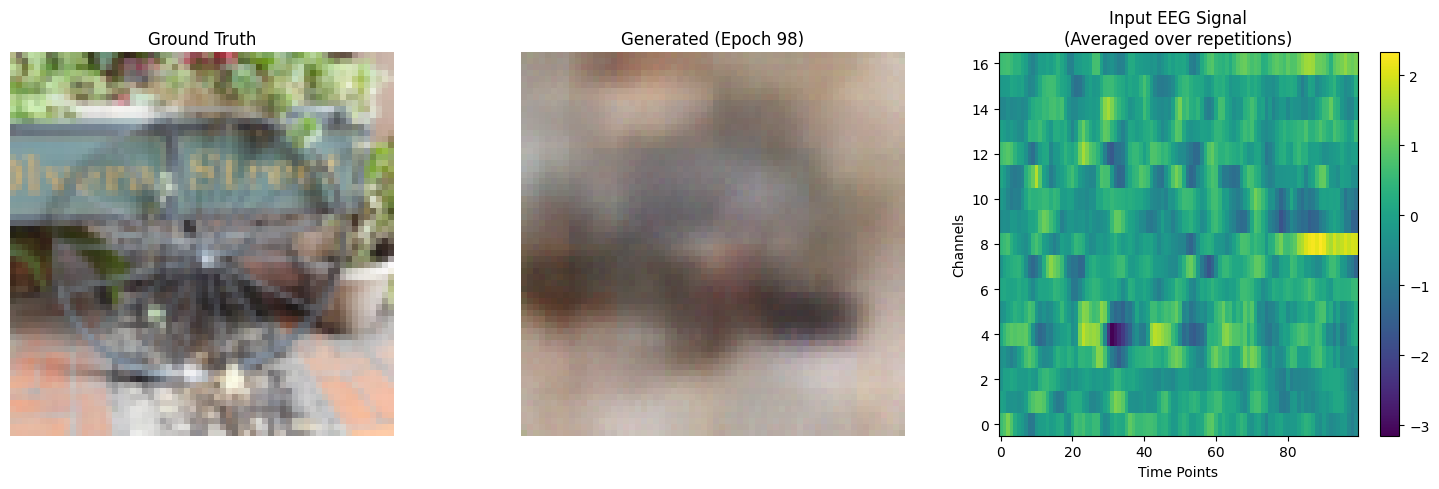

Epoch [99/100] Batch [0/517] D Loss: 0.0020 G Loss: 1862.7463 (Adv: 15.6407, Rec: 0.1847)
Epoch [99/100] Batch [100/517] D Loss: 0.0007 G Loss: 1931.2493 (Adv: 18.3712, Rec: 0.1913)
Epoch [99/100] Batch [200/517] D Loss: 0.0000 G Loss: 2099.5181 (Adv: 18.2440, Rec: 0.2081)
Epoch [99/100] Batch [300/517] D Loss: 0.0028 G Loss: 2105.1663 (Adv: 18.0834, Rec: 0.2087)
Epoch [99/100] Batch [400/517] D Loss: 0.0010 G Loss: 1864.4357 (Adv: 18.9952, Rec: 0.1845)
Epoch [99/100] Batch [500/517] D Loss: 0.0027 G Loss: 1915.3268 (Adv: 17.9241, Rec: 0.1897)


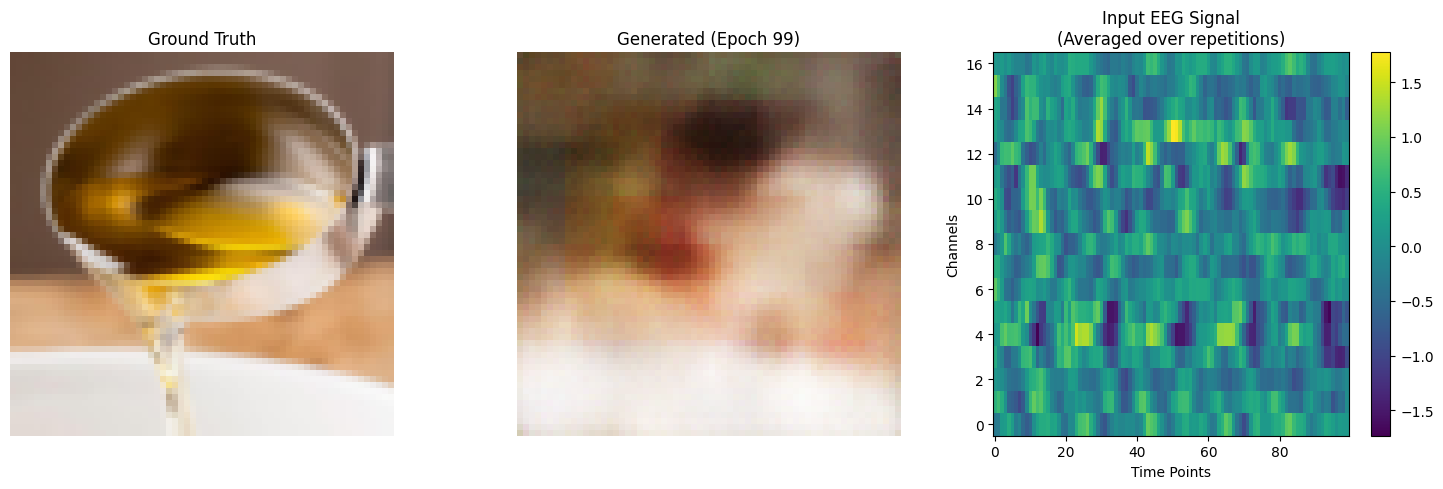

Epoch [100/100] Batch [0/517] D Loss: 0.0022 G Loss: 2012.7996 (Adv: 22.5225, Rec: 0.1990)
Epoch [100/100] Batch [100/517] D Loss: 0.0020 G Loss: 1760.4237 (Adv: 17.3490, Rec: 0.1743)
Epoch [100/100] Batch [200/517] D Loss: 21.2597 G Loss: 1634.1202 (Adv: 20.9356, Rec: 0.1613)
Epoch [100/100] Batch [300/517] D Loss: 0.0035 G Loss: 2027.4231 (Adv: 17.3974, Rec: 0.2010)
Epoch [100/100] Batch [400/517] D Loss: 0.0013 G Loss: 2060.1321 (Adv: 14.9758, Rec: 0.2045)
Epoch [100/100] Batch [500/517] D Loss: 0.0009 G Loss: 1882.8114 (Adv: 19.6039, Rec: 0.1863)


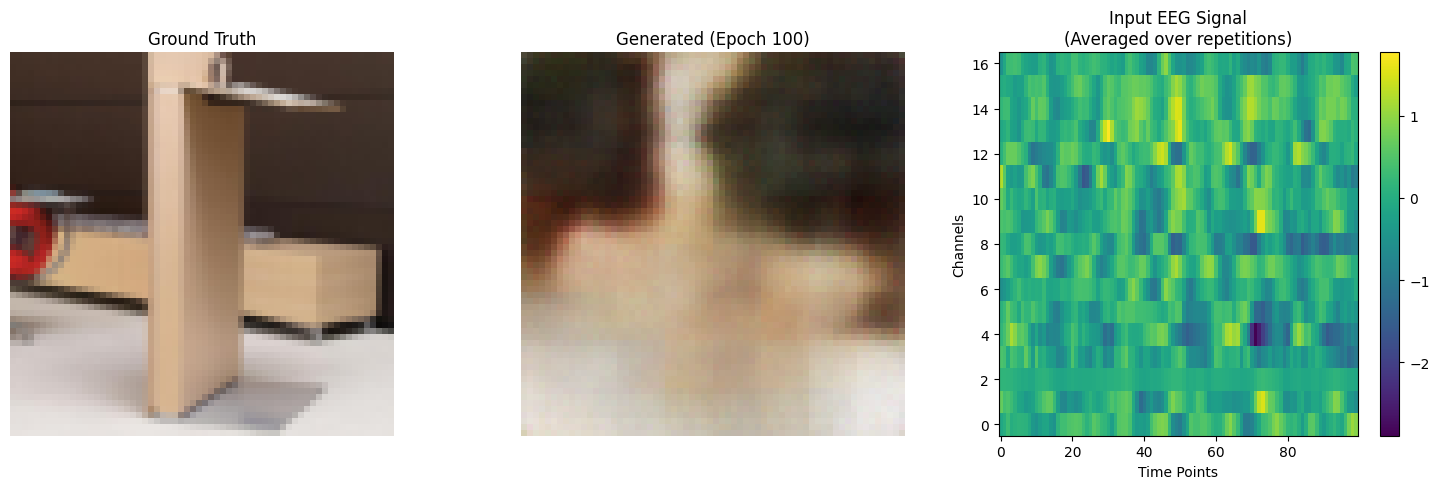

In [16]:
import torch
import torch.optim as optim
import torch.nn as nn


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

generator = Generator()
discriminator = Discriminator()

generator = generator.to(device)
discriminator = discriminator.to(device)


num_epochs = 100       
lr = 0.0002            
beta1 = 0.5            
lambda_d = 1000

criterion = nn.BCELoss()
reconstruction_loss = nn.L1Loss()
lambda_rec = 10000

optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))


for epoch in range(num_epochs):
    for batch_idx, (eeg_batch, real_images) in enumerate(dataloader):
        batch_size = eeg_batch.size(0)
        
        
        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)
        
        eeg_batch = eeg_batch.to(device)
        real_images = real_images.to(device)
        
        ############################
        # Train Discriminator
        ############################
        optimizer_D.zero_grad()
        real_preds = discriminator(real_images)
        d_loss_real = criterion(real_preds, valid)
        
        generated_images = generator(eeg_batch)
        fake_preds = discriminator(generated_images.detach())
        d_loss_fake = criterion(fake_preds, fake)
        
        d_loss = (d_loss_real + d_loss_fake)*lambda_d
        d_loss.backward()
        optimizer_D.step()
        
        ############################
        # Train Generator
        ############################
        optimizer_G.zero_grad()
        
        
        fake_preds = discriminator(generated_images)
        adversarial_loss = criterion(fake_preds, valid)
        
       
        rec_loss = reconstruction_loss(generated_images, real_images)
        
        # Total generator loss.
        g_loss = adversarial_loss + lambda_rec * rec_loss
        g_loss.backward()
        optimizer_G.step()
        
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Batch [{batch_idx}/{len(dataloader)}] "
                  f"D Loss: {d_loss.item():.4f} G Loss: {g_loss.item():.4f} "
                  f"(Adv: {adversarial_loss.item():.4f}, Rec: {rec_loss.item():.4f})")
    
   
    with torch.no_grad():
        generator.eval()  

        
        sample_eeg = eeg_batch[0].unsqueeze(0)  # Shape: (1, 4, 17, 100)

        # Generated image.
        gen_img = generator(sample_eeg)
        gen_img_np = (gen_img.squeeze().cpu().numpy().transpose(1, 2, 0) + 1) / 2  # Denormalize to [0,1]

        # Ground truth image.
        real_img_np = (real_images[0].cpu().numpy().transpose(1, 2, 0) + 1) / 2  # Denormalize

        
        eeg_avg = sample_eeg.squeeze(0).mean(dim=0)  # Shape: (17, 100)
        eeg_np = eeg_avg.cpu().numpy()

        
        plt.figure(figsize=(15, 5))

        # Ground truth image.
        plt.subplot(1, 3, 1)
        plt.imshow(real_img_np)
        plt.title("Ground Truth")
        plt.axis('off')

        # Generated image.
        plt.subplot(1, 3, 2)
        plt.imshow(gen_img_np)
        plt.title(f"Generated (Epoch {epoch+1})")
        plt.axis('off')

        # EEG signal as a heatmap.
        plt.subplot(1, 3, 3)
        plt.imshow(eeg_np, aspect='auto', origin='lower', cmap='viridis')
        plt.title("Input EEG Signal\n(Averaged over repetitions)")
        plt.xlabel("Time Points")
        plt.ylabel("Channels")
        plt.colorbar()


        plt.tight_layout()
        plt.show()

        generator.train()  

